## OA and sizedistribution plots: ATTO station

In [120]:
%load_ext autoreload

%autoreload 2

from pathlib import Path
from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing, ds2df_echam
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log
from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter
log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [121]:
import scienceplots
import scienceplots
plt.style.use([
    'default',
    # 'science',
    'acp',
    # 'sp-grid',
    'no-black',
    'no-latex',
    'illustrator-safe'
])

In [122]:
import pandas as pd

In [123]:
from bs_fdbck.constants import path_measurement_data

In [124]:

import numpy as np



In [125]:

select_station = 'ATTO'
model_lev_i = -1

In [126]:
plot_path = Path(f'Plots/{select_station}')

In [127]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_all_years_echam_noresm_{case}_{_x}_{_y}-ATTO_ukesm.png'
    return plot_path /f

In [128]:
plot_path.mkdir(exist_ok=True, parents=True)

In [129]:
plot_path

PosixPath('Plots/ATTO')

In [130]:
from bs_fdbck.constants import path_measurement_data
postproc_data = path_measurement_data /'model_station'/select_station
postproc_data_obs = path_measurement_data /select_station/'processed'

In [131]:
fn_obs_comb_data_full_time =postproc_data_obs /'ATTO_data_comb_hourly.nc'

# Load observational data: 

In [132]:
postproc_data_obs = path_measurement_data /'ATTO'/'processed'

In [133]:


ds_ATTO = xr.open_dataset(fn_obs_comb_data_full_time)

In [134]:
fn_obs_comb_data_full_time

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/processed/ATTO_data_comb_hourly.nc')

# Read in model data:

In [135]:
models = ['ECHAM-SALSA','NorESM', 'EC-Earth', 'UKESM']
mod2cases = {'ECHAM-SALSA' : ['SALSA_BSOA_feedback'],
             'NorESM' : ['OsloAero_intBVOC_f09_f09_mg17_fssp'],
             'EC-Earth' : ['ECE3_output_Sara'],
             'UKESM' : ['AEROCOMTRAJ'],
             'Observations':['Obs'],
            }
di_mod2cases = mod2cases.copy()

In [136]:
select_station='ATTO'

In [137]:
dic_df_pre=dict()
for mod in models:
    print(mod)
    dic_df_pre[mod] = dict()
    for ca in mod2cases[mod]:
        print(mod, ca)
        if model_lev_i !=-2:
            fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}_ilev{model_lev_i}.csv'
        else:
            fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        #fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        print(fn_out)
        dic_df_pre[mod][ca] = pd.read_csv(fn_out, index_col=0)
        dic_df_pre[mod][ca].index = pd.to_datetime(dic_df_pre[mod][ca].index)
        #dic_df_mod_case[mod][ca].to_csv(fn_out)

ECHAM-SALSA
ECHAM-SALSA SALSA_BSOA_feedback
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/ATTO_station_ECHAM-SALSA_SALSA_BSOA_feedback_ilev-1.csv
NorESM
NorESM OsloAero_intBVOC_f09_f09_mg17_fssp
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/ATTO_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp_ilev-1.csv
EC-Earth
EC-Earth ECE3_output_Sara
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/ATTO_station_EC-Earth_ECE3_output_Sara_ilev-1.csv
UKESM
UKESM AEROCOMTRAJ
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/ATTO_station_UKESM_AEROCOMTRAJ_ilev-1.csv


## Read in observations

In [138]:
ds_ATTO = xr.open_dataset(fn_obs_comb_data_full_time, engine='netcdf4')

In [139]:
ds_ATTO = ds_ATTO.sel(time_traj=0)

In [140]:
varl = ['Pressure_reanalysis', 'Potential_Temperature_reanalysis', 'Temperature_reanalysis', 'Rainfall', 'Mixing_Depth', 'Relative_Humidity', 'Specific_Humidity_reanalysis',
 'Mixing_Ratio','Solar_Radiation', 'condensation_sink', 'N50-500', 'N100-500', 'N200-500', 'timeUTC-3', 'pressure', 'temperature', 'humidity','precip',#'Solar_inc_Wm2',
        #'Solar_out_Wm2',
        #'wind_speed',
        #'wind_speed_v',
        'OA'
]
ds_ATTO[varl].squeeze().to_dataframe()

Pressure_reanalysis  Potential_Temperature_reanalysis  \
time                                                                         
2014-03-10 15:00:00                974.8                             305.5   
2014-03-10 16:00:00                974.1                             305.5   
2014-03-10 17:00:00                974.9                             304.5   
2014-03-10 18:00:00                975.8                             303.5   
2014-03-10 19:00:00                976.6                             302.5   
...                                  ...                               ...   
2019-01-28 05:00:00                979.4                             298.0   
2019-01-28 06:00:00                980.0                             297.9   
2019-01-28 07:00:00                980.7                             297.8   
2019-01-28 11:00:00                980.7                             301.9   
2019-01-28 14:00:00                978.3                             304.3   

                     Temperature_reanalysis  Rainfall  Mixing_Depth  \
time                                                                  
2014-03-10 15:00:00                   303.3       0.0        1437.6   
2014-03-10 16:00:00                   303.2       0.0        1268.8   
2014-03-10 17:00:00                   302.3       0.0         863.0   
2014-03-10 18:00:00                   301.4       0.0         453.1   
2014-03-10 19:00:00                   300.5       0.0          43.2   
...                                     ...       ...           ...   
2019-01-28 05:00:00                   296.2       0.0         254.7   
2019-01-28 06:00:00                   296.2       0.0         363.3   
2019-01-28 07:00:00                   296.1       0.0         472.0   
2019-01-28 11:00:00                   300.2       0.0        1336.6   
2019-01-28 14:00:00                   302.4       0.0        1589.4   

                     Relative_Humidity  Specific_Humidity_reanalysis  \
time                                                                   
2014-03-10 15:00:00               55.1                          15.1   
2014-03-10 16:00:00               56.0                          15.2   
2014-03-10 17:00:00               60.5                          15.6   
2014-03-10 18:00:00               65.1                          15.9   
2014-03-10 19:00:00               69.7                          16.1   
...                                ...                           ...   
2019-01-28 05:00:00               85.8                          15.3   
2019-01-28 06:00:00               88.0                          15.7   
2019-01-28 07:00:00               90.2                          16.0   
2019-01-28 11:00:00               67.9                          15.4   
2019-01-28 14:00:00               57.4                          14.8   

                     Mixing_Ratio  Solar_Radiation  condensation_sink  \
time                                                                    
2014-03-10 15:00:00          15.4            681.2           0.001503   
2014-03-10 16:00:00          15.6            596.6           0.001285   
2014-03-10 17:00:00          16.0            504.7           0.001317   
2014-03-10 18:00:00          16.3            412.7           0.001469   
2014-03-10 19:00:00          16.6            320.7           0.001441   
...                           ...              ...                ...   
2019-01-28 05:00:00          15.7             18.9           0.000014   
2019-01-28 06:00:00          16.1             38.1           0.000013   
2019-01-28 07:00:00          16.4             57.4           0.000011   
2019-01-28 11:00:00          15.8            462.4           0.000026   
2019-01-28 14:00:00          15.2            488.3           0.000017   

                        N50-500    N100-500    N200-500           timeUTC-3  \
time                                                                          
2014-03-10 15:00:00  316.350342  259.

In [141]:
dic_df_pre['Observations'] = dict()
dic_df_pre['Observations']['Observations'] = ds_ATTO[varl].squeeze().to_dataframe()
dic_df_pre['Observations']['Observations'].index = pd.to_datetime(dic_df_pre['Observations']['Observations'].index)

In [142]:
mod2cases['Observations'] = ['Observations']

In [143]:
dic_mod_ca = dic_df_pre.copy()

<AxesSubplot:xlabel='time'>

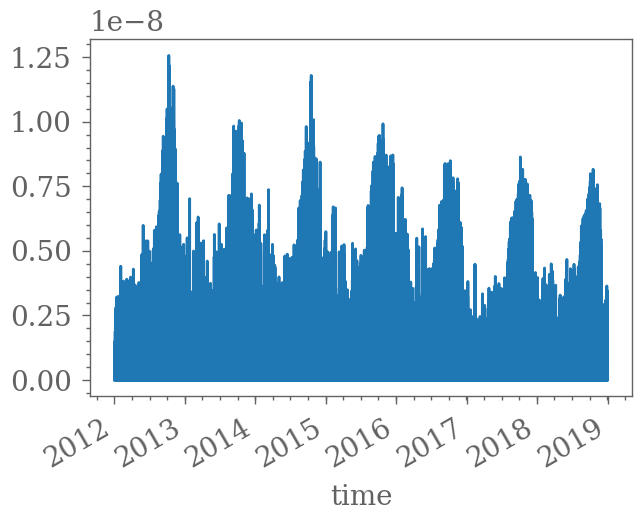

In [144]:
_ds =dic_mod_ca['ECHAM-SALSA']['SALSA_BSOA_feedback']

_ds =dic_mod_ca['NorESM'][mod2cases['NorESM'][0]]

_ds['SFisoprene'].plot()

### Save result in dictionary

In [145]:
dic_df_mod_case = di_mod2cases
for mo in models:
    cs = mod2cases[mo]
    for c in cs: 
        if len(cs)>1:
            use_name = f'{mo}_{c}'
        else:
            use_name =mo

In [146]:
dic_df_mod_case = dic_mod_ca.copy()

In [147]:
from bs_fdbck.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median

## Rename STP values

In [148]:
for mod in models:
    for ca in mod2cases[mod]:
        _df = dic_df_mod_case[mod][ca]
        for v in ['OA','N50','N100','N200','N500']:
            if f'{v}_STP' in _df.columns:
                if v in _df.columns:
                    _df = _df.rename({v:f'{v}_orig'}, axis=1)
                _df = _df.rename({f'{v}_STP':v}, axis=1)
        dic_df_mod_case[mod][ca] = _df

### Calculate Nx-500:


In [149]:
for mod in models:
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        print(ca)
        _df = dic_df_mod_case[mod][ca]
        for v in ['N50','N100','N200']:
            _df[f'{v}-500'] = _df[v] -_df['N500'] 
        dic_df_mod_case[mod][ca] = _df

ECHAM-SALSA
SALSA_BSOA_feedback
NorESM
OsloAero_intBVOC_f09_f09_mg17_fssp
EC-Earth
ECE3_output_Sara
UKESM
AEROCOMTRAJ


# Merge with observations:

In [150]:
dic_df_pre = dict()#dic_df_mod_case.copy()#deep=True)
for mod in dic_df_mod_case.keys():
    dic_df_pre[mod] = dic_df_mod_case[mod].copy()

In [151]:
vars_obs = ['OA', 'N100-500','N50-500','N200-500','temperature']

In [152]:
ds_ATTO

<xarray.Dataset>
Dimensions:                           (time: 25448, D: 104, timeUTC: 25448, timeUTC-4: 25448, limit: 2)
Coordinates:
  * time                              (time) datetime64[ns] 2014-03-10T15:00:...
  * D                                 (D) float64 10.2 10.6 10.9 ... 399.5 414.2
    time_traj                         int64 0
  * timeUTC                           (timeUTC) datetime64[ns] 2014-03-10T19:...
  * timeUTC-4                         (timeUTC-4) datetime64[ns] 2014-03-10T1...
  * limit                             (limit) object 'bottom' 'top'
Data variables: (12/42)
    pnsd                              (time, D) float64 ...
    Pressure_reanalysis               (time) float64 974.8 974.1 ... 980.7 978.3
    Potential_Temperature_reanalysis  (time) float64 305.5 305.5 ... 301.9 304.3
    Temperature_reanalysis            (time) float64 303.3 303.2 ... 300.2 302.4
    Rainfall                          (time) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Mixing_Depth                      (time) float64 1.438e+03 ... 1.589e+03
    ...                                ...
    PAR_in                            (time) float64 ...
    PAR_out                           (time) float64 ...
    LW_atm                            (time) float64 ...
    LW_terr                           (time) float64 ...
    OA                                (time) float64 0.99 1.62 1.66 ... nan nan
    BC_conc                           (time) float64 ...

In [153]:
df_ATTO = ds_ATTO[vars_obs].drop('time_traj').to_dataframe()

df_ATTO['some_obs_missing'] = df_ATTO.isnull().any(axis=1)

In [154]:
df_for_merge = df_ATTO[['OA','N100-500', 'some_obs_missing']].rename({'OA':'obs_OA','N100-500':'obs_N100-500',},axis=1)

In [155]:
for mod in dic_df_mod_case.keys():
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        dic_df_mod_case[mod][ca] = pd.merge(dic_df_pre[mod][ca], df_for_merge ,right_on='time', left_on='time', how='outer')
        dic_df_mod_case[mod][ca]['year'] = dic_df_mod_case[mod][ca].index.year

ECHAM-SALSA
NorESM
EC-Earth
UKESM
Observations


In [156]:
df_ATTO_obs_rename = df_ATTO.rename({'Org':'OA','temperature':'T_C'}, axis=1)

In [157]:
df_ATTO_obs_rename

OA    N100-500     N50-500    N200-500    T_C  \
time                                                                    
2014-03-10 15:00:00  0.990  259.764876  316.350342  123.407339  31.46   
2014-03-10 16:00:00  1.620  221.149397  288.441016  102.265441  31.62   
2014-03-10 17:00:00  1.660  223.659092  294.872421  104.508354  30.01   
2014-03-10 18:00:00  0.985  243.316332  323.442362  120.456843  28.18   
2014-03-10 19:00:00  2.420  236.004666  323.533283  116.970997  27.40   
...                    ...         ...         ...         ...    ...   
2019-01-28 05:00:00    NaN    2.418678    2.886702    1.160755    NaN   
2019-01-28 06:00:00    NaN    2.165097    2.189876    1.267096    NaN   
2019-01-28 07:00:00    NaN    1.882887    2.075599    0.938360    NaN   
2019-01-28 11:00:00    NaN    4.941434    7.112076    1.551557    NaN   
2019-01-28 14:00:00    NaN    1.090769    1.090769    1.090769    NaN   

                     some_obs_missing  
time                                   
2014-03-10 15:00:00             False  
2014-03-10 16:00:00             False  
2014-03-10 17:00:00             False  
2014-03-10 18:00:00             False  
2014-03-10 19:00:00             False  
...                               ...  
2019-01-28 05:00:00              True  
2019-01-28 06:00:00              True  
2019-01-28 07:00:00              True  
2019-01-28 11:00:00              True  
2019-01-28 14:00:00              True  

[25448 rows x 6 columns]

## Add observations to dictionary

In [158]:
dic_df_mod_case['Observations'] = dict()
dic_df_mod_case['Observations']['Observations'] = df_ATTO_obs_rename

In [159]:
dic_df_mod_case['Observations'].keys()

dict_keys(['Observations'])

In [160]:
dic_mod2case = mod2cases

In [161]:
def add_log(df, varl=None):
    if varl is None:
        varl = ['OA','N100', 'Org','N100 (cm^-3)','N50','N150','N200']
    var_exist = df.columns
    
    varl_f = set(varl).intersection(var_exist)
    print(varl_f)
    for v in varl_f:
        df[f'log10({v})'] = np.log10(df[v])
    return df


for mod in dic_df_mod_case.keys():
    for c in dic_df_mod_case[mod].keys():
    
        dic_df_mod_case[mod][c] = add_log(dic_df_mod_case[mod][c])
        #dic_dfsm_mod_case[mod][c] = add_log(dic_dfsm_mod_case[mod][c])
        
df_ATTO = add_log(df_ATTO)

{'N100', 'OA', 'N50', 'N200'}
{'OA', 'N50', 'N200', 'N100', 'N150'}
{'OA', 'N50', 'N200', 'N100', 'N150'}
{'OA', 'N50', 'N200', 'N100', 'N150'}
{'OA'}
{'OA'}


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [162]:
mod='NorESM'

In [163]:
ca = mod2cases[mod][0]

In [164]:
mask_obs_N = dic_df_mod_case[mod][ca]['obs_N100-500'].notnull()
mask_obs_OA = dic_df_mod_case[mod][ca]['obs_OA'].notnull()

## Compute daily medians:

In [165]:
path_save_daily_medians = Path(f'Temp_data/{select_station}_daily_medians')
path_save_daily_medians.parent.mkdir(exist_ok=True)

In [166]:
path_save_daily_medians

PosixPath('Temp_data/ATTO_daily_medians')

In [167]:
dic_df_med = dict()
for mo in dic_df_mod_case.keys():
    for ca in dic_df_mod_case[mo].keys():
        if len(dic_df_mod_case[mo].keys())>1:
            use_name = f'{mo}_{ca}'
        else:
            use_name = mo
            
        _df = dic_df_mod_case[mo][ca]
        
        _df = _df[_df['some_obs_missing']==False]
        dic_df_med[use_name] = _df.resample('D').median()
        
        fp = path_save_daily_medians.parent / f'{path_save_daily_medians.name}_{use_name}.csv'
        dic_df_med[use_name].to_csv(fp)

In [168]:
from bs_fdbck.util.plot.BSOA_plots import cdic_model
import seaborn as sns
from matplotlib import pyplot as plt, gridspec as gridspec
from bs_fdbck.util.plot.BSOA_plots import make_cool_grid2, make_cool_grid3
import scipy

### Fit funcs

In [169]:
from bs_fdbck.util.BSOA_datamanip.fits import *
from bs_fdbck.util.BSOA_datamanip.atto import season2month

### season to monthseason2month

In [170]:
def select_months(df, season = None, month_list=None):
    if season is not None: 
        month_list = season2month[season]
    

    df['month'] = df.index.month
    return df['month'].isin(month_list)

In [171]:
from bs_fdbck.util.BSOA_datamanip.fits import *

In [172]:
from bs_fdbck.util.plot.BSOA_plots import cdic_model

ECHAM-SALSA
118


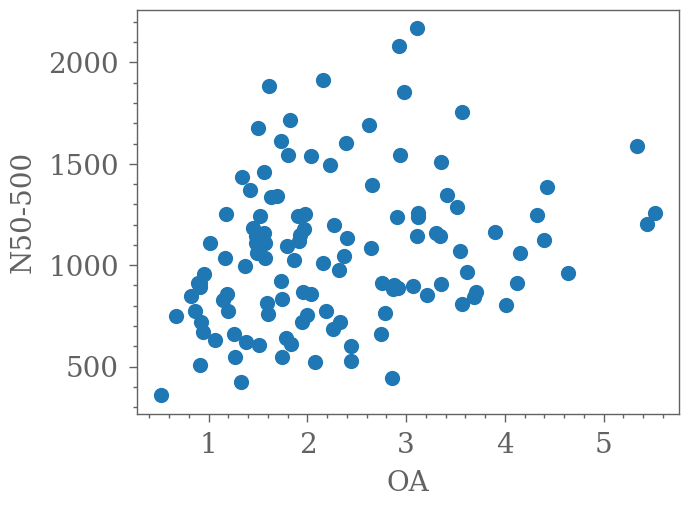

NorESM
118


<AxesSubplot:xlabel='time'>

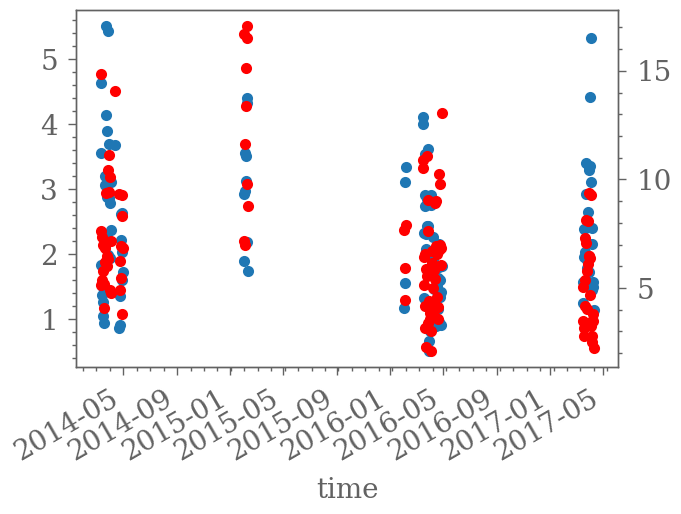

In [173]:
season = 'FMA'
mo ='ECHAM-SALSA'
df_s2 =  dic_df_med[mo]
print(mo)
mask_months = select_months(df_s2, season=season)
df_s2 = df_s2[mask_months].copy()
print(len(df_s2.dropna()))

df_s2.plot.scatter(x='OA',y='N50-500')
plt.show()
fi, ax = plt.subplots()
df_s2['OA'].plot(marker='.',linewidth=0)

season = 'FMA'
mo ='NorESM'
df_s1 =  dic_df_med[mo]
print(mo)
mask_months = select_months(df_s1, season=season)
df_s1 = df_s1[mask_months].copy()
print(len(df_s1.dropna()))
df_s1['OA'].plot(marker='.', linewidth=0, ax=ax.twinx(), c='r')

ECHAM-SALSA
118


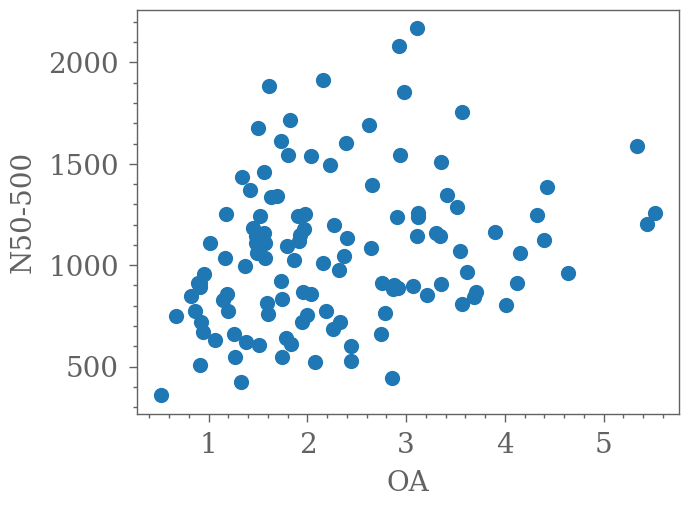

NorESM
118


<AxesSubplot:xlabel='time'>

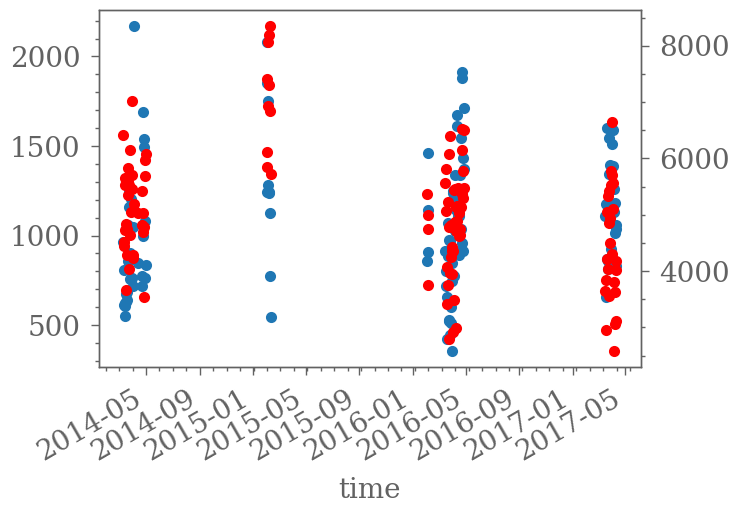

In [174]:
season = 'FMA'
mo ='ECHAM-SALSA'
df_s2 =  dic_df_med[mo]
print(mo)
mask_months = select_months(df_s2, season=season)
df_s2 = df_s2[mask_months].copy()
print(len(df_s2.dropna()))

df_s2.plot.scatter(x='OA',y='N50-500')
plt.show()
fi, ax = plt.subplots()
df_s2['N50-500'].plot(marker='.',linewidth=0)

season = 'FMA'
mo ='NorESM'
df_s1 =  dic_df_med[mo]
print(mo)
mask_months = select_months(df_s1, season=season)
df_s1 = df_s1[mask_months].copy()
print(len(df_s1.dropna()))
df_s1['N50-500'].plot(marker='.', linewidth=0, ax=ax.twinx(), c='r')

# PLOTS

In [175]:
models

['ECHAM-SALSA', 'NorESM', 'EC-Earth', 'UKESM']

In [176]:
models_and_obs =  models + ['Observations'] 

## T to OA

In [177]:
label_dic =dict(
    T_C=r'T  [$^\circ$C]',
    OA =r'OA [$\mu g m^{-3}$]',
)

## Define grid

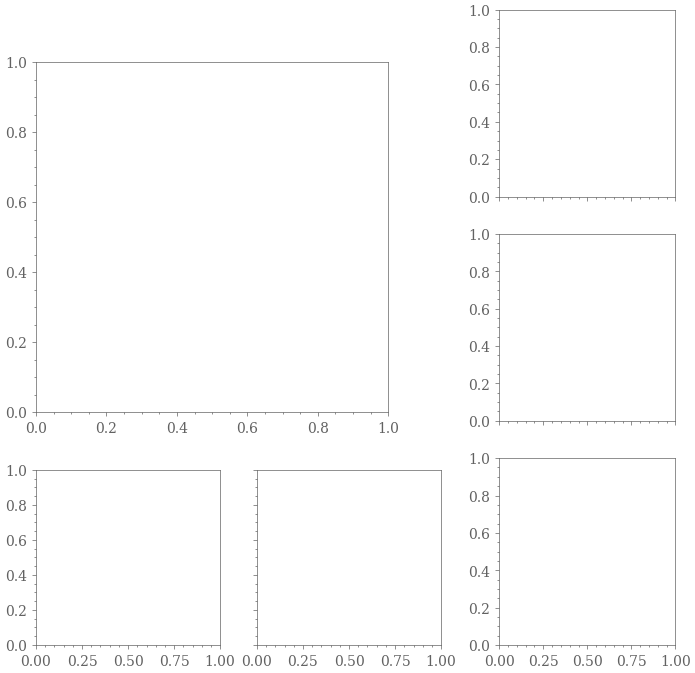

In [178]:

def make_cool_grid5(figsize=None,
                    width_ratios=None,
                    ncols=1,
                    nrows=1,
                    num_subplots_per_big_plot=2,
                    size_big_plot=5,
                    add_gs_kw=None,
                    sharex='col',
                    sharey='row',
                    
                    w_plot = 5.,
                    w_cbar = 1,
                    w_ratio_sideplot = 0.6,
                    frac_dist_axis_from_big = .15
                    ):
    width_small_plot = size_big_plot/num_subplots_per_big_plot
    width_dist_ax = size_big_plot*frac_dist_axis_from_big
    
    if figsize is None:
        
        figsize = [size_big_plot + width_small_plot+ width_dist_ax,
                   size_big_plot + width_small_plot+ width_dist_ax,
                  ]
    #figsize=[10,10]
    width_ratios = None
    add_gs_kw = None

    if width_ratios is None:
        width_ratios = [1] * ncols + [w_cbar / w_plot] #+ [1]* ncols_extra
    if add_gs_kw is None:
        add_gs_kw = dict()


    if 'hspace' not in add_gs_kw.keys():
        add_gs_kw['hspace'] = 0
    if 'wspace' not in add_gs_kw.keys():
        add_gs_kw['wspace'] = 0


    # add_gs_kw['width_ratios'] = width_ratios
    fig = plt.figure(figsize=figsize,
                     dpi=100)

    #gs = fig.add_gridspec(nrows, ncols, **add_gs_kw)

    
    w_r1 = [size_big_plot,size_big_plot*frac_dist_axis_from_big]
    h_r1 = [frac_dist_axis_from_big,1, ]
    
    gs0 = gridspec.GridSpec(2, 2, figure=fig, height_ratios= [size_big_plot+width_dist_ax,width_small_plot],
                            width_ratios = [size_big_plot+width_dist_ax,width_small_plot])
    #fig.show()
    
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows+1, ncols+1, width_ratios=w_r1, height_ratios=h_r1, subplot_spec=gs0[0,0], **add_gs_kw)
    # for the small plots:
    gs01 = gridspec.GridSpecFromSubplotSpec(num_subplots_per_big_plot+1,1, subplot_spec=gs0[:,1])#, **add_gs_kw)
    gs03 = gridspec.GridSpecFromSubplotSpec(1,num_subplots_per_big_plot, subplot_spec=gs0[1,:1])#, **add_gs_kw)

    # gs_s = gs[:,:(ncols+1)].subgridspec(nrows=nrows, ncols=ncols, wspace=add_gs_kw['wspace'], hspace=add_gs_kw['hspace'])
    axs = gs00.subplots(sharex=sharex, sharey=sharey, )
    axs_extra = gs01.subplots(sharex=sharex, sharey=sharey, )
    axs_extra2 = gs03.subplots(sharex=sharex, sharey=sharey, )
    axs_extra = np.concatenate((axs_extra, axs_extra2,))
    axs[0,1].clear()
    axs[0,1].axis("off")
    daxs = dict(x=axs[0,0],y=axs[1,1])
    # distribution axis
    for a in daxs:
        _ax = daxs[a]
        sns.despine(bottom=False, left=False, ax=_ax)
        _ax.axis("off")
    #daxs = [dax1,dax2]
    #axs = np.array(axs)

    ax = axs[1,0]


    return fig, ax, daxs, axs_extra


fig, ax, daxs, axs_extra = make_cool_grid5(#ncols_extra=1, nrows_extra=1
                                           )# w_ratio_sideplot=.5)
#for ax_e in axs_extra:
#    ax_e.set_xlabel('')
#    ax_e.set_ylabel('')
#    ax_e.set_ylim(ax.get_ylim())
#    ax_e.set_xlim(ax.get_xlim())
#    ax_e.axes.xaxis.set_ticklabels([])
#    ax_e.axes.yaxis.set_ticklabels([])

#    sns.despine(ax = ax_e)



In [179]:
#parameters, cov= curve_fit(f, x, y)

#model = scipy.odr.odrpack.Model(f_wrapper_for_odr)
#data = scipy.odr.odrpack.Data(x,y)
#myodr = scipy.odr.odrpack.ODR(data, model, beta0=parameters,  maxit=0)
#myodr.set_job(fit_type=2)
def compute_p_value(df_s, out, popt):
    parameters = popt
    parameterStatistics = out#myodr.run()    
    x = df_s.dropna()
    df_e = len(x) - len(popt) # degrees of freedom, error
    cov_beta = parameterStatistics.cov_beta # parameter covariance matrix from ODR
    sd_beta = parameterStatistics.sd_beta * parameterStatistics.sd_beta
    ci = []
    t_df = scipy.stats.t.ppf(0.975, df_e)
    ci = []
    for i in range(len(parameters)):
        ci.append([parameters[i] - t_df * parameterStatistics.sd_beta[i], parameters[i] + t_df * parameterStatistics.sd_beta[i]])

    tstat_beta = parameters / parameterStatistics.sd_beta # coeff t-statistics
    pstat_beta = (1.0 - scipy.stats.t.cdf(np.abs(tstat_beta), df_e)) * 2.0    # coef. p-values

    for i in range(len(parameters)):
        print('parameter:', parameters[i])
        print('   conf interval:', ci[i][0], ci[i][1])
        print('   tstat:', tstat_beta[i])
        print('   pstat:', pstat_beta[i])
        print()

## Make plot

In [180]:
def make_plot(v_x, v_y, xlims, ylims, season, 
              xlab=None, ylab=None, alpha_scat=.3,
             source_list = models_and_obs, fig=None, ax=None, daxs=None, axs_extra=None,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
              markersize=1,

             ):
    if fig is None: 
        fig, ax, daxs, axs_extra = make_cool_grid3(ncols_extra=2, nrows_extra=3,)# w_ratio_sideplot=.5)

    if xlab is None: 
        if xlab in label_dic:
            xlab = label_dic[v_x]
    if ylab is None: 
        if ylab in label_dic:
            ylab = label_dic[v_y]

    for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
        df_s =  dic_df_med[mo]

        mask_months = select_months(df_s, season=season)
        df_s = df_s[mask_months].copy()


        sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt*.7, 
                    label='__nolegend__',
                    ax = ax,
                    #facecolor='none',
                    edgecolor=cdic_model[mo],
                        marker='.',
                                                                s=markersize,

                   )
        sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax_ex,
                    #facecolor='none',
                    edgecolor=cdic_model[mo],
                        marker='.',
                    
                                            s=markersize,
                    
                   )
        ax_ex.set_title(mo, y=.95)
        
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    fig.suptitle(f'ATTO, {season} season, 2012-2018', y=.95)
    xlim_dist = list(daxs['y'].get_xlim())
    for mo in models_and_obs:

        df_s =  dic_df_med[mo]

        mask_months = select_months(df_s, season=season)
        df_s = df_s[mask_months].copy()
        if xscale=='log':
            xbins = np.logspace(np.log10(xlims[0]),np.log10(xlims[1]),20)
        else:
            xbins = np.linspace(xlims[0],xlims[1],20)
            
        if yscale=='log':
            ybins = np.logspace(np.log10(ylims[0]),np.log10(ylims[1]),20)
        else:
            ybins = np.linspace(ylims[0],ylims[1],20)
            

        sns.histplot(#x=v_x,
                    x= df_s[v_x], 
            edgecolor=cdic_model[mo],
            #log_scale=(xscale=='log'),
            color=cdic_model[mo], 
            element="step",
            label=mo,
            linewidth=1,
            #log_scale=(xscale=='log',False,),

            alpha=.1,
            bins=xbins,
            ax = daxs['x'],
                    
                   )
        print(daxs['x'].get_ylim())
        _fi, ax_test = plt.subplots();
        ax_test = sns.histplot(#x=v_x,
            y=df_s[v_y],
            color=cdic_model[mo], 
            element="step",
            label=mo,
            ax = ax_test,
            #ax = daxs['y'],
            linewidth=2,
            
            #edgecolor=None,
            #log_scale=(False,yscale=='log'),
            alpha=.1,
            bins=ybins,
        );
        
        sns.histplot(#x=v_x,
            y=df_s[v_y],
            color=cdic_model[mo], 
            element="step",
            label=mo,
            ax = daxs['y'],
            linewidth=1,
            
            #edgecolor=None,
            #log_scale=(xscale=='log',yscale=='log'),
            #log_scale=(False,yscale=='log'),
            
            alpha=.1,
            bins=ybins,
            )
        xlim_dist_n = list(ax_test.get_xlim())
        _fi.clf()
        #if xlim_dist_n[1]>xlim_dist_n[1]:
        xlim_dist[1] = max(xlim_dist_n[1],xlim_dist[1])
        #daxs['y'].set_xlim([0,xlim_dist[1]])
        
        #plt.show()

    ax.set_ylim(ylims)
    ax.set_xlim(xlims)


    for ax_e in axs_extra:
        ax_e.set_xlabel('')
        ax_e.set_ylabel('')
        ax_e.set_ylim(ax.get_ylim())
        ax_e.set_xlim(ax.get_xlim())
        ax_e.axes.xaxis.set_ticklabels([])
        ax_e.axes.yaxis.set_ticklabels([])

        sns.despine(ax = ax_e)

    return

#### WET_mid

## T to OA, exp

In [181]:
def get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12]):
    v_log_y = f'ln({v_y})'
    df_s[v_log_y] = np.log(df_s[v_y])
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_log_y, fit_func = 'linear', return_func=True, beta0=beta0)
    print('****ignore****')
    _, _, _, func = get_odr_fit_and_labs(df_s, v_x, v_log_y, fit_func = 'exp', return_func=True, beta0=beta0, pprint=False)
    print('****stop ignore****')
    
    a = np.exp(popt[-1])
    b = popt[0]
    if np.abs(a)< 0.009:
        #a_lab = ((str("%.2e" % a)).replace("e", ' \\cdot 10^{ ')).replace("+0", ") + ' } ')
        label = '($%.1E) \cdot e^{%5.2fx}$' %(a,b,)
    else:
        label = '$%5.2f e^{%5.2fx}$' %(a,b,)
    popt = [a,b]

    return popt, pov, label, func

# Compare seasons

### FMA

(0.0, 17.85)
(0.0, 43.05)
(0.0, 43.05)
(0.0, 43.05)
(0.0, 43.05)
*******ECHAM-SALSA*****
[0.01, 0.12]
Beta: [ 0.12918408 -2.97275797]
Beta Std Error: [0.0173084  0.49766072]
Beta Covariance: [[ 0.00043011 -0.0122973 ]
 [-0.0122973   0.35557419]]
Residual Variance: 0.6965246570067974
Inverse Condition #: 0.03214714854194716
Reason(s) for Halting:
  Sum of squares convergence
[ 0.12918408 -2.97275797]
reason for haltng
****ignore****
[0.01, 0.12]
[0.00646644 0.16140547]
reason for haltng
****stop ignore****
*******NorESM*****
[0.01, 0.12]
Beta: [ 0.35307526 -6.79069485]
Beta Std Error: [0.03714882 0.9073882 ]
Beta Covariance: [[ 0.00279124 -0.06810907]
 [-0.06810907  1.66530428]]
Residual Variance: 0.494416160951365
Inverse Condition #: 0.01505258380904231
Reason(s) for Halting:
  Sum of squares convergence
[ 0.35307526 -6.79069485]
reason for haltng
****ignore****
[0.01, 0.12]
[0.02711165 0.17181735]
reason for haltng
****stop ignore****
*******EC-Earth*****
[0.01, 0.12]
Beta: [ 0.30237

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[0.01, 0.12]
Beta: [  0.52966939 -13.86505447]
Beta Std Error: [0.05022625 1.28115698]
Beta Covariance: [[ 0.00611853 -0.1558809 ]
 [-0.1558809   3.98098043]]
Residual Variance: 0.41230125221774233
Inverse Condition #: 0.015979556891519132
Reason(s) for Halting:
  Sum of squares convergence
[  0.52966939 -13.86505447]
reason for haltng
****ignore****
[0.01, 0.12]
[-1.00994055e+09 -8.73064729e-01]
reason for haltng
****stop ignore****


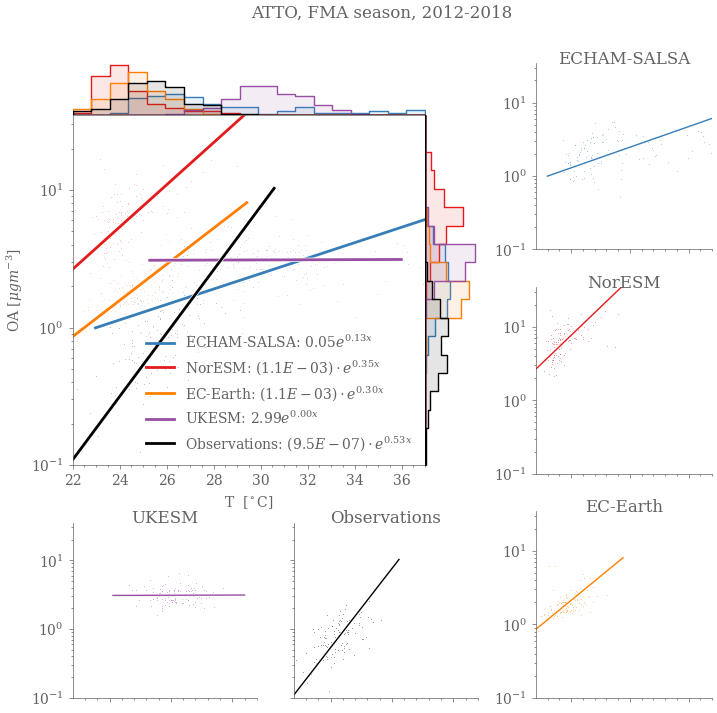

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [182]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,37]
ylims = [.1,35]


season='FMA'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(f'*******{mo}*****')
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### FMAM

(0.0, 40.95)
(0.0, 58.8)
(0.0, 58.8)
(0.0, 58.8)
(0.0, 58.8)
*******ECHAM-SALSA*****
[0.01, 0.12]
Beta: [ 0.15732813 -3.69067301]
Beta Std Error: [0.01789758 0.5004802 ]
Beta Covariance: [[ 0.00044283 -0.01232661]
 [-0.01232661  0.34627435]]
Residual Variance: 0.7233583143759182
Inverse Condition #: 0.029474919580369508
Reason(s) for Halting:
  Sum of squares convergence
[ 0.15732813 -3.69067301]
reason for haltng
****ignore****
[0.01, 0.12]
[0.00205651 0.2048984 ]
reason for haltng
****stop ignore****
*******NorESM*****
[0.01, 0.12]
Beta: [ 0.30310369 -5.54714529]
Beta Std Error: [0.02784142 0.68653805]
Beta Covariance: [[ 0.00143912 -0.03544102]
 [-0.03544102  0.87506886]]
Residual Variance: 0.5386256001465112
Inverse Condition #: 0.01693355634815586
Reason(s) for Halting:
  Sum of squares convergence
[ 0.30310369 -5.54714529]
reason for haltng
****ignore****
[0.01, 0.12]
[0.05269025 0.14532404]
reason for haltng
****stop ignore****
*******EC-Earth*****
[0.01, 0.12]
Beta: [ 0.3137328

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[-1.12926441e+09 -8.80075538e-01]
reason for haltng
****stop ignore****


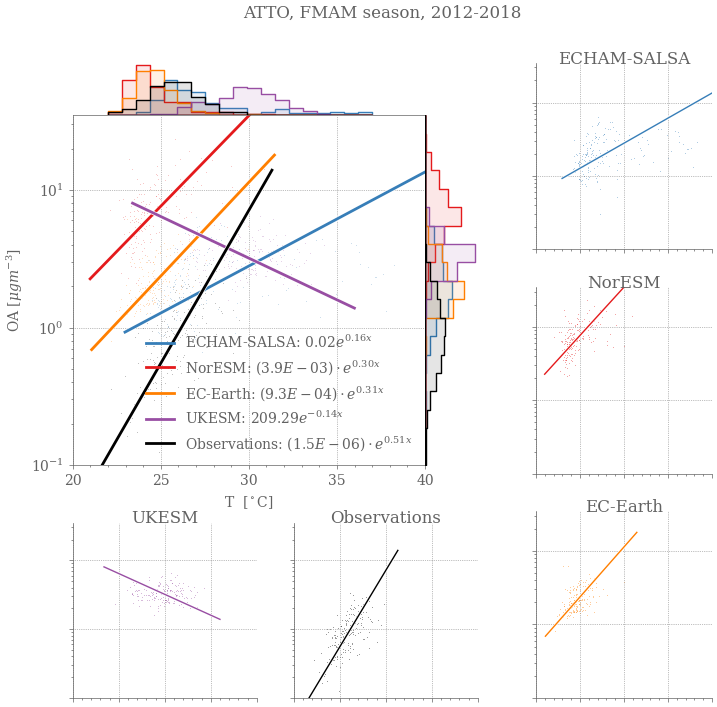

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [183]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,37]
ylims = [.1,35]


season='FMAM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(f'*******{mo}*****')
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')

ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')

    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### MAM

(0.0, 40.95)
(0.0, 56.7)
(0.0, 56.7)
(0.0, 56.7)
(0.0, 56.7)
ECHAM-SALSA
[0.01, 0.12]
Beta: [ 0.16683012 -3.92107066]
Beta Std Error: [0.02016644 0.55646301]
Beta Covariance: [[ 0.0005487  -0.01507779]
 [-0.01507779  0.41778494]]
Residual Variance: 0.7411734031531144
Inverse Condition #: 0.028373947224057207
Reason(s) for Halting:
  Sum of squares convergence
[ 0.16683012 -3.92107066]
reason for haltng
****ignore****
[0.01, 0.12]
[0.04392109 0.09777305]
reason for haltng
****stop ignore****
NorESM
[0.01, 0.12]
Beta: [ 0.30028724 -5.48712116]
Beta Std Error: [0.03005717 0.73886084]
Beta Covariance: [[ 0.00157323 -0.0386253 ]
 [-0.0386253   0.95064862]]
Residual Variance: 0.5742556563059806
Inverse Condition #: 0.016516972192326472
Reason(s) for Halting:
  Sum of squares convergence
[ 0.30028724 -5.48712116]
reason for haltng
****ignore****
[0.01, 0.12]
[0.05142606 0.14611286]
reason for haltng
****stop ignore****
EC-Earth
[0.01, 0.12]
Beta: [ 0.2991609  -6.63641521]
Beta Std Error: [0.0

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[-1.10043935e+09 -8.77176067e-01]
reason for haltng
****stop ignore****


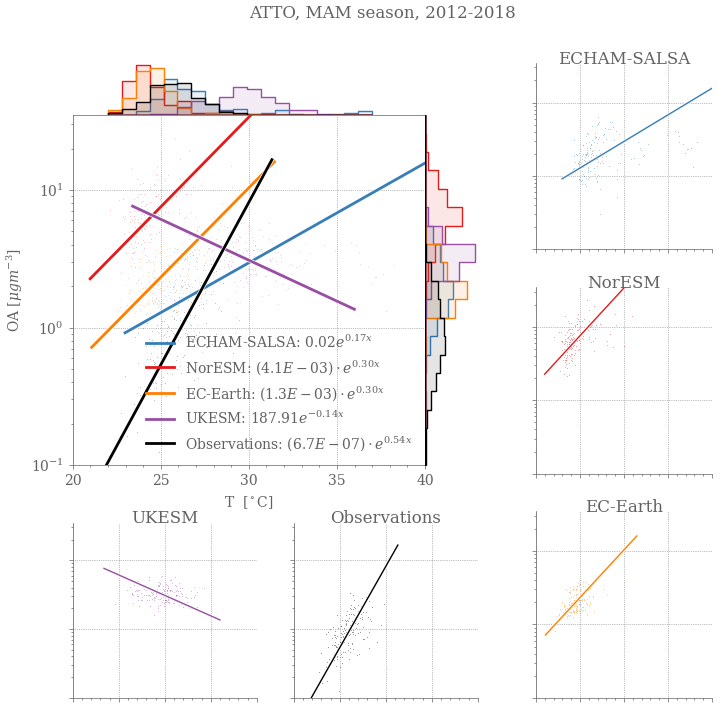

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [184]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,37]
ylims = [.1,35]


season='MAM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')

ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')

    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### JFM

(0.0, 17.85)
(0.0, 32.55)
(0.0, 32.55)
(0.0, 32.55)
(0.0, 32.55)
ECHAM-SALSA
[0.01, 0.12]
Beta: [ 0.12106719 -2.82350372]
Beta Std Error: [0.01515792 0.48038643]
Beta Covariance: [[ 4.00026027e-04 -1.25969226e-02]
 [-1.25969226e-02  4.01782175e-01]]
Residual Variance: 0.5743687299166718
Inverse Condition #: 0.03193370810838086
Reason(s) for Halting:
  Sum of squares convergence
[ 0.12106719 -2.82350372]
reason for haltng
****ignore****
[0.01, 0.12]
[0.02079661 0.11985436]
reason for haltng
****stop ignore****
NorESM
[0.01, 0.12]
Beta: [ 0.33450059 -6.19353824]
Beta Std Error: [0.03457487 0.86553652]
Beta Covariance: [[ 0.00277993 -0.06947677]
 [-0.06947677  1.74213888]]
Residual Variance: 0.4300193729862979
Inverse Condition #: 0.018972120182577875
Reason(s) for Halting:
  Sum of squares convergence
[ 0.33450059 -6.19353824]
reason for haltng
****ignore****
[0.01, 0.12]
[0.05616489 0.14531301]
reason for haltng
****stop ignore****
EC-Earth
[0.01, 0.12]
Beta: [ 0.11847399 -2.30517791]
B

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


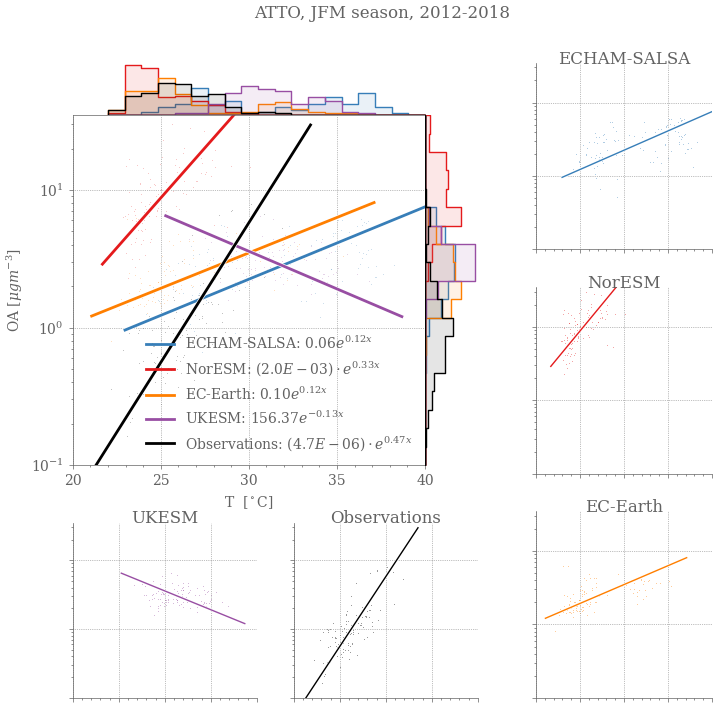

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [185]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='JFM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')

ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')

    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### MAM

(0.0, 40.95)
(0.0, 56.7)
(0.0, 56.7)
(0.0, 56.7)
(0.0, 56.7)
ECHAM-SALSA
[0.01, 0.12]
Beta: [ 0.16683012 -3.92107066]
Beta Std Error: [0.02016644 0.55646301]
Beta Covariance: [[ 0.0005487  -0.01507779]
 [-0.01507779  0.41778494]]
Residual Variance: 0.7411734031531144
Inverse Condition #: 0.028373947224057207
Reason(s) for Halting:
  Sum of squares convergence
[ 0.16683012 -3.92107066]
reason for haltng
****ignore****
[0.01, 0.12]
[0.04392109 0.09777305]
reason for haltng
****stop ignore****
NorESM
[0.01, 0.12]
Beta: [ 0.30028724 -5.48712116]
Beta Std Error: [0.03005717 0.73886084]
Beta Covariance: [[ 0.00157323 -0.0386253 ]
 [-0.0386253   0.95064862]]
Residual Variance: 0.5742556563059806
Inverse Condition #: 0.016516972192326472
Reason(s) for Halting:
  Sum of squares convergence
[ 0.30028724 -5.48712116]
reason for haltng
****ignore****
[0.01, 0.12]
[0.05142606 0.14611286]
reason for haltng
****stop ignore****
EC-Earth
[0.01, 0.12]
Beta: [ 0.2991609  -6.63641521]
Beta Std Error: [0.0

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[0.01, 0.12]
Beta: [  0.54385896 -14.21977718]
Beta Std Error: [0.04102927 1.0575327 ]
Beta Covariance: [[ 0.00459891 -0.11838935]
 [-0.11838935  3.05530649]]
Residual Variance: 0.3660436091727026
Inverse Condition #: 0.016116091653026424
Reason(s) for Halting:
  Sum of squares convergence
[  0.54385896 -14.21977718]
reason for haltng
****ignore****
[0.01, 0.12]
[-1.10043935e+09 -8.77176067e-01]
reason for haltng
****stop ignore****


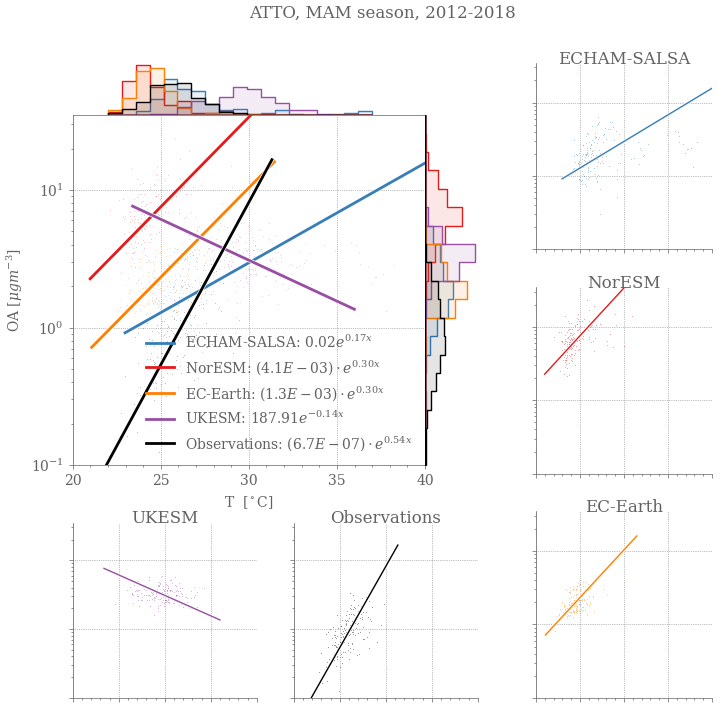

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [186]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,37]
ylims = [.1,35]


season='MAM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    #popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    popt, pov, label, func = get_lin_log_fit(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')
ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

ECHAM-SALSA
Going for least square
NorESM
Going for least square
EC-Earth
Going for least square
UKESM
Going for least square
Observations
Going for least square
Plots/ATTO/scat_all_years_echam_noresm_residual_exp_MAM_ATTO_T_C_OA-ATTO_ukesm.png


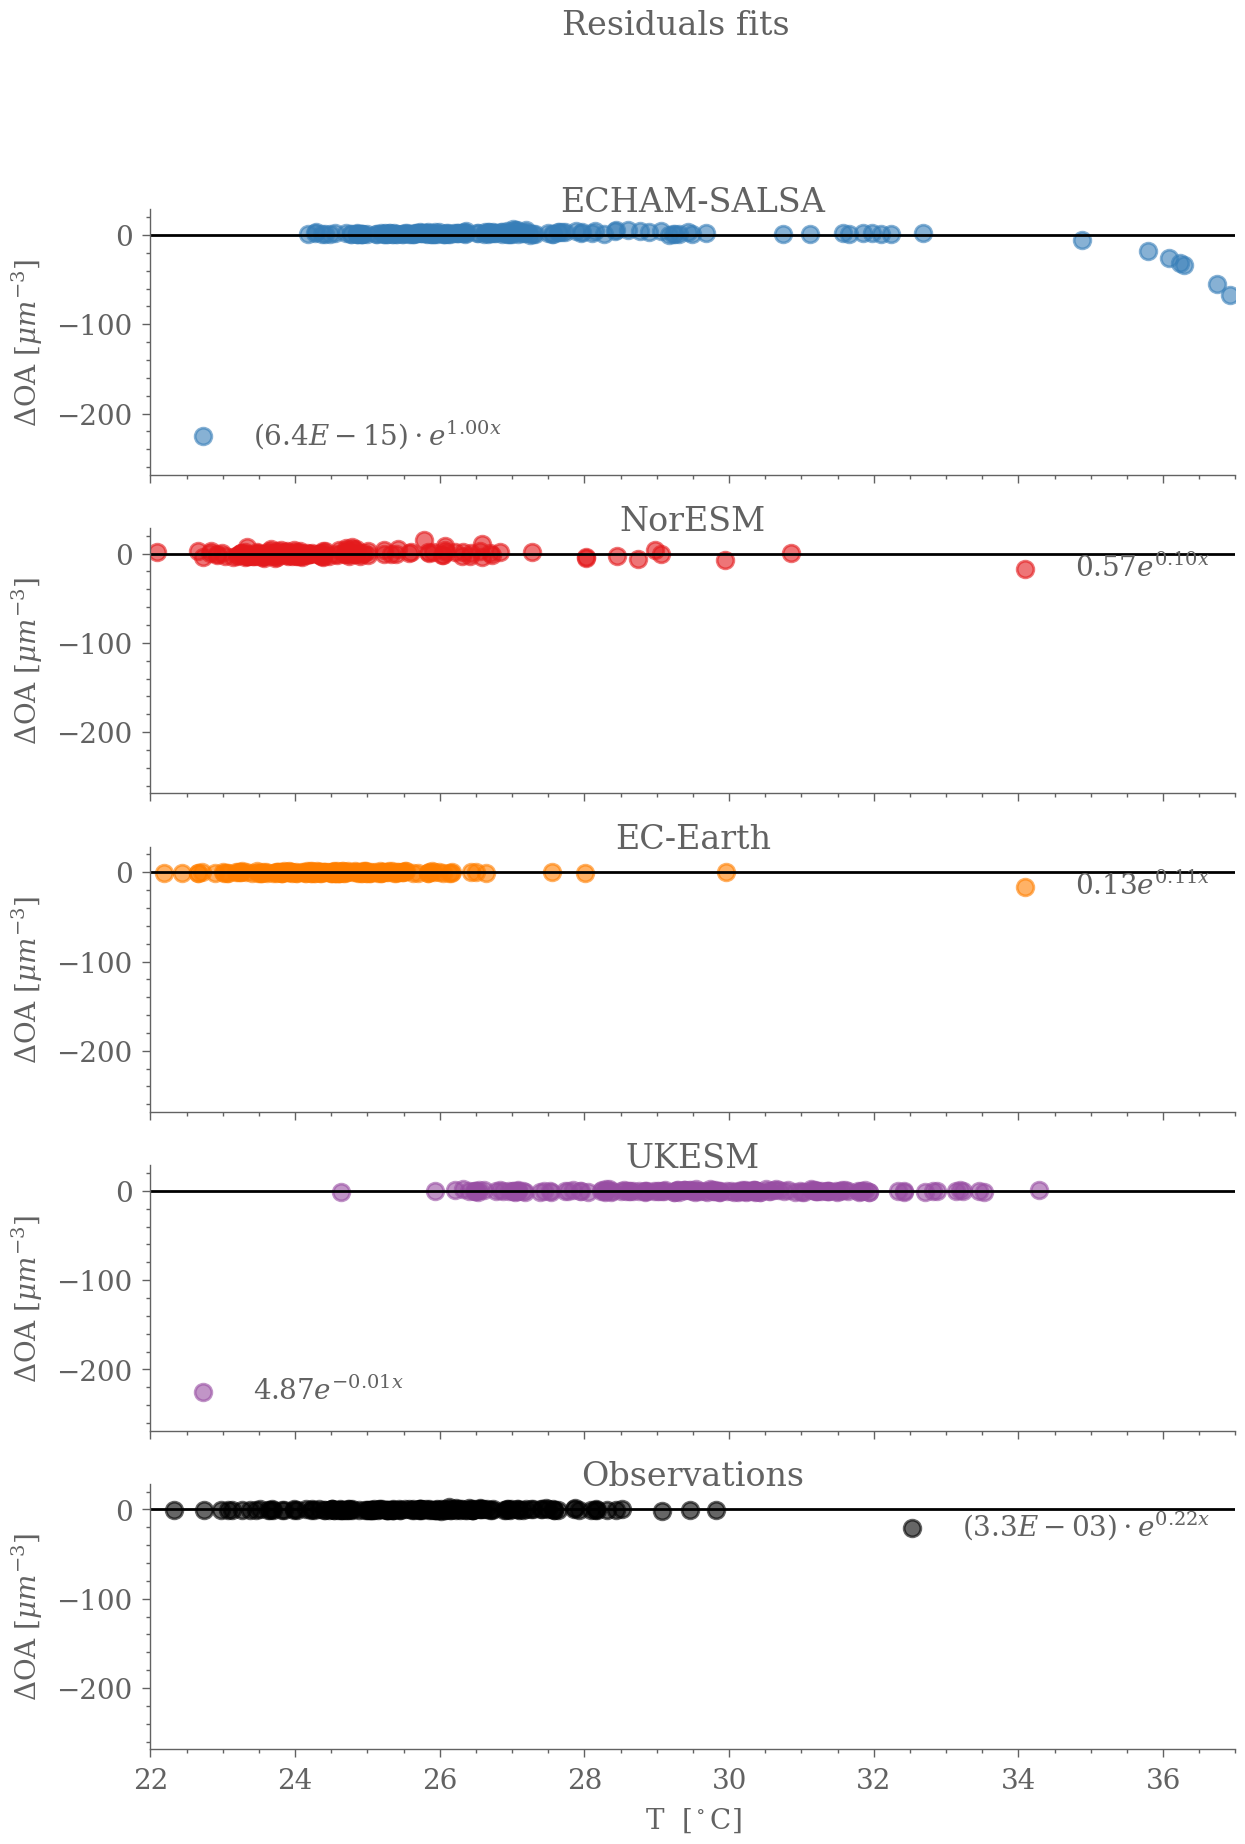

In [187]:
## Settings
alpha_scatt = 0.5

figsize=[7,10]
xlab = r'T  [$^\circ$C]'
ylab = r'$\Delta$OA [$\mu m^{-3}$]'


#ylims = [1,700]

# OBS: 
v_y = 'OA'
v_x = 'T_C'

season = 'MAM'
xscale='linear'
yscale='linear'

fig, axs = plt.subplots(len(models_and_obs), sharex=True, sharey= True, figsize=figsize)

## Settings
alpha_scatt = 0.6


for mo, ax in zip(models_and_obs, axs):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True, return_out_obj=True)
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    ax.scatter(df_s[v_x],df_s[v_y]-func(df_s[v_x],*popt),
                                    color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                #facecolor='none',
               alpha=alpha_scatt,
               
                edgecolor=cdic_model[mo],

                label=label
                   )
    _xlim = [_mi*.95, _ma*1.05]
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


    ax.hlines(0, xmin=xlims[0],xmax=xlims[1], color='k', linewidth=1)
    ax.legend(frameon=False)
    ax.set_ylabel(ylab)
    ax.set_title(mo, y=.93)
    ax.set_xlim(xlims)

        
#fig.suptitle('Observations')
axs[-1].set_xlabel(xlab)
fig.suptitle(r'Residuals fits')

sns.despine(fig)    
    
fn = make_fn_scat(f'residual_exp_{season}_{select_station}', v_x, v_y)
ax.legend(frameon=False)
#fig.savefig(fn, dpi=150)
#fig.savefig(fn.with_suffix('.pdf'), dpi=150)
print(fn)

### JFM

(0.0, 40.95)
(0.0, 57.75)
(0.0, 69.3)
(0.0, 69.3)
(0.0, 69.3)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.00643714 0.20908635]
Beta Std Error: [0.00541936 0.0297953 ]
Beta Covariance: [[ 3.74107039e-05 -2.05113006e-04]
 [-2.05113006e-04  1.13082561e-03]]
Residual Variance: 0.7850546120792202
Inverse Condition #: 0.023903479223658437
Reason(s) for Halting:
  Sum of squares convergence
[0.00643714 0.20908635]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00681444 0.28135915]
Beta Std Error: [0.00506887 0.02974839]
Beta Covariance: [[ 4.39786414e-05 -2.57772666e-04]
 [-2.57772666e-04  1.51476889e-03]]
Residual Variance: 0.5842256723978799
Inverse Condition #: 0.016906153197329774
Reason(s) for Halting:
  Sum of squares convergence
[0.00681444 0.28135915]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.00047915 0.34057178]
Beta Std Error: [0.0004441  0.03743321]
Beta Covariance: [[ 3.32004136e-07 -2.79703338e-05]
 [-2.79703338e-05  2.35880448e-03]]
Residual Variance: 0.5940487905668631
Inverse Con

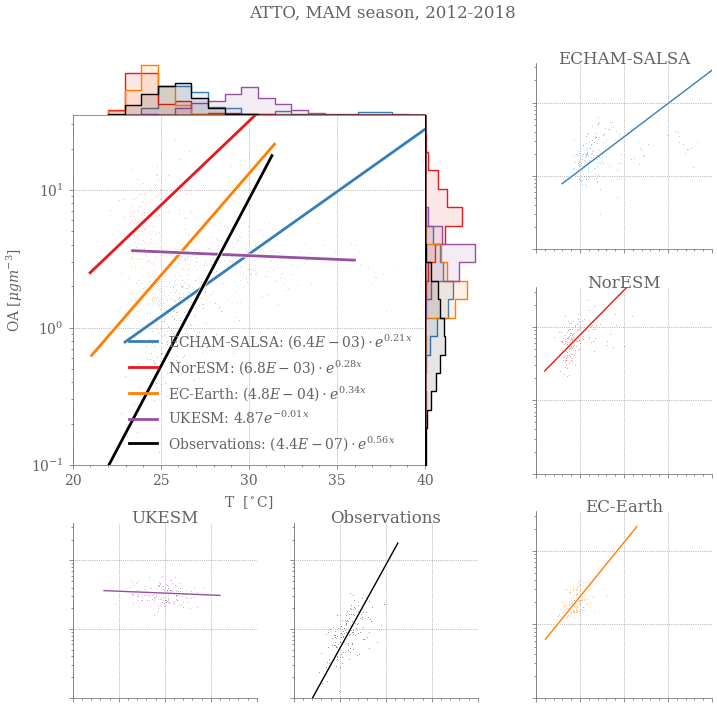

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [188]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='MAM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])

    ax_ex.set_ylim(ylims)
    ax_ex.set_xlim(xlims)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')

ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

ECHAM-SALSA
Going for least square
NorESM
Going for least square
EC-Earth
Going for least square
UKESM
Going for least square
Observations
Going for least square
Plots/ATTO/scat_all_years_echam_noresm_residual_exp_JFM_ATTO_T_C_OA-ATTO_ukesm.png


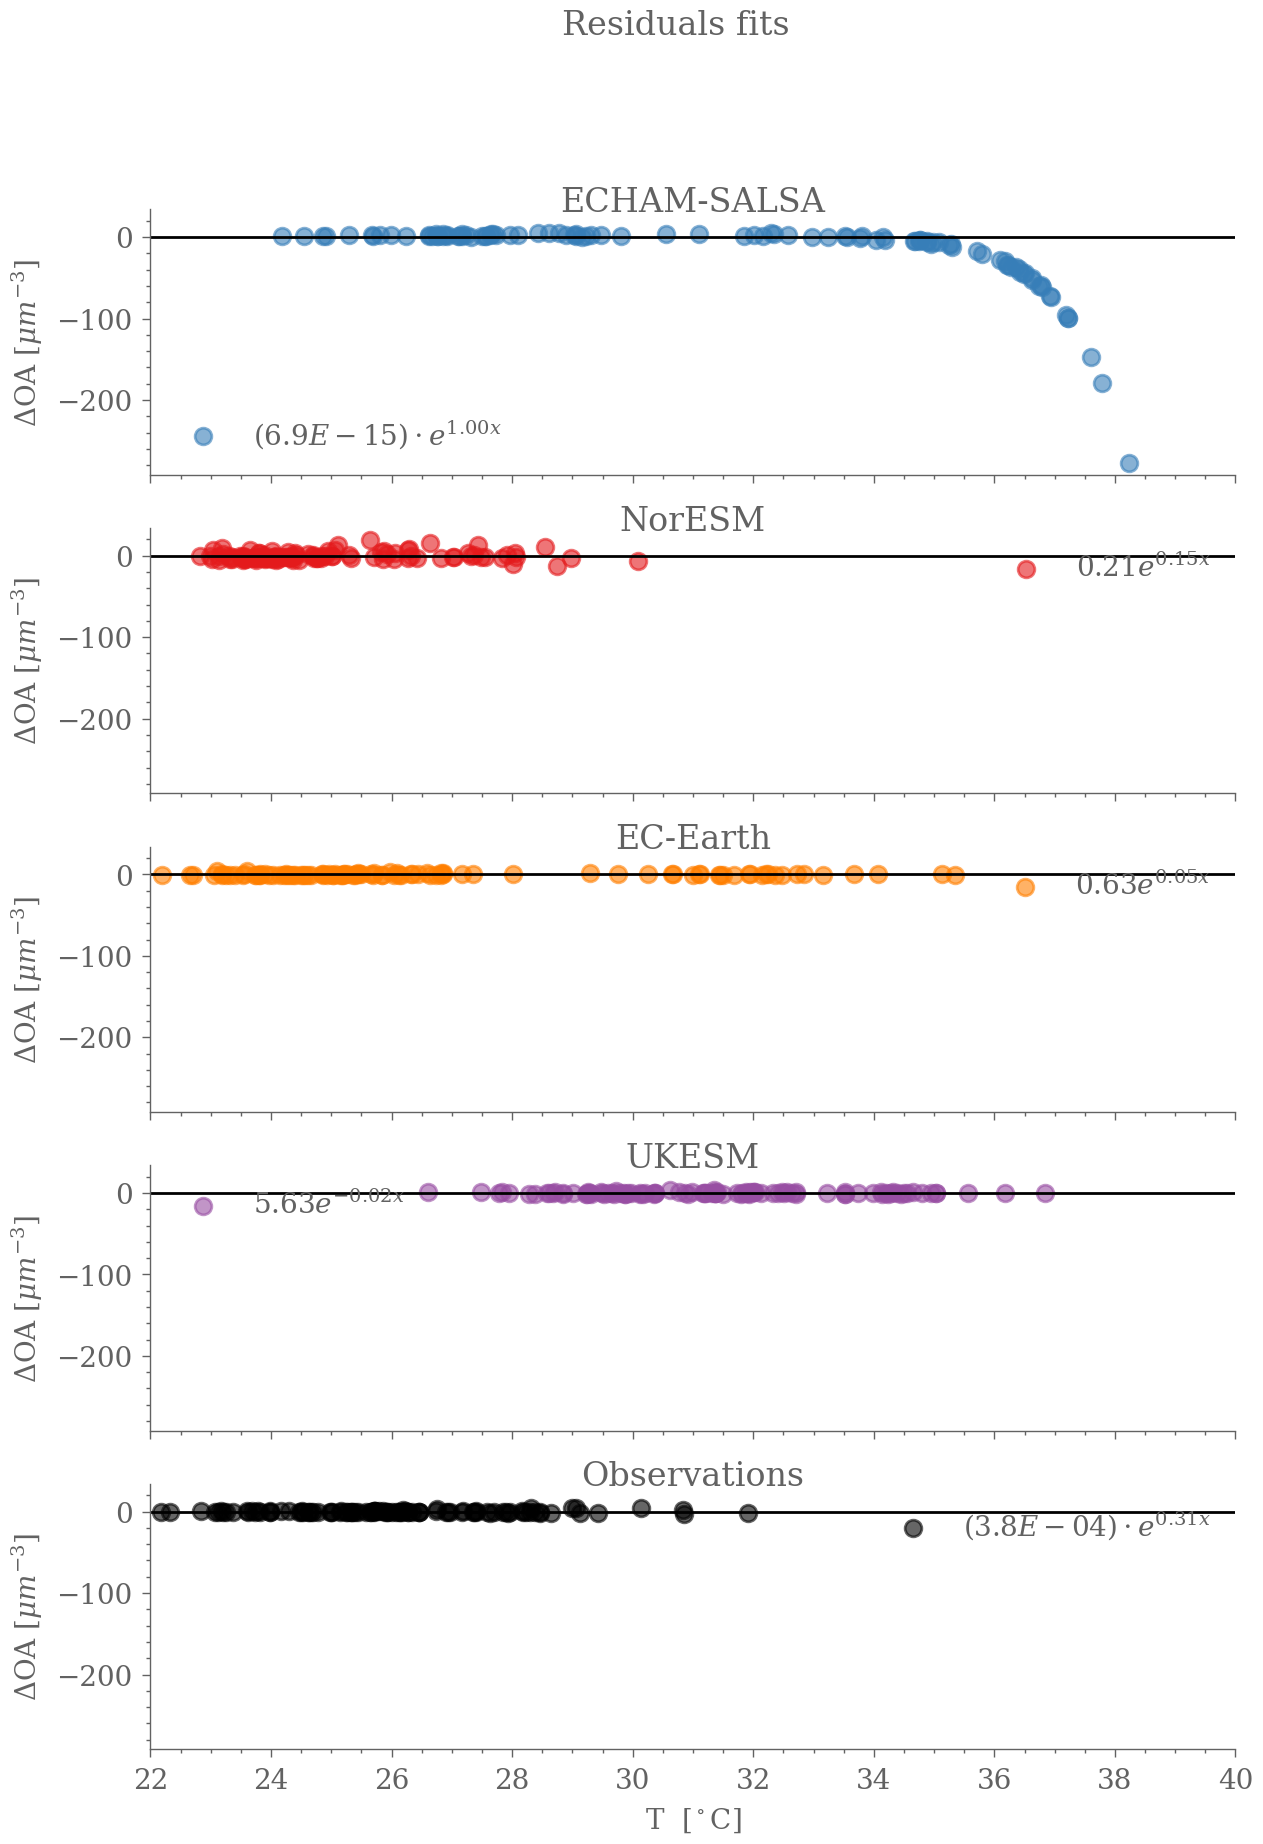

In [189]:
## Settings
alpha_scatt = 0.5

figsize=[7,10]
xlab = r'T  [$^\circ$C]'
ylab = r'$\Delta$OA [$\mu m^{-3}$]'


#ylims = [1,700]

# OBS: 
v_y = 'OA'
v_x = 'T_C'

season = 'JFM'
xscale='linear'
yscale='linear'

fig, axs = plt.subplots(len(models_and_obs), sharex=True, sharey= True, figsize=figsize)

## Settings
alpha_scatt = 0.6


for mo, ax in zip(models_and_obs, axs):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True, return_out_obj=True)
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    ax.scatter(df_s[v_x],df_s[v_y]-func(df_s[v_x],*popt),
                                    color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                #facecolor='none',
               alpha=alpha_scatt,
               
                edgecolor=cdic_model[mo],

                label=label
                   )
    _xlim = [_mi*.95, _ma*1.05]
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


    ax.hlines(0, xmin=xlims[0],xmax=xlims[1], color='k', linewidth=1)
    ax.legend(frameon=False)
    ax.set_ylabel(ylab)
    ax.set_title(mo, y=.93)
    ax.set_xlim(xlims)

        
#fig.suptitle('Observations')
axs[-1].set_xlabel(xlab)
fig.suptitle(r'Residuals fits')

sns.despine(fig)    
    
fn = make_fn_scat(f'residual_exp_{season}_{select_station}', v_x, v_y)
ax.legend(frameon=False)
#fig.savefig(fn, dpi=150)
#fig.savefig(fn.with_suffix('.pdf'), dpi=150)
print(fn)

ECHAM-SALSA
[0.01, 0.12]
Beta: [0.00643714 0.20908635]
Beta Std Error: [0.00541936 0.0297953 ]
Beta Covariance: [[ 3.74107039e-05 -2.05113006e-04]
 [-2.05113006e-04  1.13082561e-03]]
Residual Variance: 0.7850546120792202
Inverse Condition #: 0.023903479223658437
Reason(s) for Halting:
  Sum of squares convergence
[0.00643714 0.20908635]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00681444 0.28135915]
Beta Std Error: [0.00506887 0.02974839]
Beta Covariance: [[ 4.39786414e-05 -2.57772666e-04]
 [-2.57772666e-04  1.51476889e-03]]
Residual Variance: 0.5842256723978799
Inverse Condition #: 0.016906153197329774
Reason(s) for Halting:
  Sum of squares convergence
[0.00681444 0.28135915]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.00047915 0.34057178]
Beta Std Error: [0.0004441  0.03743321]
Beta Covariance: [[ 3.32004136e-07 -2.79703338e-05]
 [-2.79703338e-05  2.35880448e-03]]
Residual Variance: 0.5940487905668631
Inverse Condition #: 0.00398231373899473
Reason(s) for Halting:
  Sum of 

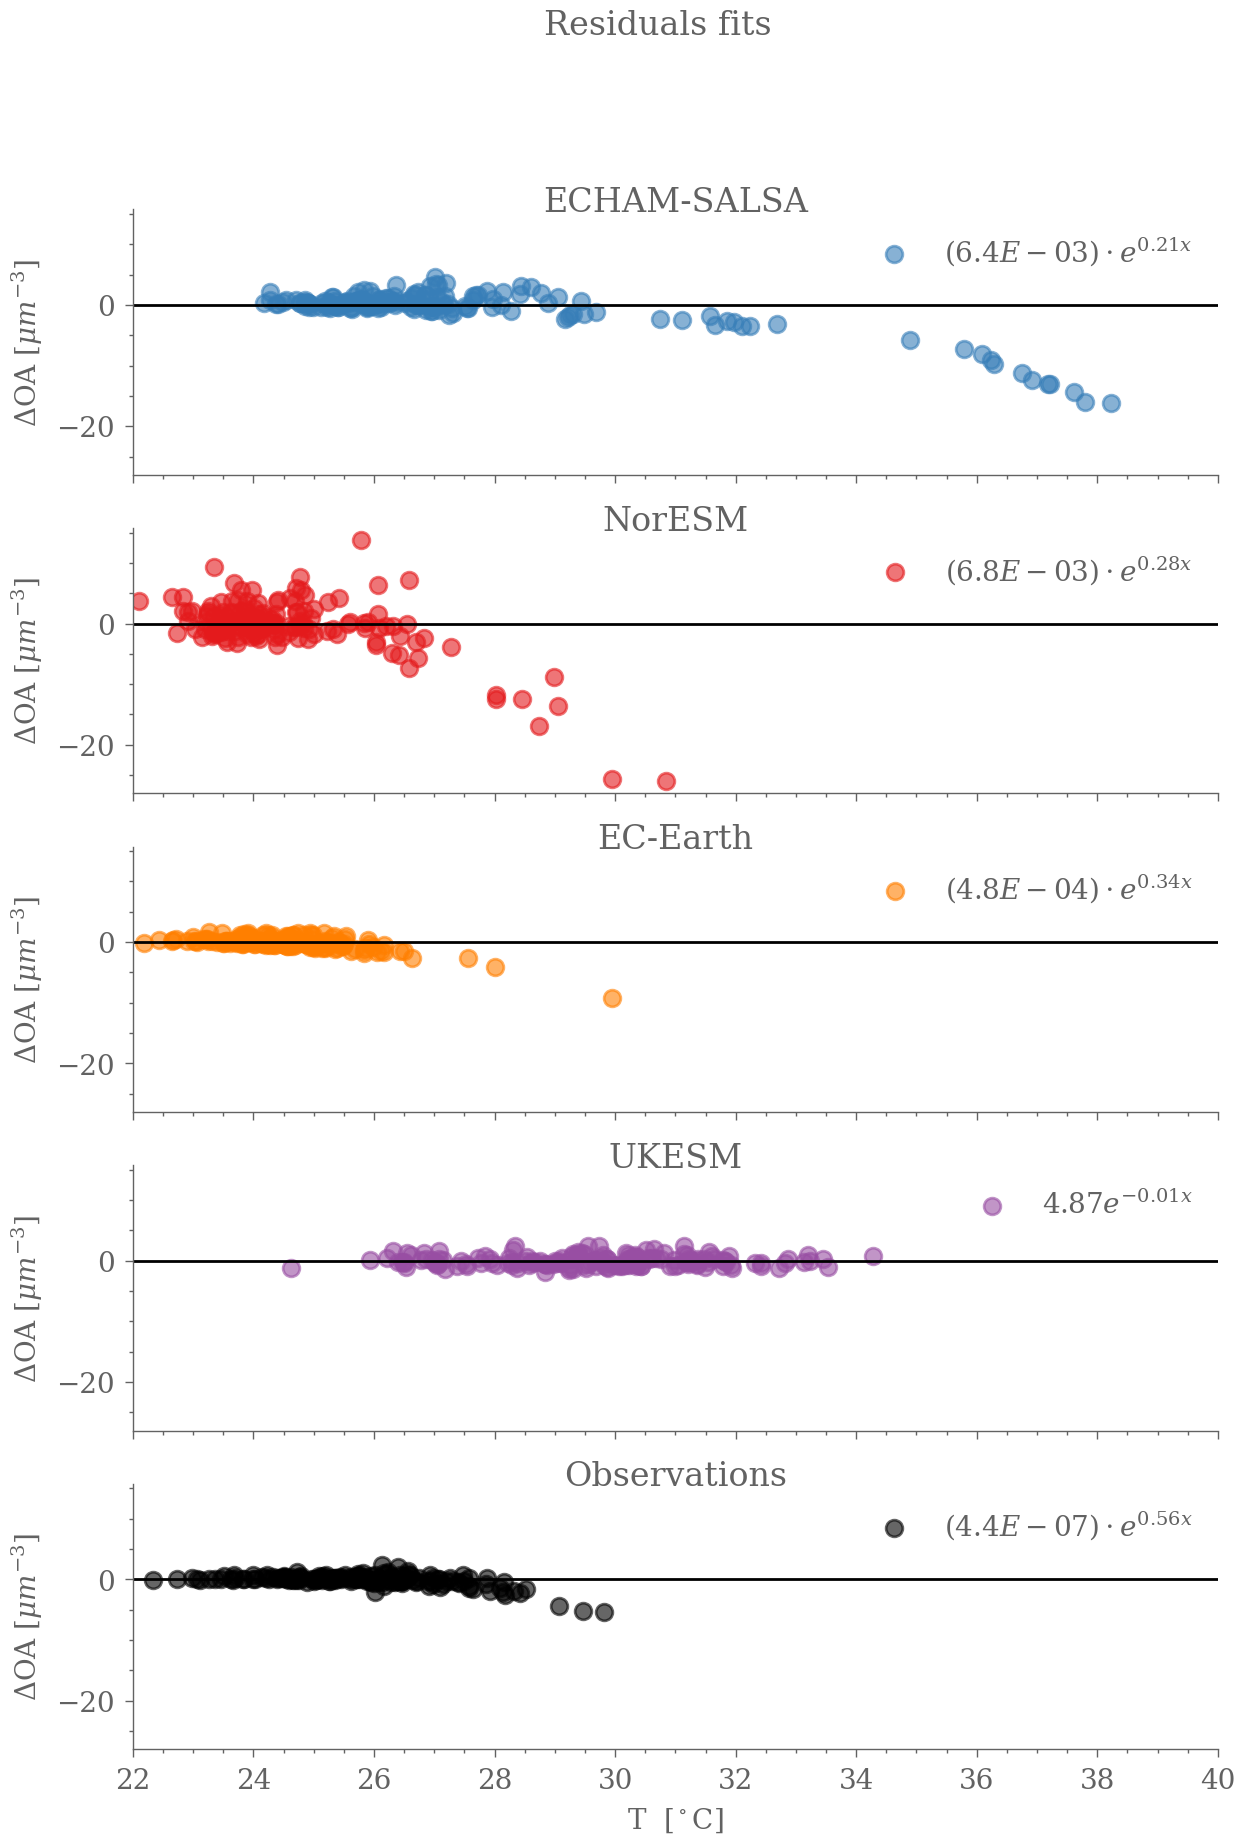

In [190]:
## Settings
alpha_scatt = 0.5

figsize=[7,10]
xlab = r'T  [$^\circ$C]'
ylab = r'$\Delta$OA [$\mu m^{-3}$]'


#ylims = [1,700]

# OBS: 
v_y = 'OA'
v_x = 'T_C'

season = 'MAM'
xscale='linear'
yscale='linear'

fig, axs = plt.subplots(len(models_and_obs), sharex=True, sharey= True, figsize=figsize)

## Settings
alpha_scatt = 0.6


for mo, ax in zip(models_and_obs, axs):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True, return_out_obj=True)
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True)
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    ax.scatter(df_s[v_x],df_s[v_y]-func(df_s[v_x],*popt),
                                    color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                #facecolor='none',
               alpha=alpha_scatt,
               
                edgecolor=cdic_model[mo],

                label=label
                   )
    _xlim = [_mi*.95, _ma*1.05]
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


    ax.hlines(0, xmin=xlims[0],xmax=xlims[1], color='k', linewidth=1)
    ax.legend(frameon=False)
    ax.set_ylabel(ylab)
    ax.set_title(mo, y=.93)
    ax.set_xlim(xlims)

        
#fig.suptitle('Observations')
axs[-1].set_xlabel(xlab)
fig.suptitle(r'Residuals fits')

sns.despine(fig)    
    
fn = make_fn_scat(f'residual_exp_{season}_{select_station}', v_x, v_y)
ax.legend(frameon=False)
#fig.savefig(fn, dpi=150)
#fig.savefig(fn.with_suffix('.pdf'), dpi=150)
print(fn)

### JFM

(0.0, 17.85)
(0.0, 32.55)
(0.0, 32.55)
(0.0, 32.55)
(0.0, 32.55)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.06596067 0.11857092]
Beta Std Error: [0.03414628 0.01566436]
Beta Covariance: [[ 0.00222593 -0.00101617]
 [-0.00101617  0.00046844]]
Residual Variance: 0.5238121537823794
Inverse Condition #: 0.0036362830841301487
Reason(s) for Halting:
  Sum of squares convergence
[0.06596067 0.11857092]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00311524 0.31897838]
Beta Std Error: [0.00285651 0.03564552]
Beta Covariance: [[ 1.91399220e-05 -2.38451898e-04]
 [-2.38451898e-04  2.98042318e-03]]
Residual Variance: 0.42631639101649244
Inverse Condition #: 0.028334408873233848
Reason(s) for Halting:
  Sum of squares convergence
[0.00311524 0.31897838]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.05617751 0.14028845]
Beta Std Error: [0.02834723 0.01820127]
Beta Covariance: [[ 0.00146871 -0.00093883]
 [-0.00093883  0.00060551]]
Residual Variance: 0.5471234135646461
Inverse Condition #: 0.004812359982590

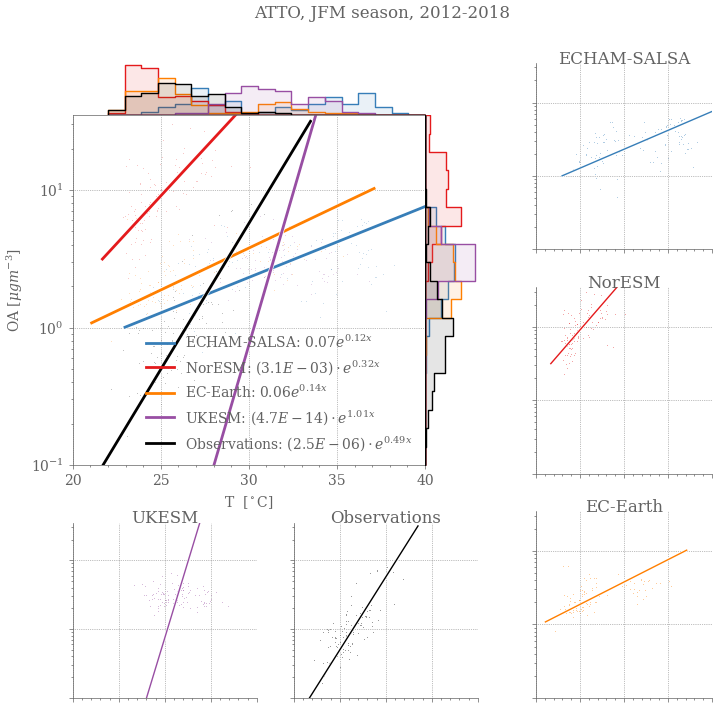

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [191]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='JFM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])

    ax_ex.set_ylim(ylims)
    ax_ex.set_xlim(xlims)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')

ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')

    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

ECHAM-SALSA
[0.01, 0.12]
Beta: [0.06596067 0.11857092]
Beta Std Error: [0.03414628 0.01566436]
Beta Covariance: [[ 0.00222593 -0.00101617]
 [-0.00101617  0.00046844]]
Residual Variance: 0.5238121537823794
Inverse Condition #: 0.0036362830841301487
Reason(s) for Halting:
  Sum of squares convergence
[0.06596067 0.11857092]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00311524 0.31897838]
Beta Std Error: [0.00285651 0.03564552]
Beta Covariance: [[ 1.91399220e-05 -2.38451898e-04]
 [-2.38451898e-04  2.98042318e-03]]
Residual Variance: 0.42631639101649244
Inverse Condition #: 0.028334408873233848
Reason(s) for Halting:
  Sum of squares convergence
[0.00311524 0.31897838]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.05617751 0.14028845]
Beta Std Error: [0.02834723 0.01820127]
Beta Covariance: [[ 0.00146871 -0.00093883]
 [-0.00093883  0.00060551]]
Residual Variance: 0.5471234135646461
Inverse Condition #: 0.00481235998259091
Reason(s) for Halting:
  Sum of squares convergence
[0.0561775

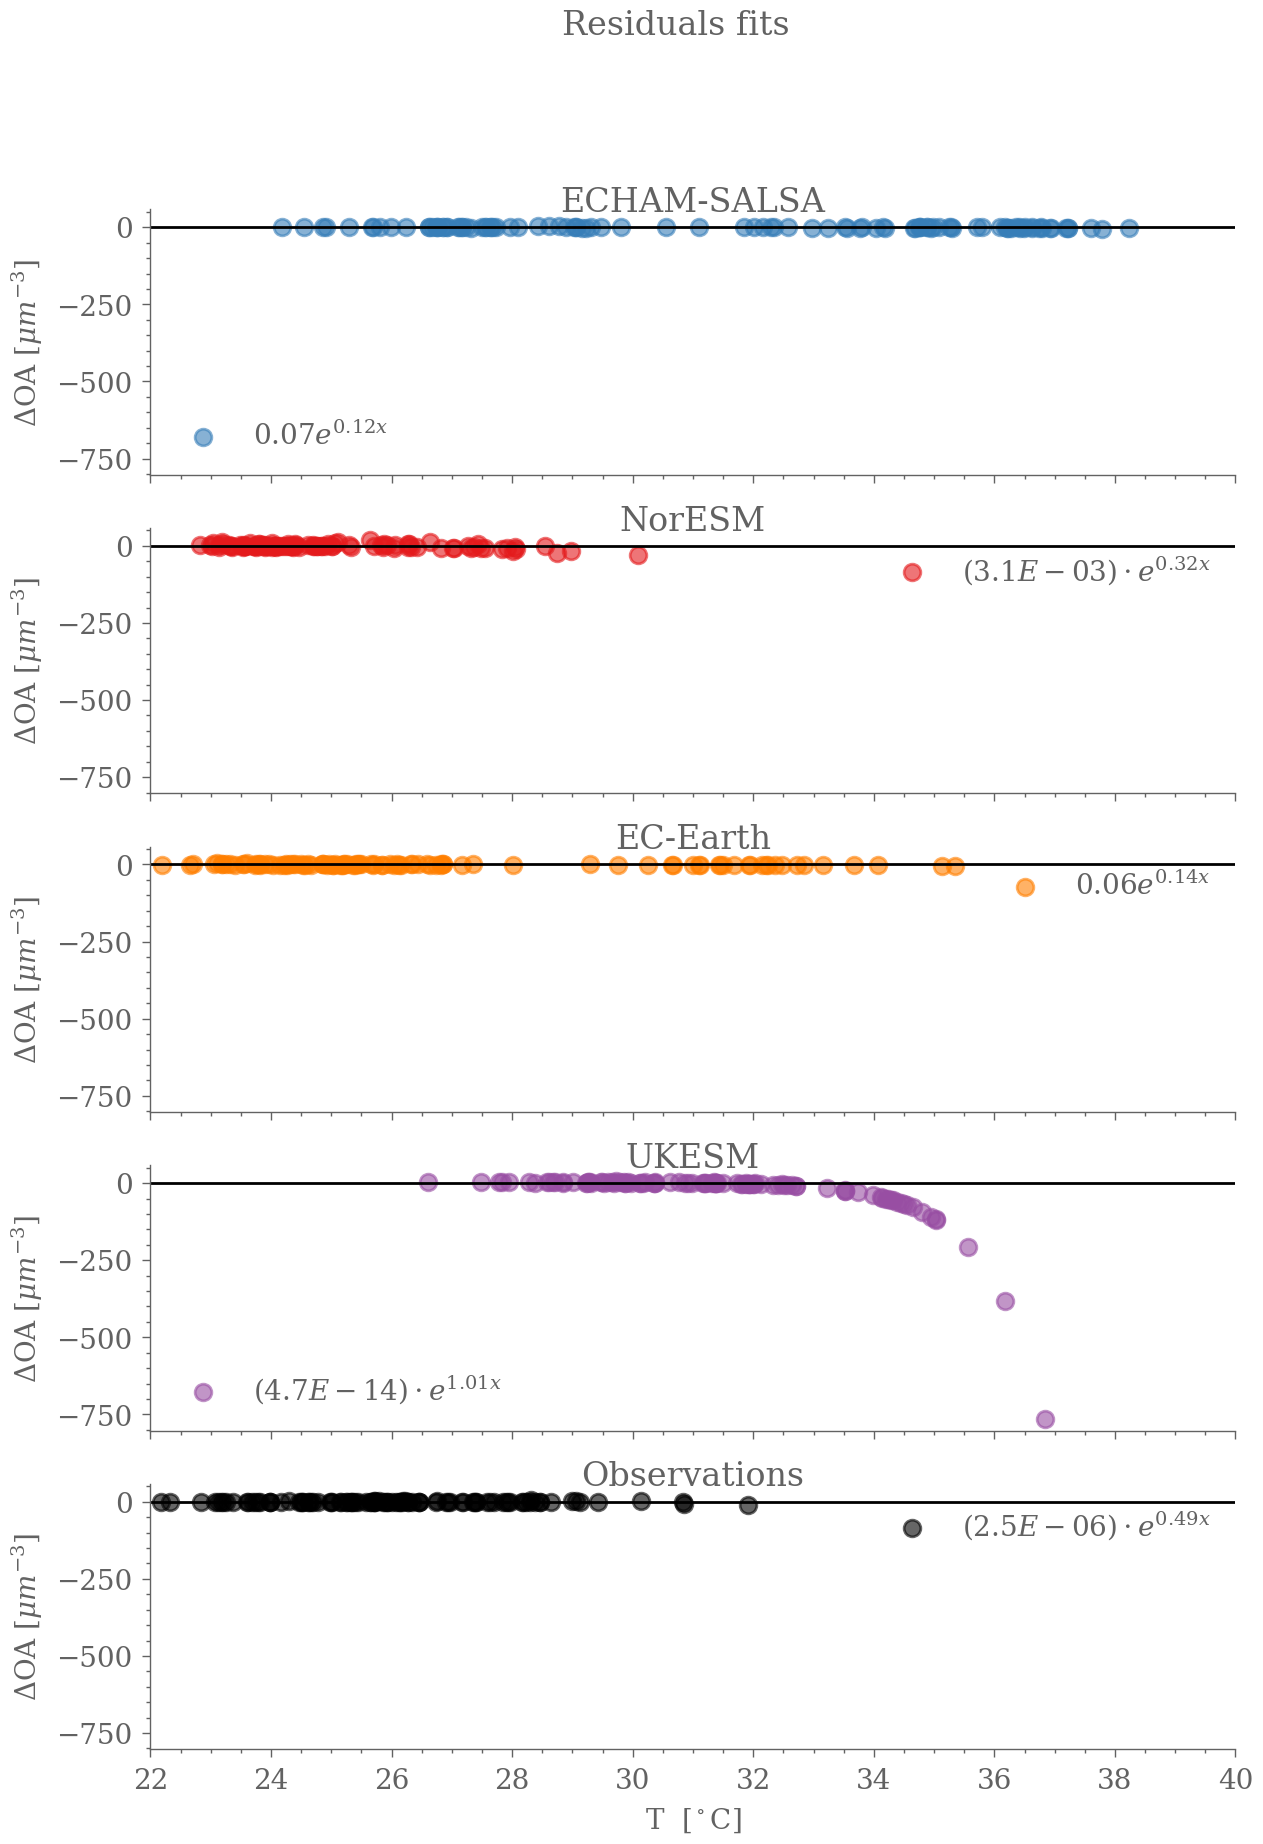

In [192]:
## Settings
alpha_scatt = 0.5

figsize=[7,10]
xlab = r'T  [$^\circ$C]'
ylab = r'$\Delta$OA [$\mu m^{-3}$]'


#ylims = [1,700]

# OBS: 
v_y = 'OA'
v_x = 'T_C'

season = 'JFM'
xscale='linear'
yscale='linear'

fig, axs = plt.subplots(len(models_and_obs), sharex=True, sharey= True, figsize=figsize)

## Settings
alpha_scatt = 0.6


for mo, ax in zip(models_and_obs, axs):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True, return_out_obj=True)
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    #popt, pov, label, func = get_least_square_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True)
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    ax.scatter(df_s[v_x],df_s[v_y]-func(df_s[v_x],*popt),
                                    color=cdic_model[mo], 
                #alpha=alpha_scatt, 
                #facecolor='none',
               alpha=alpha_scatt,
               
                edgecolor=cdic_model[mo],

                label=label
                   )
    _xlim = [_mi*.95, _ma*1.05]
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


    ax.hlines(0, xmin=xlims[0],xmax=xlims[1], color='k', linewidth=1)
    ax.legend(frameon=False)
    ax.set_ylabel(ylab)
    ax.set_title(mo, y=.93)
    ax.set_xlim(xlims)

        
#fig.suptitle('Observations')
axs[-1].set_xlabel(xlab)
fig.suptitle(r'Residuals fits')

sns.despine(fig)    
    
fn = make_fn_scat(f'residual_exp_{season}_{select_station}', v_x, v_y)
ax.legend(frameon=False)
#fig.savefig(fn, dpi=150)
#fig.savefig(fn.with_suffix('.pdf'), dpi=150)
print(fn)

### DJF

(0.0, 18.9)
(0.0, 24.15)
(0.0, 24.15)
(0.0, 24.15)
(0.0, 24.15)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.04709586 0.12972926]
Beta Std Error: [0.02157529 0.01341128]
Beta Covariance: [[ 0.00135629 -0.00083974]
 [-0.00083974  0.00052406]]
Residual Variance: 0.34321044937226136
Inverse Condition #: 0.00439921200018228
Reason(s) for Halting:
  Sum of squares convergence
[0.04709586 0.12972926]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.01695049 0.25394018]
Beta Std Error: [0.01961373 0.04362795]
Beta Covariance: [[ 0.00048378 -0.00107488]
 [-0.00107488  0.00239362]]
Residual Variance: 0.7951947166955425
Inverse Condition #: 0.007503282676061969
Reason(s) for Halting:
  Sum of squares convergence
[0.01695049 0.25394018]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.05608579 0.13987386]
Beta Std Error: [0.04672331 0.02808034]
Beta Covariance: [[ 0.00244744 -0.00146834]
 [-0.00146834  0.000884  ]]
Residual Variance: 0.8919790621623225
Inverse Condition #: 0.002819303278933984
Reason(s) for H

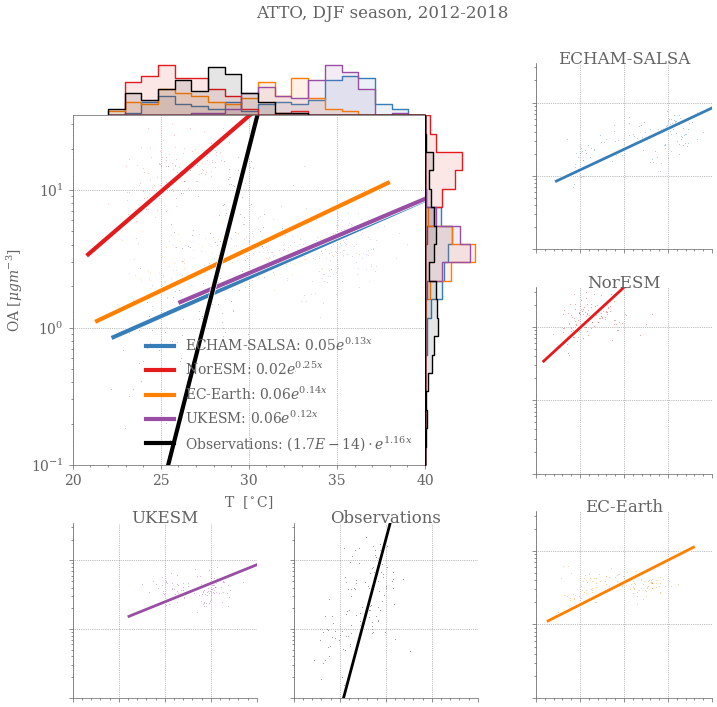

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [193]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'


linewidth=2
xlims = [22,40]
ylims = [.1,35]


season='DJF'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=linewidth+2,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=linewidth+1, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=linewidth+1,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
               linewidth=linewidth,
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')
ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### WET

(0.0, 40.95)
(0.0, 68.25)
(0.0, 70.35)
(0.0, 70.35)
(0.0, 70.35)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.05946954 0.12627439]
Beta Std Error: [0.02065665 0.01131759]
Beta Covariance: [[ 0.00080794 -0.00043985]
 [-0.00043985  0.00024253]]
Residual Variance: 0.5281290218808933
Inverse Condition #: 0.004939279880336479
Reason(s) for Halting:
  Sum of squares convergence
[0.05946954 0.12627439]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.0031158  0.31605642]
Beta Std Error: [0.00205702 0.02591665]
Beta Covariance: [[ 8.99075814e-06 -1.13096441e-04]
 [-1.13096441e-04  1.42716888e-03]]
Residual Variance: 0.4706330006725228
Inverse Condition #: 0.028042424639908282
Reason(s) for Halting:
  Sum of squares convergence
[0.0031158  0.31605642]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.068233   0.13779845]
Beta Std Error: [0.02259862 0.01258155]
Beta Covariance: [[ 0.00087557 -0.00048564]
 [-0.00048564  0.00027139]]
Residual Variance: 0.5832746004176196
Inverse Condition #: 0.00384594970822409

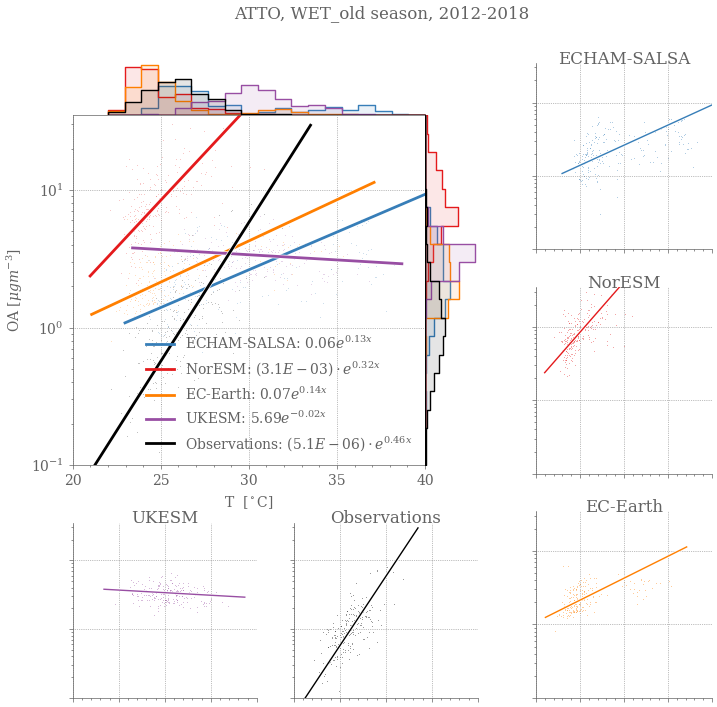

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [194]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='WET_old'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')
ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### WET_mid

(0.0, 40.95)
(0.0, 60.9)
(0.0, 69.3)
(0.0, 69.3)
(0.0, 69.3)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.01040751 0.18999986]
Beta Std Error: [0.00750166 0.02510239]
Beta Covariance: [[ 7.41406316e-05 -2.47320361e-04]
 [-2.47320361e-04  8.30177821e-04]]
Residual Variance: 0.7590298969184096
Inverse Condition #: 0.017492730744148373
Reason(s) for Halting:
  Sum of squares convergence
[0.01040751 0.18999986]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00606131 0.28652902]
Beta Std Error: [0.00424963 0.02791727]
Beta Covariance: [[ 3.29294888e-05 -2.16036929e-04]
 [-2.16036929e-04  1.42111374e-03]]
Residual Variance: 0.5484247602255313
Inverse Condition #: 0.018590346186008133
Reason(s) for Halting:
  Sum of squares convergence
[0.00606131 0.28652902]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [9.86542900e-05 4.04662145e-01]
Beta Std Error: [0.00010763 0.04377857]
Beta Covariance: [[ 1.93362297e-08 -7.86109382e-06]
 [-7.86109382e-06  3.19939031e-03]]
Residual Variance: 0.5990401333011447
Inve

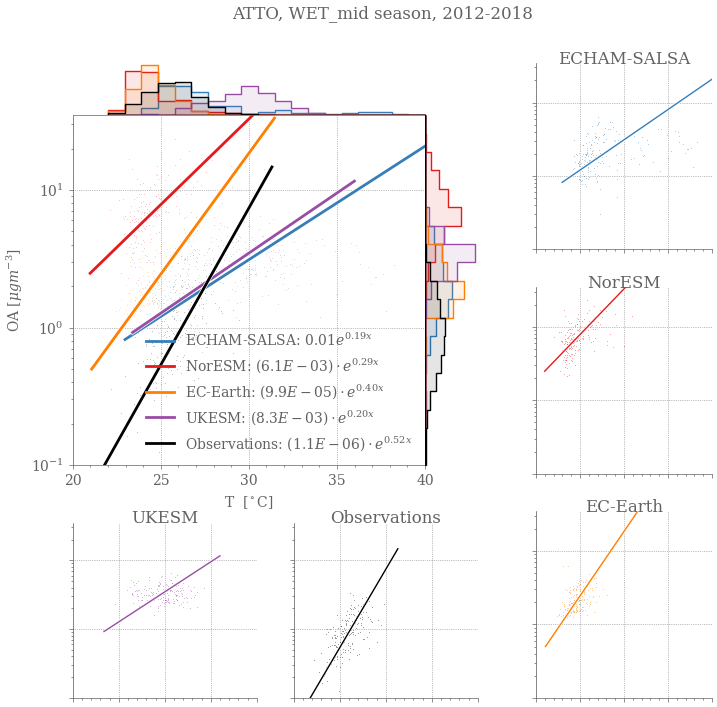

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [195]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='WET_mid'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')
ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### SON

(0.0, 32.55)
(0.0, 48.3)
(0.0, 48.3)
(0.0, 48.3)
(0.0, 48.3)
ECHAM-SALSA
[0.01, 0.12]
Beta: [3.53753777e-14 9.67038766e-01]
Beta Std Error: [6.40841366e-15 0.00000000e+00]
Beta Covariance: [[7.0588038e-29 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]]
Residual Variance: 0.5817949718243309
Inverse Condition #: 1.0
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of squares convergence
[3.53753777e-14 9.67038766e-01]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [3.87604715e-14 1.18868406e+00]
Beta Std Error: [7.64245065e-15 0.00000000e+00]
Beta Covariance: [[5.60971918e-29 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]
Residual Variance: 1.041176037412759
Inverse Condition #: 1.0
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of squares convergence
[3.87604715e-14 1.18868406e+00]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [6.34696338e-13 9.05033503e-01]
Beta Std Error: [1.52347268e-11 7.30838404e-01]
Beta Covariance: [[ 2.21701214e-22 -1.06351

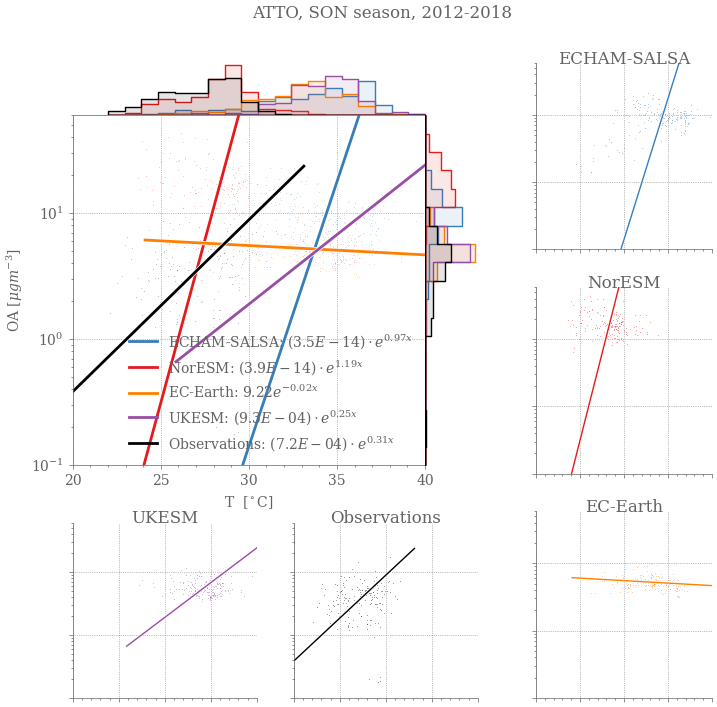

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [196]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,60]


season='SON'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='log',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')
ax.set_xticks(np.arange(20,41,5))
ax.grid(color='grey', linewidth=.5, linestyle=':')

for ax_ex in axs_extra.flatten():
    ax_ex.set_yticklabels([])
    ax_ex.set_xticks(np.arange(20,41,5))
    ax_ex.grid(color='grey', linewidth=.5, linestyle=':')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### MAM

(0.0, 40.95)
(0.0, 57.75)
(0.0, 69.3)
(0.0, 69.3)
(0.0, 69.3)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.00643714 0.20908635]
Beta Std Error: [0.00541936 0.0297953 ]
Beta Covariance: [[ 3.74107039e-05 -2.05113006e-04]
 [-2.05113006e-04  1.13082561e-03]]
Residual Variance: 0.7850546120792202
Inverse Condition #: 0.023903479223658437
Reason(s) for Halting:
  Sum of squares convergence
[0.00643714 0.20908635]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00681444 0.28135915]
Beta Std Error: [0.00506887 0.02974839]
Beta Covariance: [[ 4.39786414e-05 -2.57772666e-04]
 [-2.57772666e-04  1.51476889e-03]]
Residual Variance: 0.5842256723978799
Inverse Condition #: 0.016906153197329774
Reason(s) for Halting:
  Sum of squares convergence
[0.00681444 0.28135915]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.00047915 0.34057178]
Beta Std Error: [0.0004441  0.03743321]
Beta Covariance: [[ 3.32004136e-07 -2.79703338e-05]
 [-2.79703338e-05  2.35880448e-03]]
Residual Variance: 0.5940487905668631
Inverse Con

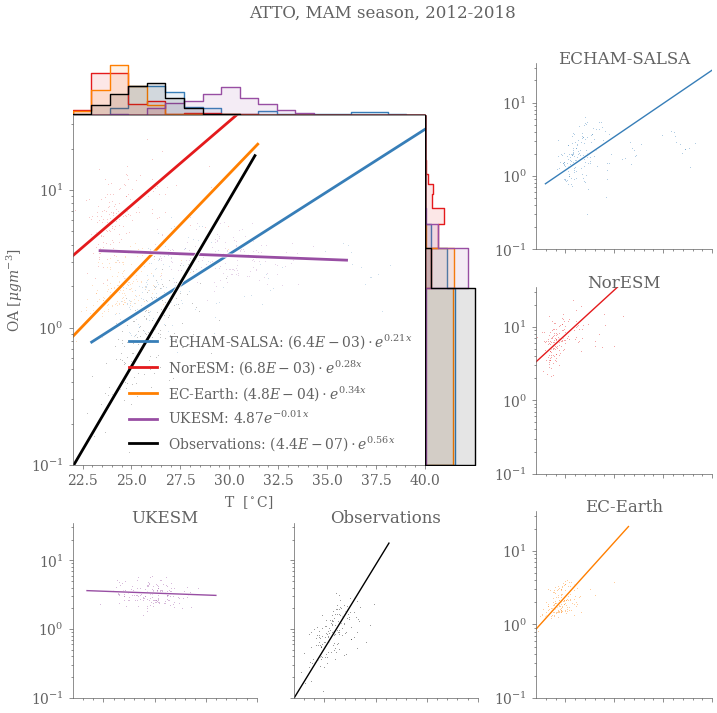

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [197]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='MAM'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### JJA

(0.0, 59.85)
(0.0, 59.85)
(0.0, 59.85)
(0.0, 59.85)
(0.0, 59.85)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.00542373 0.25298899]
Beta Std Error: [0.00301882 0.01966725]
Beta Covariance: [[ 2.03233844e-05 -1.32190882e-04]
 [-1.32190882e-04  8.62598796e-04]]
Residual Variance: 0.44841323639416913
Inverse Condition #: 0.02037819749992113
Reason(s) for Halting:
  Sum of squares convergence
[0.00542373 0.25298899]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.05246236 0.21392369]
Beta Std Error: [0.0381476  0.02760333]
Beta Covariance: [[ 0.00168505 -0.00121772]
 [-0.00121772  0.00088227]]
Residual Variance: 0.8636183056933668
Inverse Condition #: 0.0028910983316863255
Reason(s) for Halting:
  Sum of squares convergence
[0.05246236 0.21392369]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.25709455 0.10491469]
Beta Std Error: [0.0484133  0.00677528]
Beta Covariance: [[ 0.00682155 -0.00094968]
 [-0.00094968  0.0001336 ]]
Residual Variance: 0.3435945747029317
Inverse Condition #: 0.0011764174599822

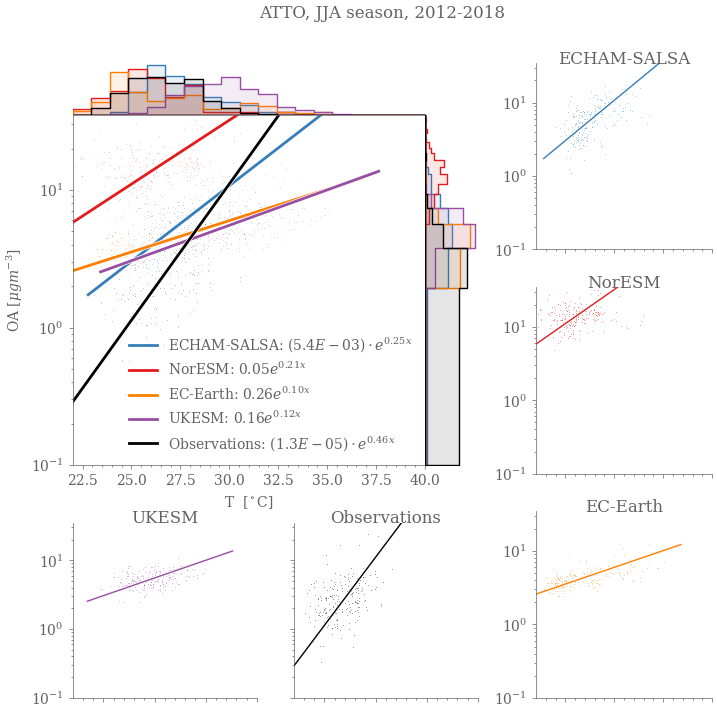

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [198]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='JJA'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### JF

(0.0, 10.5)
(0.0, 10.5)
(0.0, 10.5)
(0.0, 10.5)
(0.0, 11.55)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.00688816 0.18247038]
Beta Std Error: [0.00774955 0.03250169]
Beta Covariance: [[ 0.00013541 -0.00056702]
 [-0.00056702  0.00238187]]
Residual Variance: 0.4434997068694695
Inverse Condition #: 0.014832890340685946
Reason(s) for Halting:
  Sum of squares convergence
[0.00688816 0.18247038]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.01179667 0.27230151]
Beta Std Error: [0.01543488 0.04999108]
Beta Covariance: [[ 0.00044966 -0.00145447]
 [-0.00145447  0.00471702]]
Residual Variance: 0.5298070894540242
Inverse Condition #: 0.011020662545942328
Reason(s) for Halting:
  Sum of squares convergence
[0.01179667 0.27230151]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.0008133 0.2866338]
Beta Std Error: [0.00370906 0.15734599]
Beta Covariance: [[ 1.32563170e-05 -5.62052610e-04]
 [-5.62052610e-04  2.38564842e-02]]
Residual Variance: 1.0377791361451472
Inverse Condition #: 0.007346879912656952
Reas

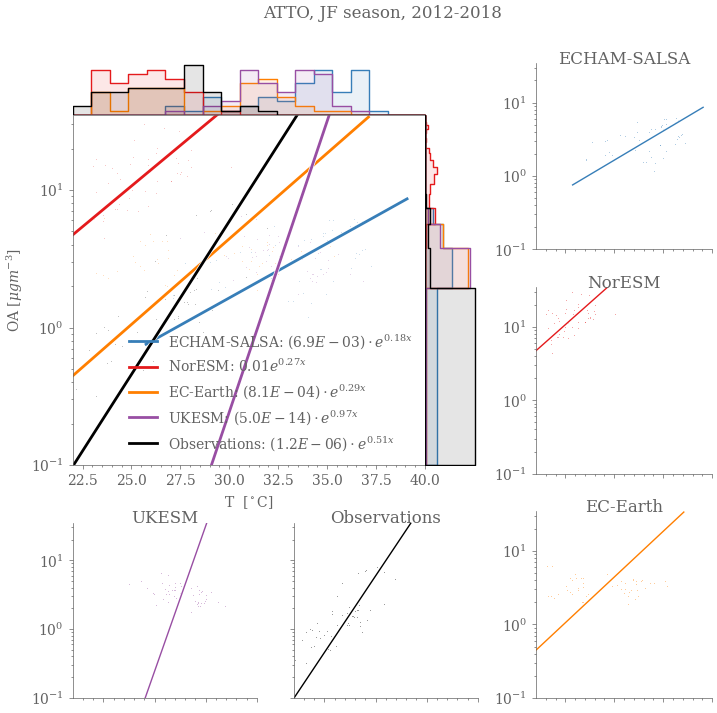

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [199]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,35]


season='JF'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### WET_mid

(0.0, 33.6)
(0.0, 57.75)
(0.0, 57.75)
(0.0, 57.75)
(0.0, 57.75)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.01040751 0.18999986]
Beta Std Error: [0.00750166 0.02510239]
Beta Covariance: [[ 7.41406316e-05 -2.47320361e-04]
 [-2.47320361e-04  8.30177821e-04]]
Residual Variance: 0.7590298969184096
Inverse Condition #: 0.017492730744148373
Reason(s) for Halting:
  Sum of squares convergence
[0.01040751 0.18999986]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00606131 0.28652902]
Beta Std Error: [0.00424963 0.02791727]
Beta Covariance: [[ 3.29294888e-05 -2.16036929e-04]
 [-2.16036929e-04  1.42111374e-03]]
Residual Variance: 0.5484247602255313
Inverse Condition #: 0.018590346186008133
Reason(s) for Halting:
  Sum of squares convergence
[0.00606131 0.28652902]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [9.86542900e-05 4.04662145e-01]
Beta Std Error: [0.00010763 0.04377857]
Beta Covariance: [[ 1.93362297e-08 -7.86109382e-06]
 [-7.86109382e-06  3.19939031e-03]]
Residual Variance: 0.5990401333011447
I

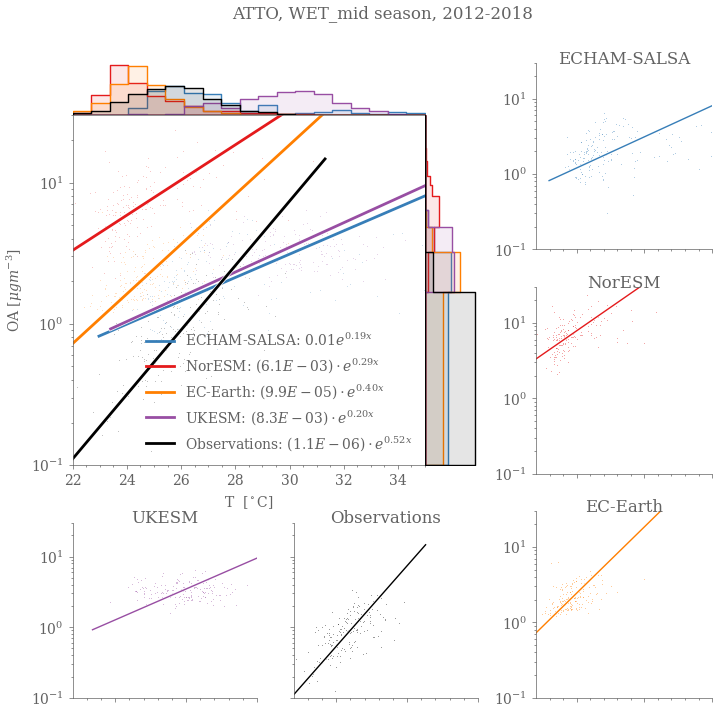

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [200]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,35]
ylims = [.1,30]


season='WET_mid'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### WET

(0.0, 105.0)
(0.0, 105.0)
(0.0, 126.0)
(0.0, 126.0)
(0.0, 126.0)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.00381241 0.23415866]
Beta Std Error: [0.00276338 0.02470243]
Beta Covariance: [[ 9.12336789e-06 -8.13590642e-05]
 [-8.13590642e-05  7.29045311e-04]]
Residual Variance: 0.8369988461045971
Inverse Condition #: 0.03051887037153605
Reason(s) for Halting:
  Sum of squares convergence
[0.00381241 0.23415866]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00731311 0.28621702]
Beta Std Error: [0.0043574  0.02311825]
Beta Covariance: [[ 2.71649920e-05 -1.43941361e-04]
 [-1.43941361e-04  7.64652099e-04]]
Residual Variance: 0.6989496235428575
Inverse Condition #: 0.015676042792583667
Reason(s) for Halting:
  Sum of squares convergence
[0.00731311 0.28621702]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.10769344 0.1269639 ]
Beta Std Error: [0.0278797  0.00959882]
Beta Covariance: [[ 0.00112713 -0.00038668]
 [-0.00038668  0.00013361]]
Residual Variance: 0.689605697828441
Inverse Condition #: 0.002

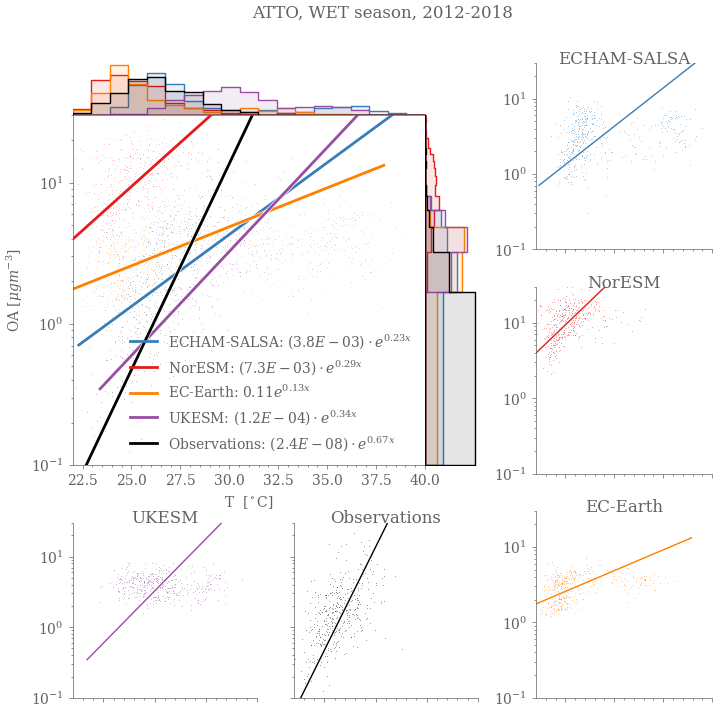

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [201]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,30]


season='WET'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',#xscale='log'
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### WET_early

(0.0, 22.05)
(0.0, 42.0)
(0.0, 42.0)
(0.0, 42.0)
(0.0, 42.0)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.07219369 0.1173781 ]
Beta Std Error: [0.02548807 0.01057589]
Beta Covariance: [[ 0.00159102 -0.00065655]
 [-0.00065655  0.00027393]]
Residual Variance: 0.40831820665392127
Inverse Condition #: 0.0035058005374308788
Reason(s) for Halting:
  Sum of squares convergence
[0.07219369 0.1173781 ]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00923076 0.27503408]
Beta Std Error: [0.00767465 0.03168983]
Beta Covariance: [[ 9.71558413e-05 -4.00542235e-04]
 [-4.00542235e-04  1.65649880e-03]]
Residual Variance: 0.6062456078650312
Inverse Condition #: 0.014541105398987833
Reason(s) for Halting:
  Sum of squares convergence
[0.00923076 0.27503408]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.09325303 0.12204341]
Beta Std Error: [0.0337462  0.01250665]
Beta Covariance: [[ 0.00214598 -0.00079183]
 [-0.00079183  0.00029475]]
Residual Variance: 0.5306705492280758
Inverse Condition #: 0.00281210051992905
R

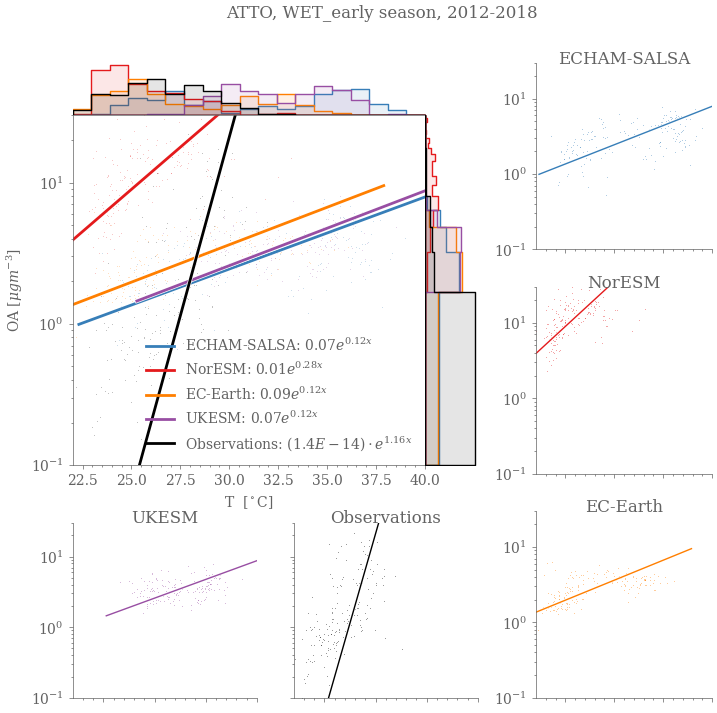

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [202]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,30]


season='WET_early'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### WET_late

(0.0, 92.4)
(0.0, 92.4)
(0.0, 106.05)
(0.0, 106.05)
(0.0, 106.05)
ECHAM-SALSA
[0.01, 0.12]
Beta: [1.57448003e-09 8.03824401e-01]
Beta Std Error: [5.16671561e-09 1.22114680e-01]
Beta Covariance: [[ 3.16998315e-17 -7.49008308e-10]
 [-7.49008308e-10  1.77077585e-02]]
Residual Variance: 0.842116469988212
Inverse Condition #: 1.211333498252668e-08
Reason(s) for Halting:
  Sum of squares convergence
[1.57448003e-09 8.03824401e-01]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [0.00074498 0.3780395 ]
Beta Std Error: [0.00089544 0.04735131]
Beta Covariance: [[ 9.96930898e-07 -5.26788287e-05]
 [-5.26788287e-05  2.78773809e-03]]
Residual Variance: 0.8042887557900447
Inverse Condition #: 0.007175483257572113
Reason(s) for Halting:
  Sum of squares convergence
[0.00074498 0.3780395 ]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.03632414 0.17746593]
Beta Std Error: [0.0134031  0.01441557]
Beta Covariance: [[ 0.00032296 -0.00034673]
 [-0.00034673  0.0003736 ]]
Residual Variance: 0.5562327712970202

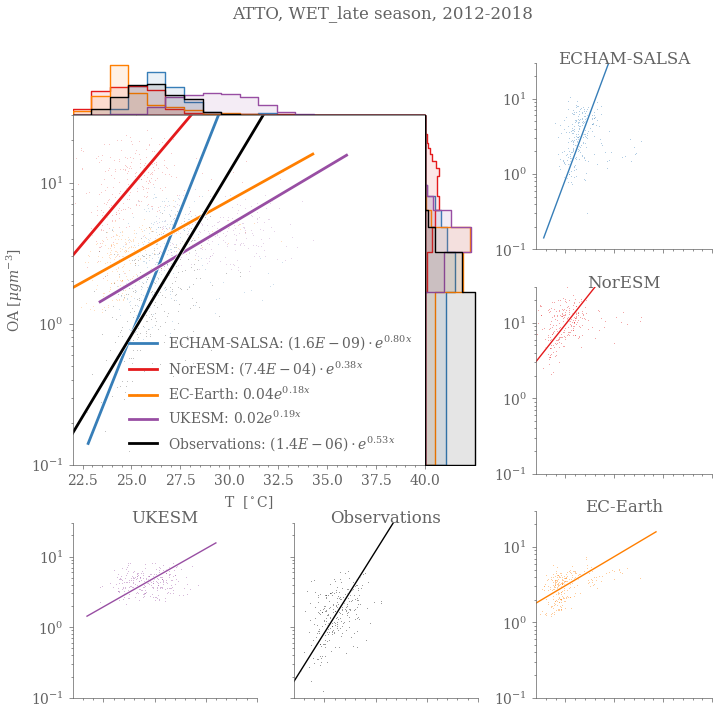

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [203]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,30]


season='WET_late'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

### DRY

(0.0, 32.55)
(0.0, 67.2)
(0.0, 67.2)
(0.0, 67.2)
(0.0, 67.2)
ECHAM-SALSA
[0.01, 0.12]
Beta: [0.00982944 0.20917382]
Beta Std Error: [0.00933863 0.02882947]
Beta Covariance: [[ 0.00010914 -0.00033652]
 [-0.00033652  0.00104011]]
Residual Variance: 0.7990891319455381
Inverse Condition #: 0.01004398032371904
Reason(s) for Halting:
  Sum of squares convergence
[0.00982944 0.20917382]
reason for haltng
NorESM
[0.01, 0.12]
Beta: [4.03578916e-14 1.20203809e+00]
Beta Std Error: [6.69973866e-15 0.00000000e+00]
Beta Covariance: [[4.35317047e-29 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]
Residual Variance: 1.0311219937538094
Inverse Condition #: 1.0
Reason(s) for Halting:
  Problem is not full rank at solution
  Sum of squares convergence
[4.03578916e-14 1.20203809e+00]
reason for haltng
EC-Earth
[0.01, 0.12]
Beta: [0.02192868 0.17052479]
Beta Std Error: [0.01910862 0.02694311]
Beta Covariance: [[ 0.00035999 -0.00050714]
 [-0.00050714  0.00071569]]
Residual Variance: 1.0143033319031227
Inv

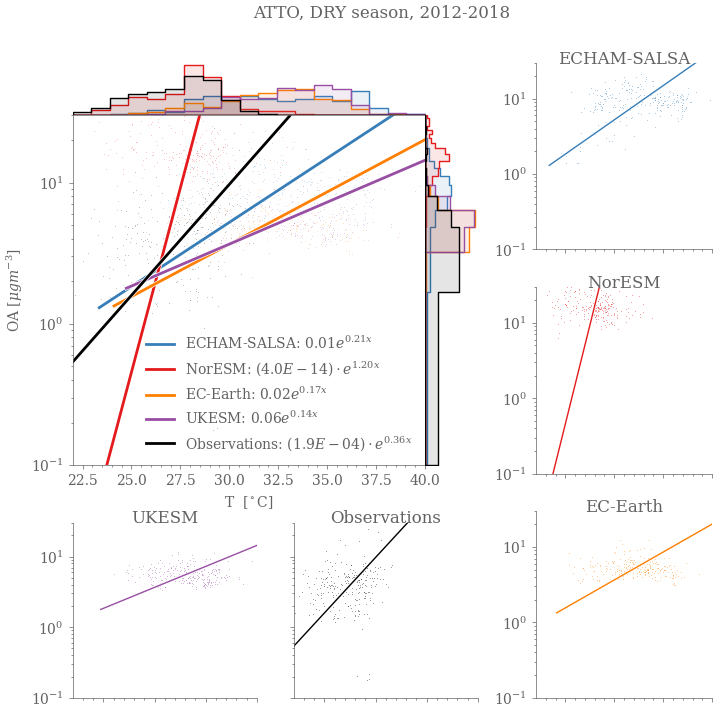

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [204]:
fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6

xlab = r'T  [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'



xlims = [22,40]
ylims = [.1,30]


season='DRY'
v_x = 'T_C'
v_y = 'OA'


make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale='linear',
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func = 'exp', return_func=True, beta0=[0.01,.12])
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )
    ax_ex.set_yscale('log')
ax.set_yscale('log')


    
fn = make_fn_scat(f'exp1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



plt.show()

In [205]:
from bs_fdbck.util.BSOA_datamanip.fits import *

In [206]:
import scipy

## OA to number

### Nx new version: Nx

In [207]:
def make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=None, ylab=None, alpha_scat=.4,
             source_list = models_and_obs, fig=None, 
               axs=None,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
               divide_NorESM_by_factor = None,
             ):
    if xlab is None: 
        if xlab in label_dic:
            xlab = label_dic[v_x]
    if ylab is None: 
        if ylab in label_dic:
            ylab = label_dic[v_y]

    for mo, ax in zip(source_list, axs[:]):
        df_s =  dic_df_med[mo]
        mask_months = select_months(df_s, season=season)
        df_s = df_s[mask_months].copy()
        if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
            df_s = df_s/divide_NorESM_by_factor
            title = f'{mo}/{divide_NorESM_by_factor}'
            ax.spines['bottom'].set_color('r')
            ax.spines['top'].set_color('r') 
            ax.spines['right'].set_color('red')
            ax.spines['left'].set_color('red')
            ax.set_title(title, y=.95, c='r')

        else:
            title = mo
            ax.set_title(title, y=.95)
            
        sns.scatterplot(x=v_x,y=v_y, 
                    data = df_s, 
                    color=cdic_model[mo], 
                    alpha=alpha_scatt+.1, 
                    label='__nolegend__',
                    ax = ax,
                    #facecolor='none',
                    edgecolor=cdic_model[mo],
                        marker='.',
                    
                    
                   )
        
        
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    fig.suptitle(f'{select_station}, {season} season, 2012-2018', y=.95)
    xlim_dist = list(daxs['y'].get_xlim())
    for mo,ax in zip(source_list, axs):

        df_s =  dic_df_med[mo]

        mask_months = select_months(df_s, season=season)
        df_s = df_s[mask_months].copy()
        if xscale=='log':
            xbins = np.logspace(np.log10(xlims[0]),np.log10(xlims[1]),20)
        else:
            xbins = np.linspace(xlims[0],xlims[1],20)
            
        if yscale=='log':
            ybins = np.logspace(np.log10(ylims[0]),np.log10(ylims[1]),20)
        else:
            ybins = np.linspace(ylims[0],ylims[1],20)
            

        ax.set_ylim(ylims)
        ax.set_xlim(xlims)

        sns.despine(ax = ax)

    return

#### WET_mid

In [208]:
models_and_obs[::-1]

['Observations', 'UKESM', 'EC-Earth', 'NorESM', 'ECHAM-SALSA']

Observations
[330.26562089  92.02753396]
Beta: [346.03047035  70.68284919]
Beta Std Error: [10.56637108 21.42156665]
Beta Covariance: [[ 2402.51484749 -3252.86250128]
 [-3252.86250128  9874.53882207]]
Residual Variance: 0.04647138726586673
Inverse Condition #: 0.32745252794264146
Reason(s) for Halting:
  Sum of squares convergence
[346.03047035  70.68284919]
reason for haltng
UKESM
[ 100.94438355 1060.64181573]
Beta: [185.96361077 794.59818377]
Beta Std Error: [20.24699879 65.40012042]
Beta Covariance: [[  879.03908821 -2750.70430753]
 [-2750.70430753  9171.57600229]]
Residual Variance: 0.4663512301612125
Inverse Condition #: 0.06197819080566829
Reason(s) for Halting:
  Sum of squares convergence
[185.96361077 794.59818377]
reason for haltng
EC-Earth
[ 53.77066771 223.30121119]
Beta: [ 70.39013131 180.63216586]
Beta Std Error: [ 5.15077179 14.19274621]
Beta Covariance: [[ 110.15750244 -282.81994718]
 [-282.81994718  836.37749262]]
Residual Variance: 0.24084106356639412
Inverse Conditio

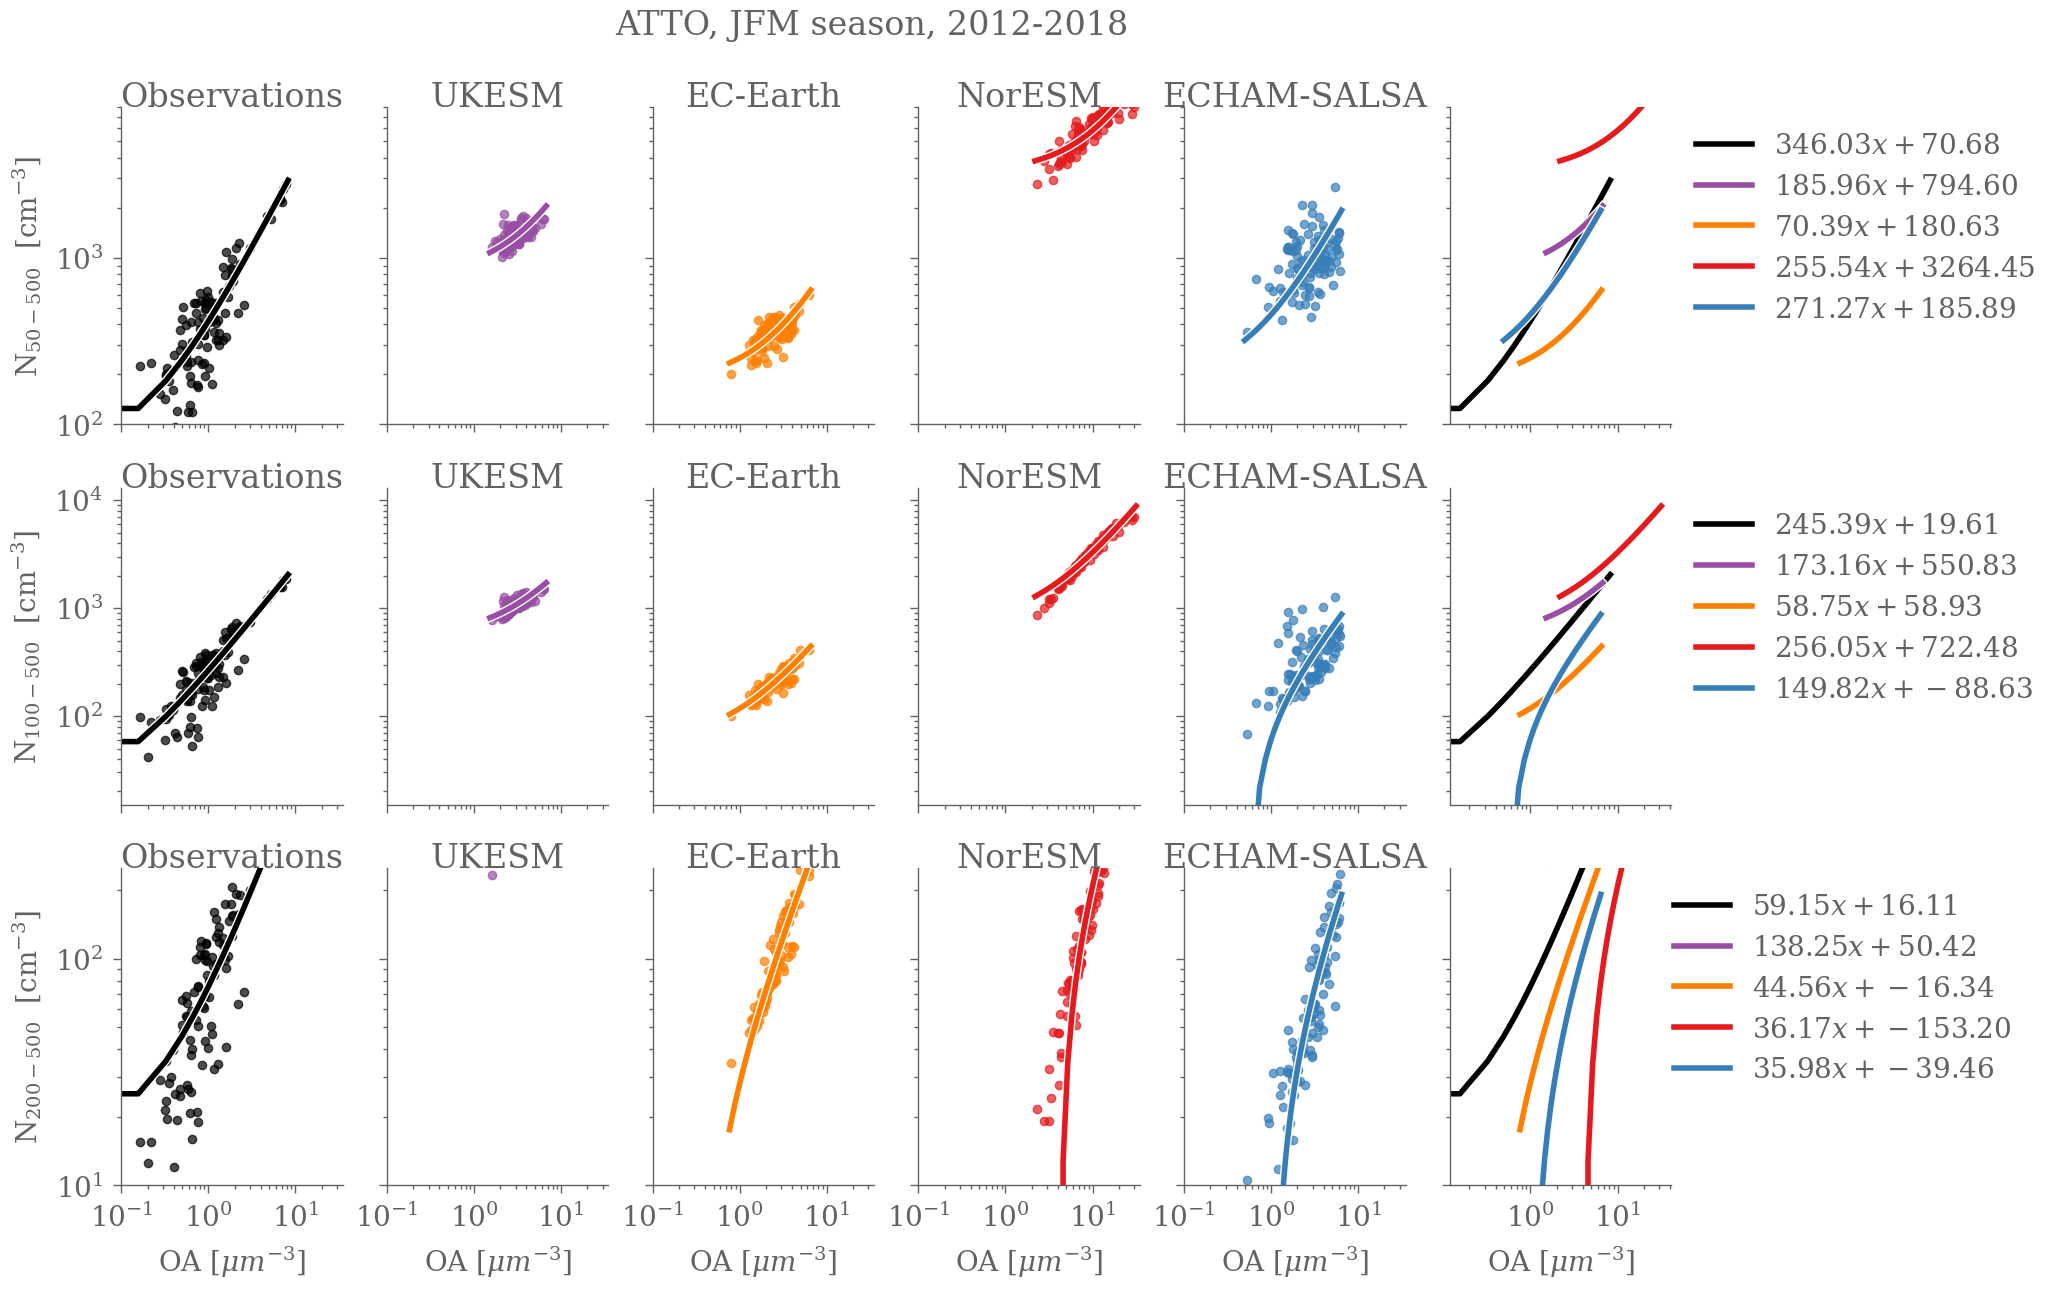

In [209]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]

xlab = r'OA [$\mu m^{-3}$]'

season = 'JFM'
source_list = models_and_obs[::-1]

xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_y = 'N50-500'
v_x = 'OA'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='log'
yscale='log'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, 
           fig=fig, 
           axs=axs_sub,
           xscale='linear', yscale='linear',
           dic_df_med = dic_df_med,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

xlims = [.1,35]

ylims = [15,13000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'


xscale='log'
yscale='log'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    

    
    
    

    
#xlims = [.01,10]

ylims = [10,250]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='log'
yscale='log'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 

    
    
fn = make_fn_scat(f'together_{season}', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

In [210]:
def plot_fit(func, popt, mo, xlims, yscale, xscale, ax, label):

    x = np.linspace(*xlims)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')

    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{label}')
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)



## Comparing seasons: 

## JFMAM

Observations
[316.59256974  87.40125386]
Beta: [341.39329344  57.08872935]
Beta Std Error: [ 9.19154796 15.54875887]
Beta Covariance: [[ 1151.8330876  -1407.82027192]
 [-1407.82027192  3296.12514369]]
Residual Variance: 0.07334791368322982
Inverse Condition #: 0.340460981503841
Reason(s) for Halting:
  Sum of squares convergence
[341.39329344  57.08872935]
reason for haltng
parameter: 341.3932934380719
   conf interval: 323.27224495010125 359.51434192604256
   tstat: 37.1420891184767
   pstat: 0.0

parameter: 57.0887293487325
   conf interval: 26.434500622805654 87.74295807465934
   tstat: 3.6715939716218453
   pstat: 0.00030678940201145366

UKESM
[208.43637485 887.55984814]
Beta: [481.44012504 -29.98801328]
Beta Std Error: [ 42.10198945 144.99227725]
Beta Covariance: [[  3095.80373025 -10404.77355301]
 [-10404.77355301  36716.21673932]]
Residual Variance: 0.5725742554463124
Inverse Condition #: 0.051656153810202894
Reason(s) for Halting:
  Sum of squares convergence
[481.44012504 -29.

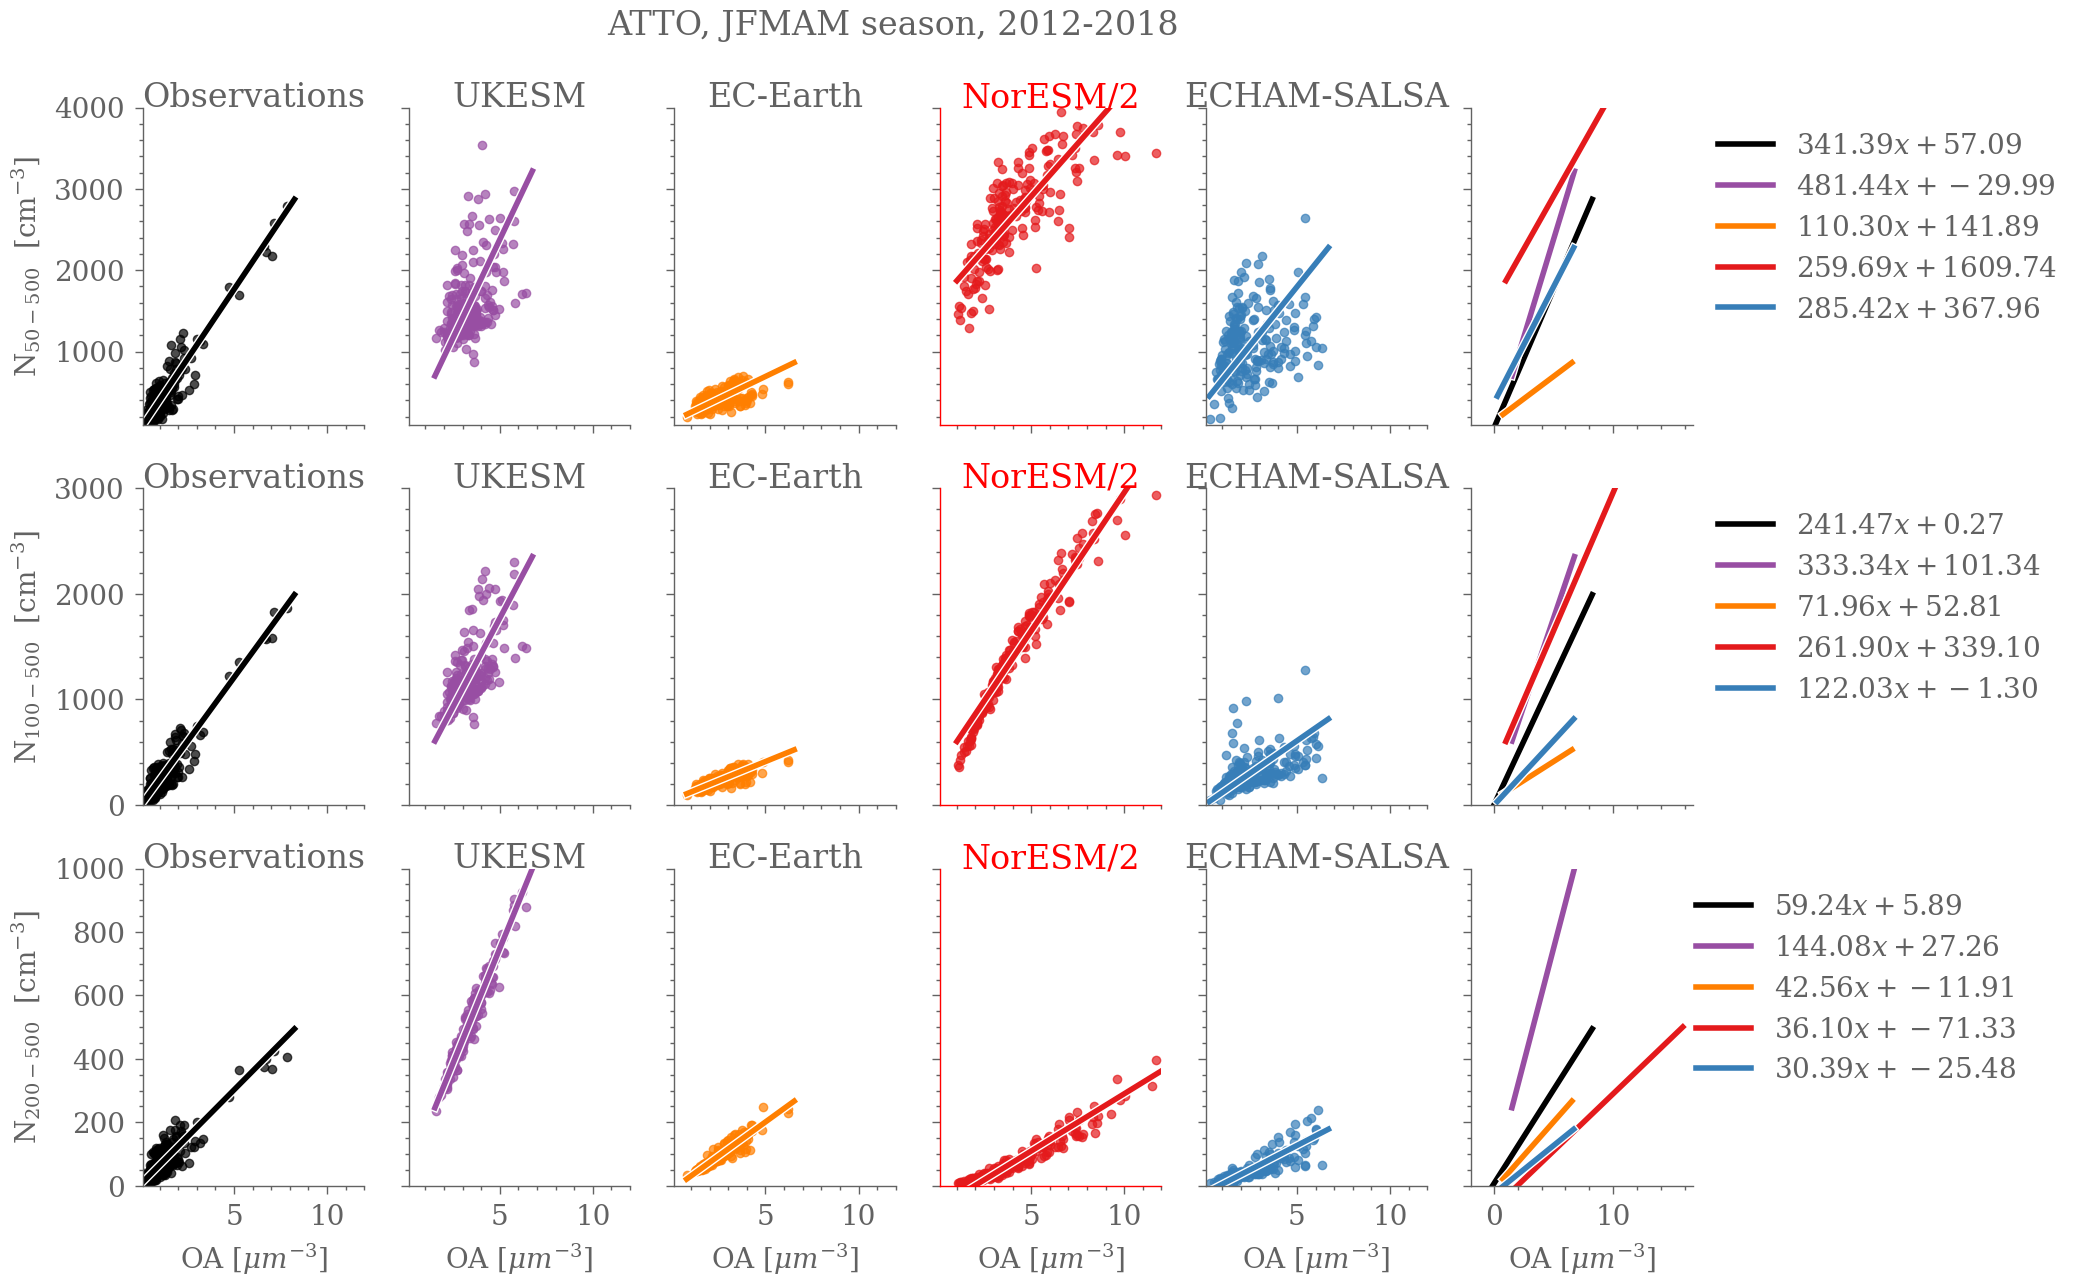

In [211]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]
divide_NorESM_by_factor = 2
xlab = r'OA [$\mu m^{-3}$]'

season = 'JFMAM'
source_list = models_and_obs[::-1]

xlims = [.1,12]

ylims = [100,4000]

# OBS: 
v_x = 'OA'

v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='linear'
yscale='linear'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func='linear',  #beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                       return_func=True, return_out_obj=True)
    
    
    compute_p_value(df_s, out, popt)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

ylims = [0,3000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'

xscale='linear'
yscale='linear'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                  fit_func='linear', return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    
#xlims = [.01,10]

ylims = [0,1000]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='linear'
yscale='linear'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', 
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}_linscale', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

## FMAM

Observations
[239.52467999 133.69401621]
Beta: [308.74909102  66.18086006]
Beta Std Error: [16.73066  19.314482]
Beta Covariance: [[ 1234.0496936  -1203.54343959]
 [-1203.54343959  1644.64675176]]
Residual Variance: 0.2268263469771288
Inverse Condition #: 0.264862696339307
Reason(s) for Halting:
  Sum of squares convergence
[308.74909102  66.18086006]
reason for haltng
parameter: 308.74909101648336
   conf interval: 275.7238731708368 341.77430886212994
   tstat: 18.454089141903722
   pstat: 0.0

parameter: 66.18086006252511
   conf interval: 28.05534824499793 104.3063718800523
   tstat: 3.4264889980775144
   pstat: 0.0007657998888248585

UKESM
[228.95512751 844.25127524]
Beta: [ 508.402014   -107.35609009]
Beta Std Error: [ 47.87190909 167.08768372]
Beta Covariance: [[  4120.75132354 -14032.4957184 ]
 [-14032.4957184   50200.00839768]]
Residual Variance: 0.5561412227146502
Inverse Condition #: 0.051398390797289445
Reason(s) for Halting:
  Sum of squares convergence
[ 508.402014   -107.

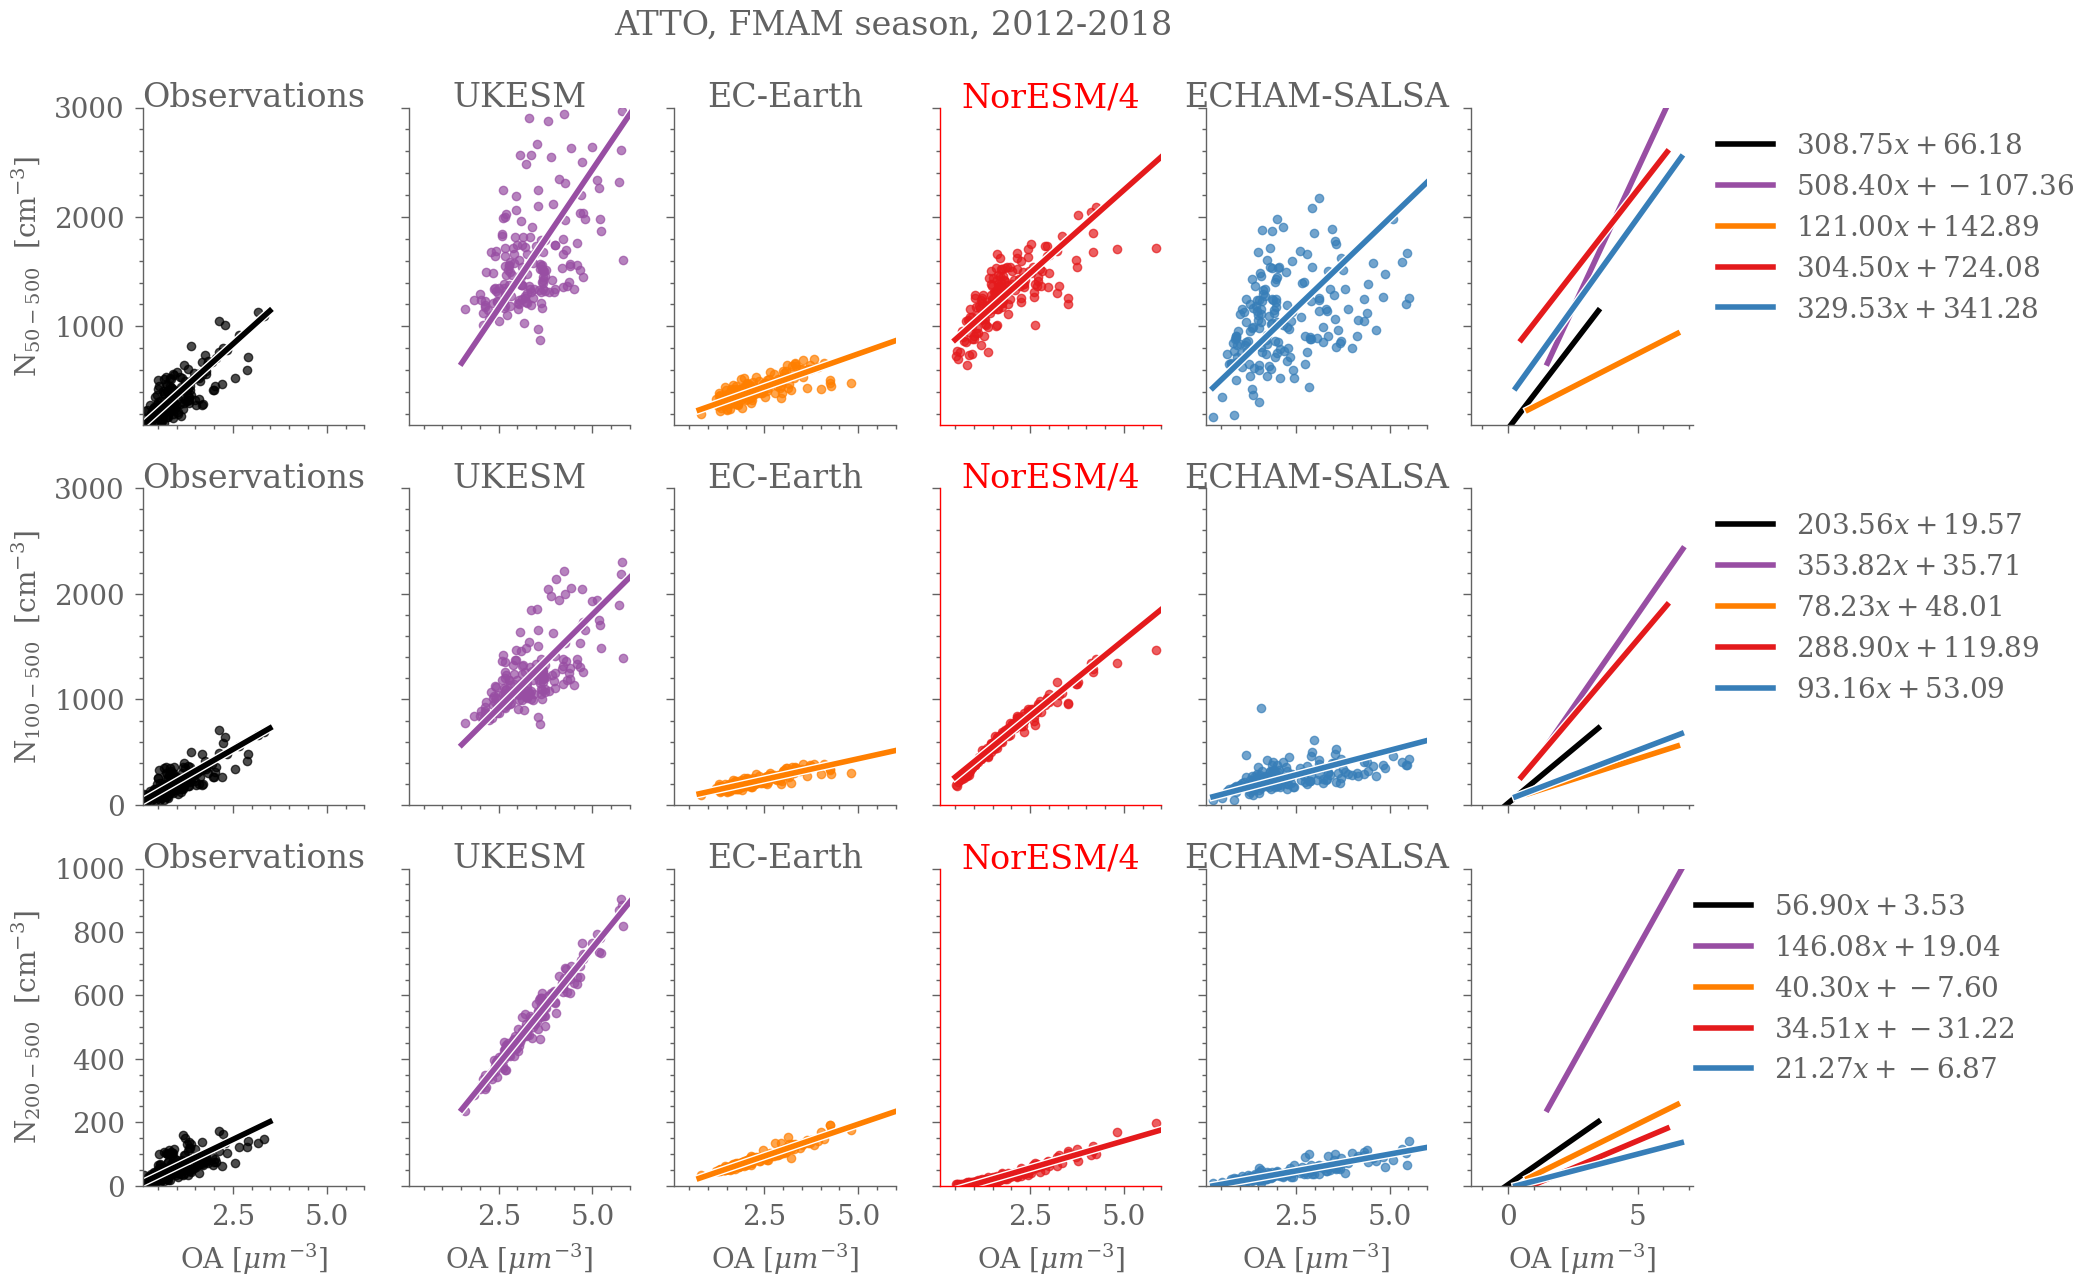

In [212]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]
divide_NorESM_by_factor = 4
xlab = r'OA [$\mu m^{-3}$]'

season = 'FMAM'
source_list = models_and_obs[::-1]

xlims = [.1,6]

ylims = [100,3000]

# OBS: 
v_x = 'OA'

v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='linear'
yscale='linear'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func='linear',  #beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                       return_func=True, return_out_obj=True)
    
    
    compute_p_value(df_s, out, popt)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

ylims = [0,3000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'

xscale='linear'
yscale='linear'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                  fit_func='linear', return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    
#xlims = [.01,10]

ylims = [0,1000]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='linear'
yscale='linear'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', 
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}_linscale', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

## MAM

Observations
[243.27291414 127.09355174]
Beta: [308.72831335  62.49692673]
Beta Std Error: [16.91564672 19.89034104]
Beta Covariance: [[ 1332.69564198 -1315.2106056 ]
 [-1315.2106056   1842.63036643]]
Residual Variance: 0.214707015465397
Inverse Condition #: 0.2715208720350187
Reason(s) for Halting:
  Sum of squares convergence
[308.72831335  62.49692673]
reason for haltng
parameter: 308.72831335338014
   conf interval: 275.3167112740276 342.13991543273266
   tstat: 18.251049962221465
   pstat: 0.0

parameter: 62.49692672684093
   conf interval: 23.209740660147254 101.7841127935346
   tstat: 3.1420741660247367
   pstat: 0.0020056479293073526

UKESM
[275.31799797 718.85386901]
Beta: [ 550.84532008 -203.28278212]
Beta Std Error: [ 50.77942011 174.06334497]
Beta Covariance: [[  5089.78293915 -17034.5231856 ]
 [-17034.5231856   59805.12986649]]
Residual Variance: 0.506612862998507
Inverse Condition #: 0.051360449183516885
Reason(s) for Halting:
  Sum of squares convergence
[ 550.84532008 -

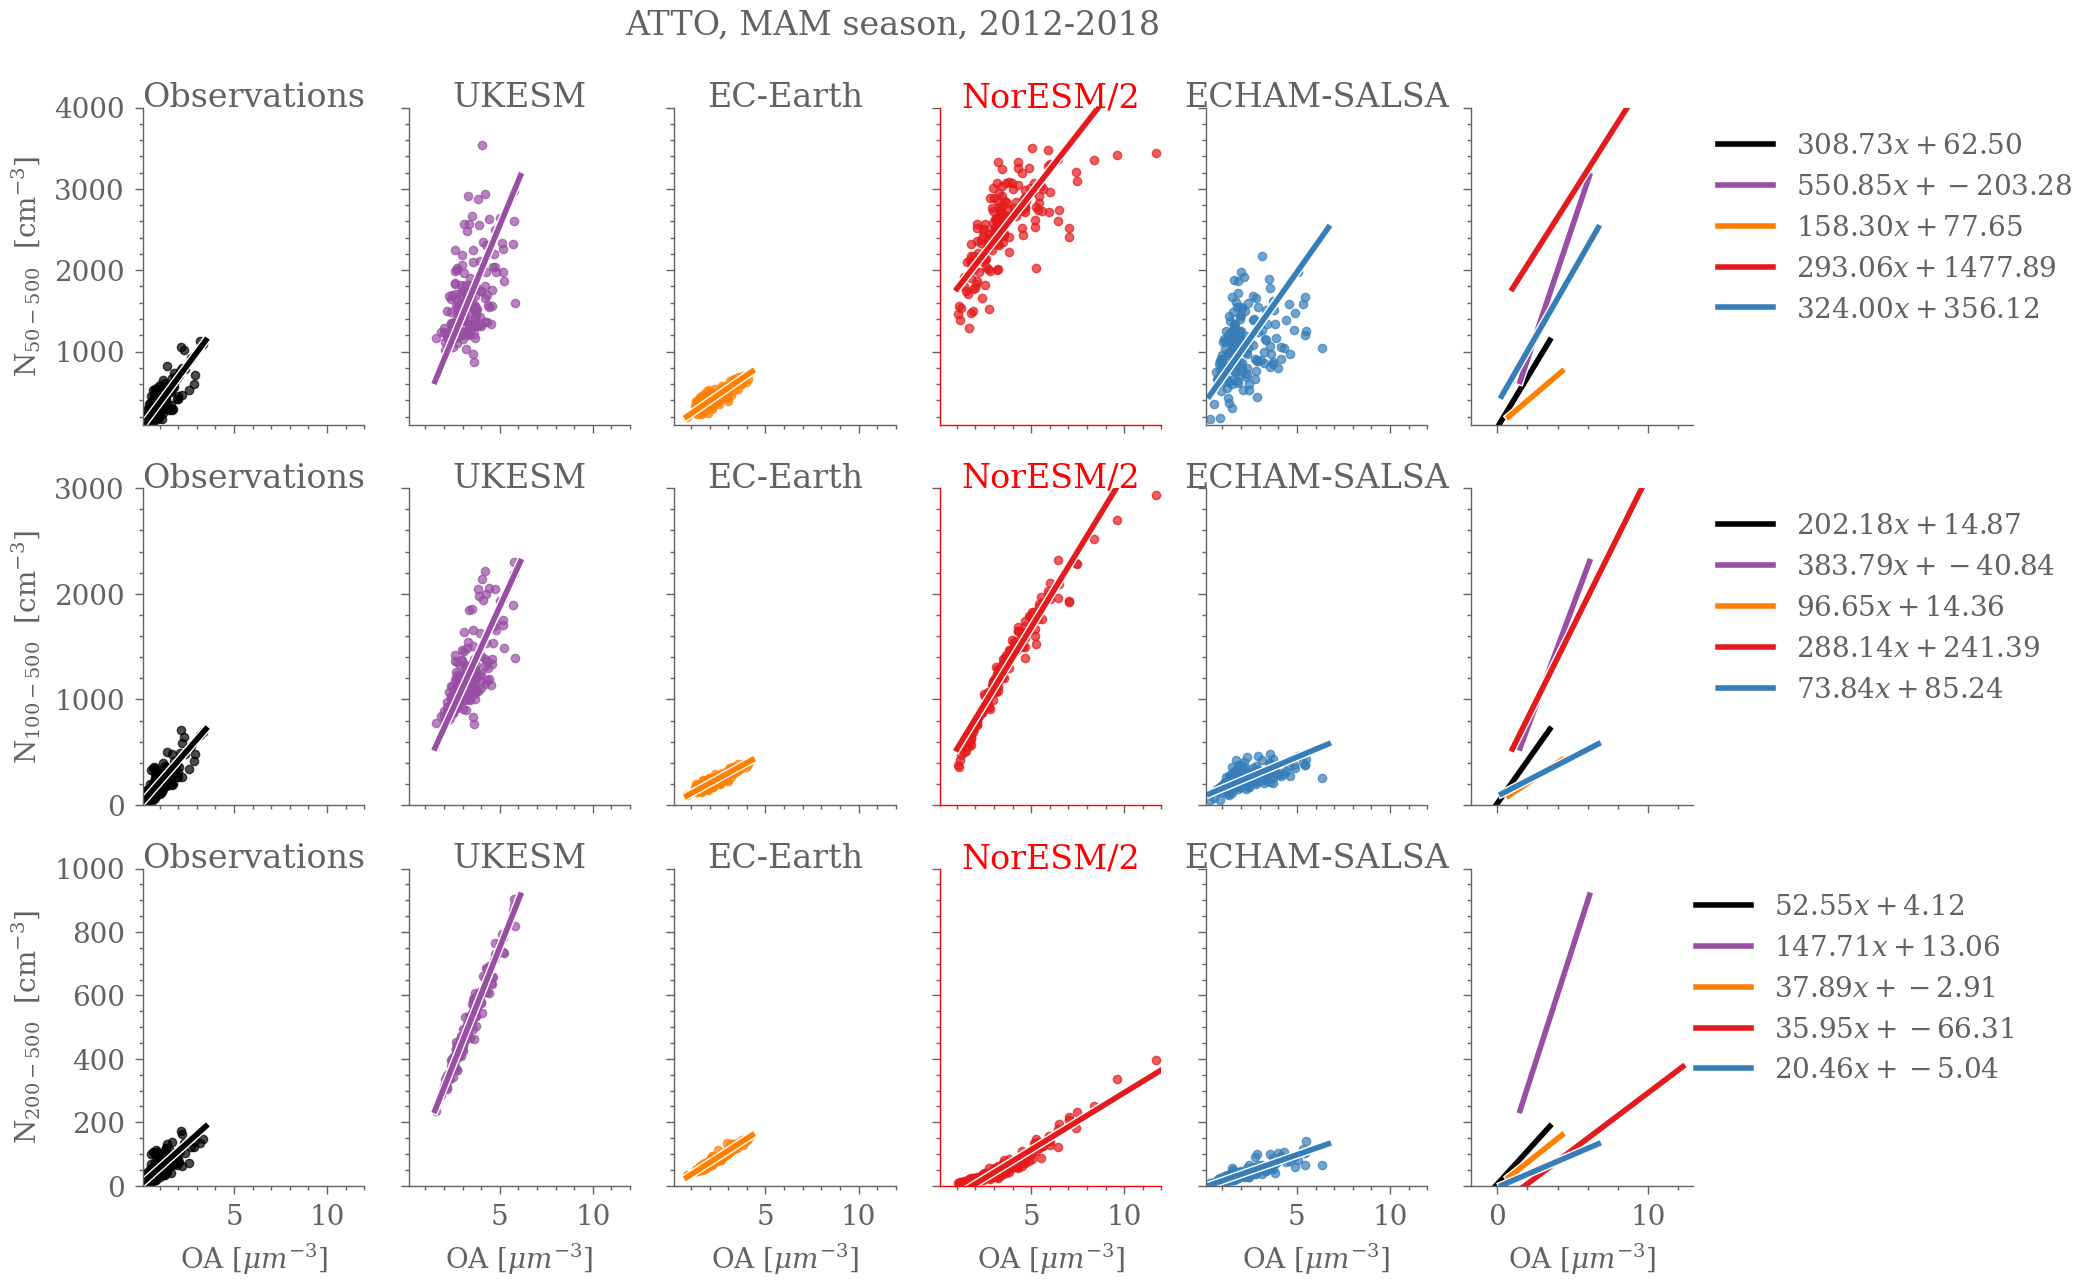

In [213]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]
divide_NorESM_by_factor = 2
xlab = r'OA [$\mu m^{-3}$]'

season = 'MAM'
source_list = models_and_obs[::-1]

xlims = [.1,12]

ylims = [100,4000]

# OBS: 
v_x = 'OA'

v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='linear'
yscale='linear'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func='linear',  #beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                       return_func=True, return_out_obj=True)
    
    
    compute_p_value(df_s, out, popt)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

ylims = [0,3000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'

xscale='linear'
yscale='linear'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                  fit_func='linear', return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    
#xlims = [.01,10]

ylims = [0,1000]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='linear'
yscale='linear'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', 
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}_linscale', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

## JFM

Observations
[330.26562089  92.02753396]
Beta: [346.03047035  70.68284919]
Beta Std Error: [10.56637108 21.42156665]
Beta Covariance: [[ 2402.51484749 -3252.86250128]
 [-3252.86250128  9874.53882207]]
Residual Variance: 0.04647138726586673
Inverse Condition #: 0.32745252794264146
Reason(s) for Halting:
  Sum of squares convergence
[346.03047035  70.68284919]
reason for haltng
parameter: 346.03047034831025
   conf interval: 325.0670910638368 366.9938496327837
   tstat: 32.7482791953894
   pstat: 0.0

parameter: 70.68284919087965
   conf interval: 28.183071079874487 113.18262730188482
   tstat: 3.299611571413432
   pstat: 0.0013422919740935235

UKESM
[ 100.94438355 1060.64181573]
Beta: [185.96361077 794.59818377]
Beta Std Error: [20.24699879 65.40012042]
Beta Covariance: [[  879.03908821 -2750.70430753]
 [-2750.70430753  9171.57600229]]
Residual Variance: 0.4663512301612125
Inverse Condition #: 0.06197819080566829
Reason(s) for Halting:
  Sum of squares convergence
[185.96361077 794.5981

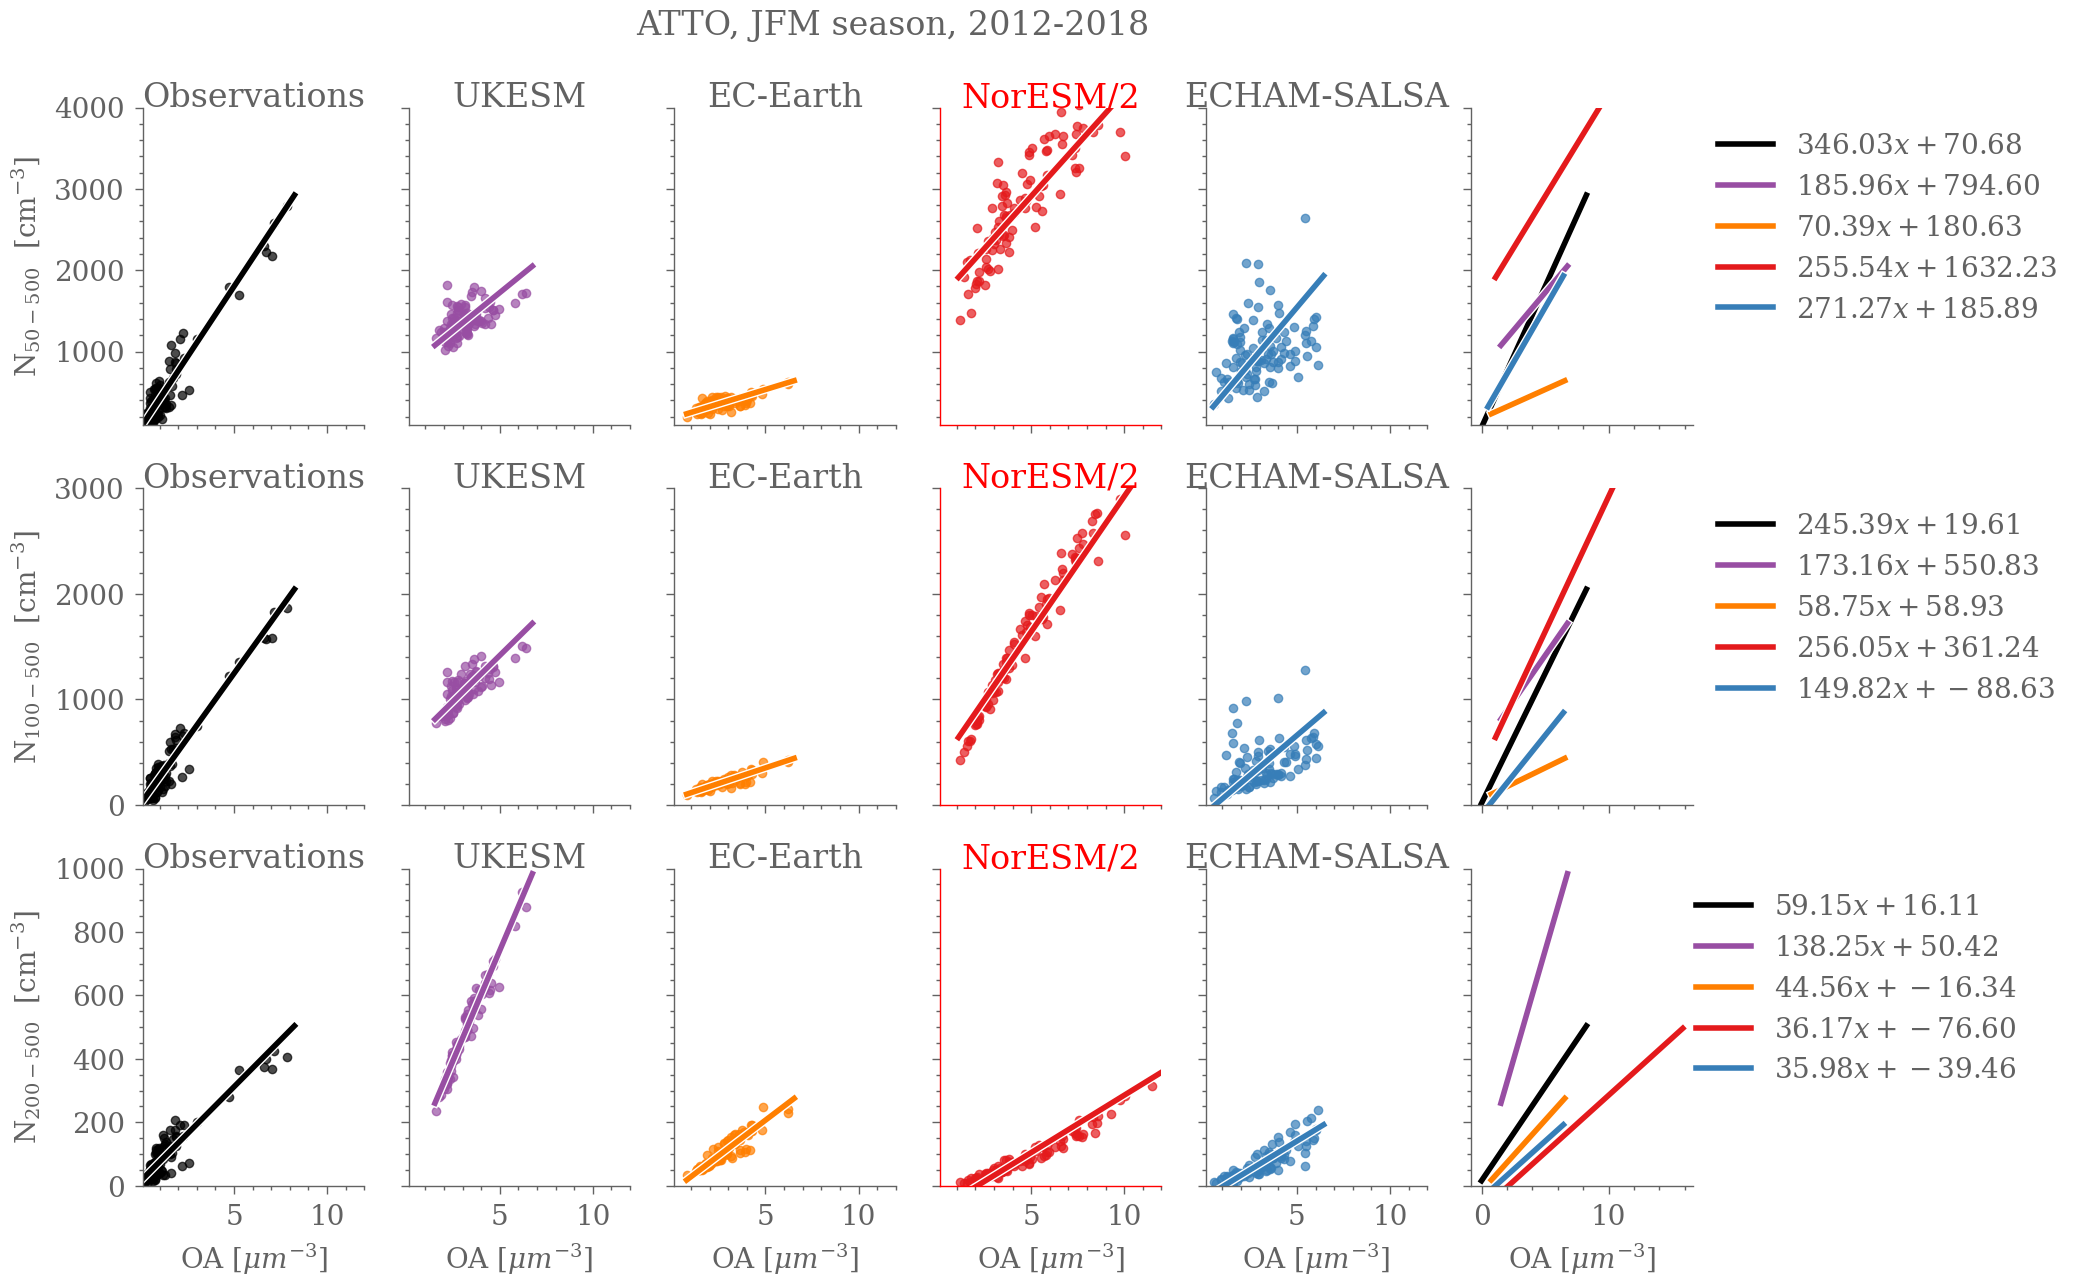

In [214]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]
divide_NorESM_by_factor = 2
xlab = r'OA [$\mu m^{-3}$]'

season = 'JFM'
source_list = models_and_obs[::-1]

xlims = [.1,12]

ylims = [100,4000]

# OBS: 
v_x = 'OA'

v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='linear'
yscale='linear'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func='linear',  #beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                       return_func=True, return_out_obj=True)
    
    
    compute_p_value(df_s, out, popt)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

ylims = [0,3000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'

xscale='linear'
yscale='linear'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                  fit_func='linear', return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    
#xlims = [.01,10]

ylims = [0,1000]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='linear'
yscale='linear'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', 
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}_linscale', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

In [215]:
from scipy import odr

[ 31.53007951 -25.99528672]
Beta: [ 35.97798839 -39.4573397 ]
Beta Std Error: [1.84703045 6.12640518]
Beta Covariance: [[ 27.0530203  -81.87874144]
 [-81.87874144 297.63163022]]
Residual Variance: 0.12610501258157078
Inverse Condition #: 0.10510658268016017
Reason(s) for Halting:
  Sum of squares convergence
[ 35.97798839 -39.4573397 ]
reason for haltng


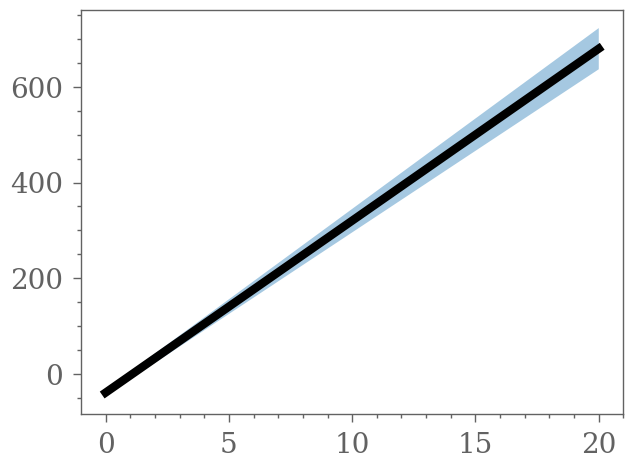

In [216]:
popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True, return_out_obj=True)
x = np.linspace(0,20)
#plt.plot(x, func(x))
plt.plot(x, func(x, *popt), c='k', linewidth=3,label='__nolegend__')

y1 = func(x, *(popt-out.sd_beta))
y2 = func(x, popt[0]-out.sd_beta[0],popt[1]+out.sd_beta[1], )
y3 = func(x, *(popt+out.sd_beta))
y4 = func(x, popt[0]+out.sd_beta[0],popt[1]-out.sd_beta[1], )
#ym = np.max(np.concatenate(y1,y2), axis=0)
ym = np.maximum(y1,y2)
ym = np.maximum(ym,y3)
ym = np.maximum(ym,y4)
ymi = np.minimum(y1,y2)
ymi = np.minimum(ymi,y3)
ymi = np.minimum(ymi,y4)


plt.fill_between(x, ymi,ym, alpha=.4)

## New version SON

Observations
[175.20185595 794.86735525]
Beta: [282.73411555 342.62738565]
Beta Std Error: [21.01657448 99.20746268]
Beta Covariance: [[ 1147.7986139  -4827.20608919]
 [-4827.20608919 25575.87603982]]
Residual Variance: 0.3848204705211546
Inverse Condition #: 0.08690944520641851
Reason(s) for Halting:
  Sum of squares convergence
[282.73411555 342.62738565]
reason for haltng
parameter: 282.7341155535355
   conf interval: 241.2470464027705 324.22118470430047
   tstat: 13.45291145754957
   pstat: 0.0

parameter: 342.627385645425
   conf interval: 146.79019679166672 538.4645744991833
   tstat: 3.453645284192054
   pstat: 0.0006981519036424189

UKESM
[ 148.1040534  1238.25014112]
Beta: [227.61051664 787.84715002]
Beta Std Error: [16.20521502 94.69932896]
Beta Covariance: [[  742.84598465 -4208.2119728 ]
 [-4208.2119728  25367.81067715]]
Residual Variance: 0.3535174169865466
Inverse Condition #: 0.03727592931239132
Reason(s) for Halting:
  Sum of squares convergence
[227.61051664 787.847150

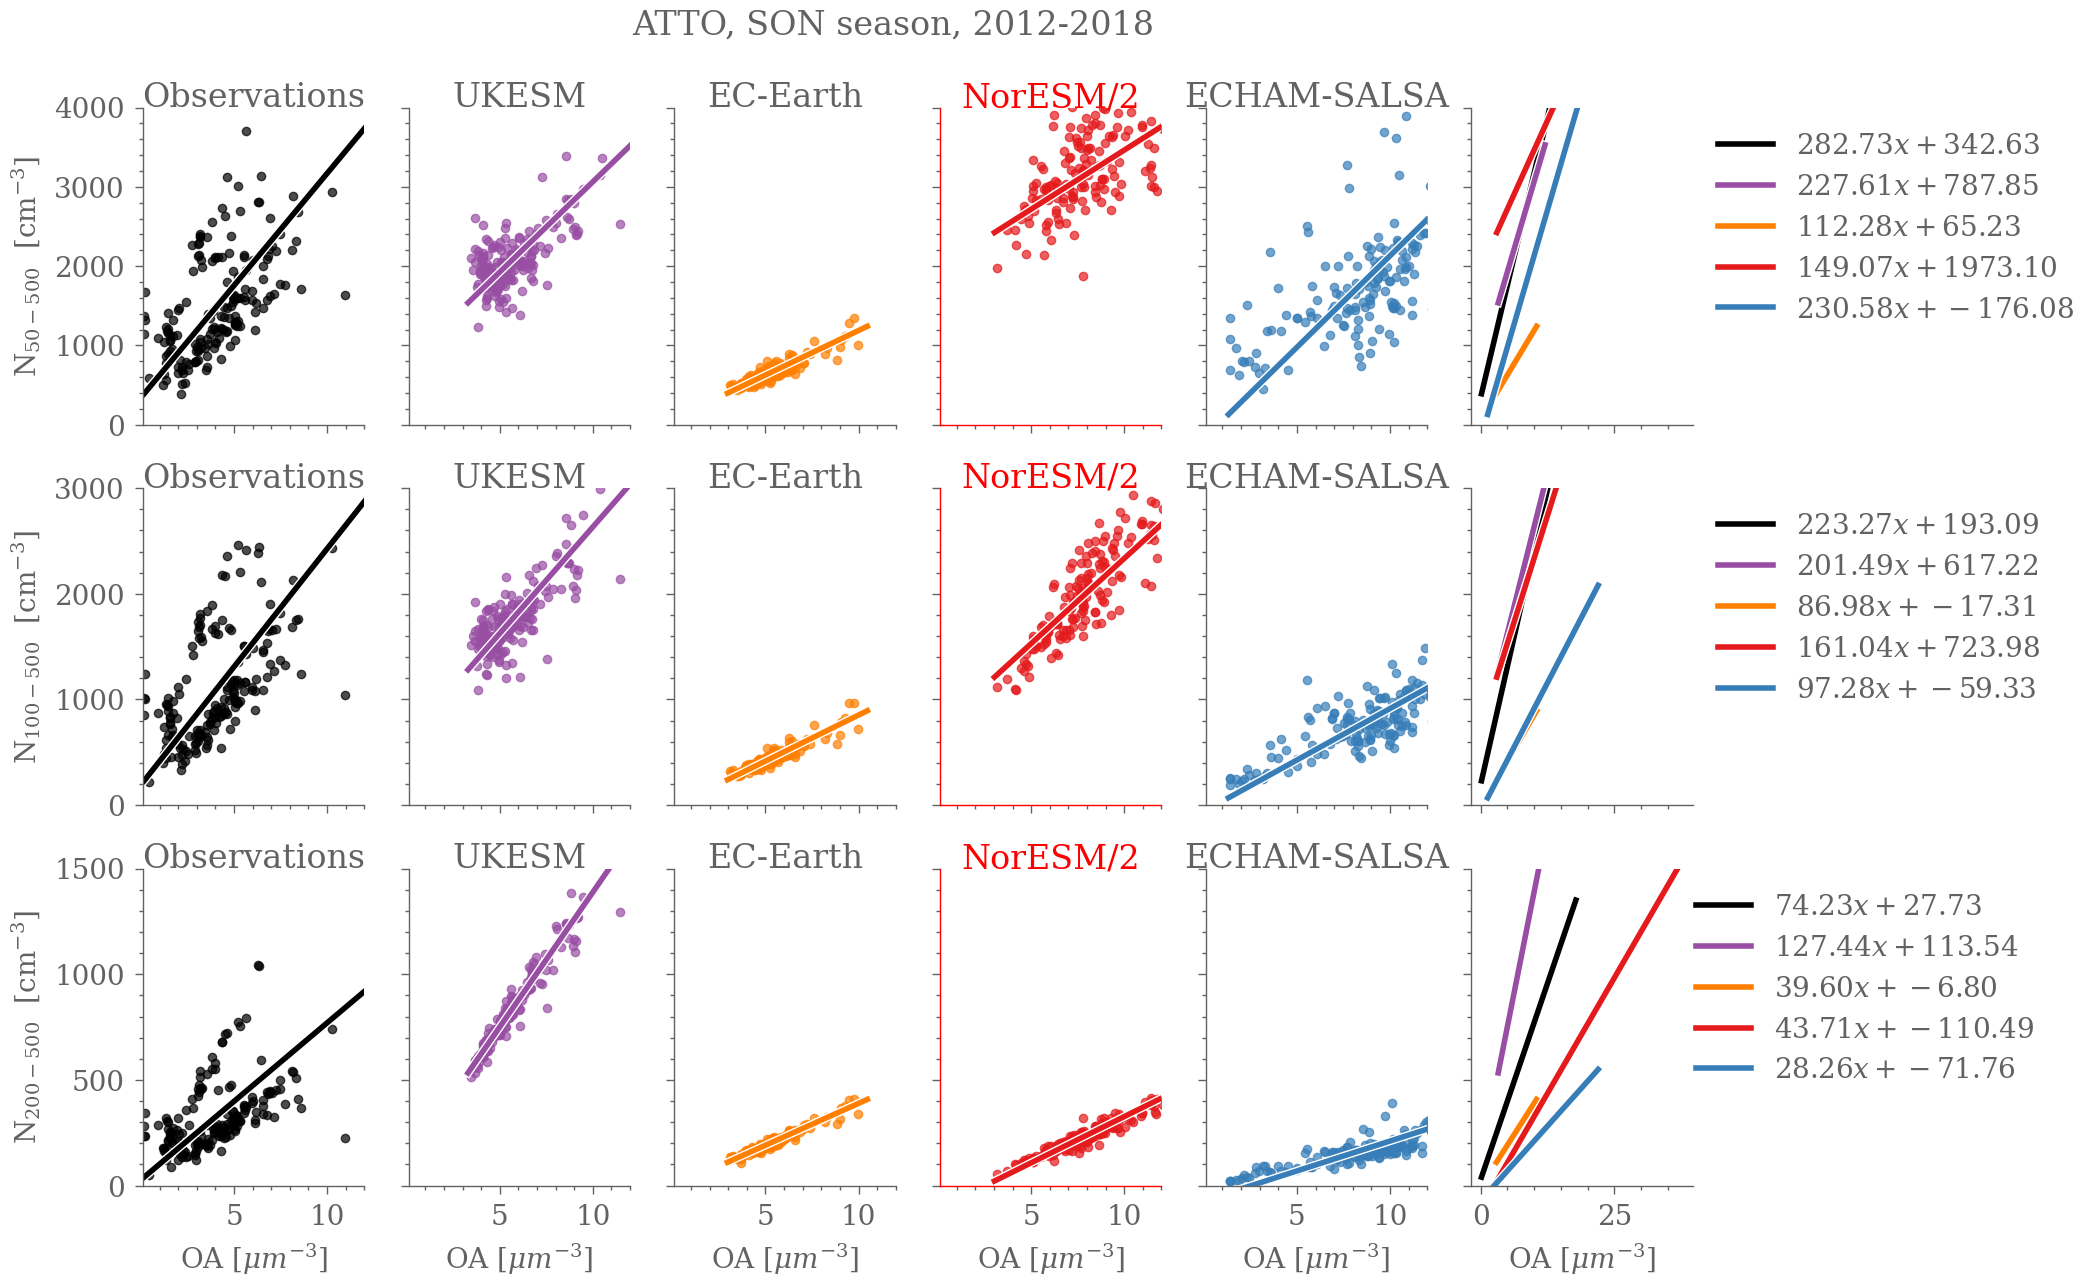

In [ ]:
## Settings
alpha_scatt = 0.5
figsize=[10,7]
divide_NorESM_by_factor = 2
xlab = r'OA [$\mu m^{-3}$]'

season = 'SON'
source_list = models_and_obs[::-1]

xlims = [.1,12]

ylims = [0,4000]

# OBS: 
v_x = 'OA'

v_y = 'N50-500'
ylab = r'N$_{50-500}$  [cm$^{-3}$]'



xscale='linear'
yscale='linear'

fig, axs_all = plt.subplots(3,6,figsize=figsize, sharey='row', sharex='col')


## Settings
alpha_scatt = 0.6



# Make plot
axs_sub = axs_all[0,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
         )


for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s, v_x, v_y, fit_func='linear',  #beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                       return_func=True, return_out_obj=True)
    
    
    compute_p_value(df_s, out, popt)

    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
#xlims = [.01,10]

ylims = [0,3000]

# OBS: 
v_y = 'N100-500'
ylab = r'N$_{100-500}$  [cm$^{-3}$]'

xscale='linear'
yscale='linear'
axs_sub = axs_all[1,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list =source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )
for mo, ax in zip(source_list, axs_sub):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor

    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, beta0 = [0,500],
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       
                                                  fit_func='linear', return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label=label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label=label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

    

    
axs_sub[-1].legend(bbox_to_anchor=(1,1,), frameon=False)
    
    
#xlims = [.01,10]

ylims = [0,1500]





# OBS: 
v_y = 'N200-500'
ylab = r'N$_{200-500}$  [cm$^{-3}$]'


xscale='linear'
yscale='linear'
axs_sub = axs_all[2,:]
axs_sub[0].set_ylabel(ylab)

make_plot2(v_x, v_y, xlims, ylims, season, 
              xlab=xlab, ylab=ylab, alpha_scat=.4,
             source_list = source_list, fig=fig, 
               axs=axs_sub,
              xscale='linear', yscale='linear',
              dic_df_med = dic_df_med,
           divide_NorESM_by_factor = divide_NorESM_by_factor,
           
         )

for mo, ax in zip(source_list, axs_sub):
    print(mo)
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    if (mo =='NorESM') &  (divide_NorESM_by_factor is not None):
        df_s = df_s/divide_NorESM_by_factor
    
    #popt, pov, label, func = get_log_fit_abc(df_s,v_x,v_y, return_func=True)
    popt, pov, label, func, out = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', 
                                                       #least_square_kwrgs = dict(bounds=[[0,0],[1e9,1e9]]),
                                                       return_func=True, return_out_obj=True)
    compute_p_value(df_s, out, popt)
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    
    plot_fit(func, popt, mo, _xlim, yscale, xscale, ax, label)
    plot_fit(func, popt, mo, _xlim, yscale, xscale, axs_sub[-1], label)

    ax.set_yscale(yscale)
    ax.set_xscale(xscale)

leg = axs_sub[-1].legend(bbox_to_anchor=(.9,1,), frameon=False)

    
for ax in axs_sub:
    ax.set_xlabel(xlab)
sns.despine(fig) 



    
    
fn = make_fn_scat(f'together_{season}_linscale', v_x, 'Nx')
#ax.legend(frameon=False)
fig.savefig(fn, dpi=150, bbox_inches='tight')#)
fig.savefig(fn.with_suffix('.pdf'), dpi=150, bbox_inches='tight')#)
print(fn)

### N50

#### DJF

(0.0, 29.4)
(0.0, 40.95)
(0.0, 55.65)
(0.0, 55.65)
(0.0, 55.65)
ECHAM-SALSA
[138.75700782 867.80885341]
Beta: [326.78426019 192.30185439]
Beta Std Error: [ 38.56729895 148.12415358]
Beta Covariance: [[ 2541.07826207 -9129.08061667]
 [-9129.08061667 37482.74220354]]
Residual Variance: 0.5853564489411098
Inverse Condition #: 0.07907468409242505
Reason(s) for Halting:
  Sum of squares convergence
[326.78426019 192.30185439]
reason for haltng
NorESM
[ 179.09261471 4125.48185854]
Beta: [ 251.14341022 3129.96338323]
Beta Std Error: [ 19.08606307 279.03636311]
Beta Covariance: [[  1248.08599455 -17244.67642001]
 [-17244.67642001 266767.79932309]]
Residual Variance: 0.29186915412721787
Inverse Condition #: 0.14405997093630588
Reason(s) for Halting:
  Sum of squares convergence
[ 251.14341022 3129.96338323]
reason for haltng
EC-Earth
[ 74.72258926 183.87276341]
Beta: [101.37488674  89.88781128]
Beta Std Error: [ 7.35561345 26.66748069]
Beta Covariance: [[ 202.26299095 -713.24723479]
 [-713.2472

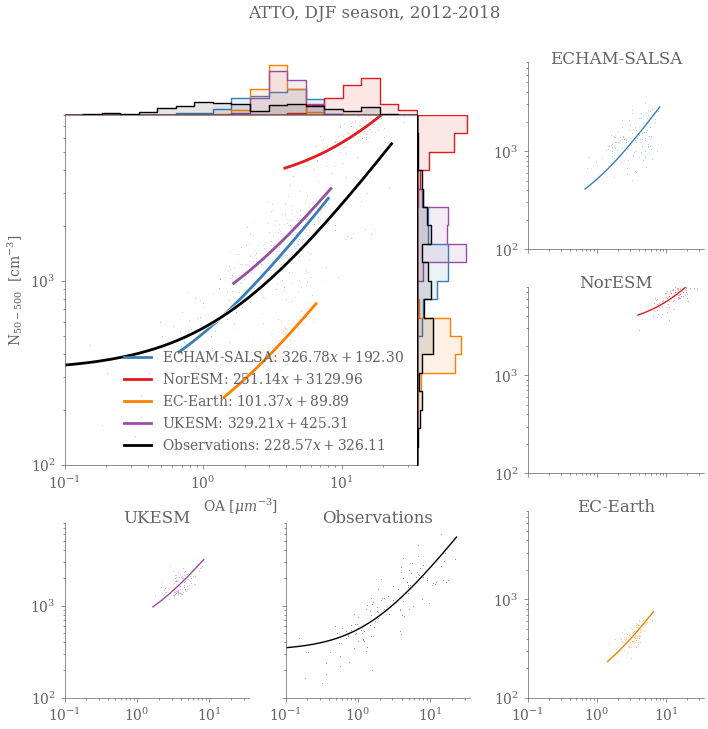

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [ ]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'DJF'
xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### JF

(0.0, 13.65)
(0.0, 15.75)
(0.0, 22.05)
(0.0, 23.1)
(0.0, 23.1)
ECHAM-SALSA
[  18.07191044 1083.35751887]
Beta: [287.29878941 124.99325101]
Beta Std Error: [ 77.88198642 289.20136429]
Beta Covariance: [[  6213.12264193 -22116.79483783]
 [-22116.79483783  85671.53755213]]
Residual Variance: 0.9762568934727875
Inverse Condition #: 0.01691745646211585
Reason(s) for Halting:
  Sum of squares convergence
[287.29878941 124.99325101]
reason for haltng
NorESM
[ 157.92341911 4686.07758043]
Beta: [ 206.28767064 4023.32020599]
Beta Std Error: [ 21.70111029 320.99765087]
Beta Covariance: [[  1928.2344715  -26423.47491242]
 [-26423.47491242 421890.39939132]]
Residual Variance: 0.24423284343566687
Inverse Condition #: 0.14251584969524372
Reason(s) for Halting:
  Sum of squares convergence
[ 206.28767064 4023.32020599]
reason for haltng
EC-Earth
[ 61.62672694 185.50332371]
Beta: [ 79.87395412 123.98012115]
Beta Std Error: [ 8.28029003 28.85325973]
Beta Covariance: [[ 288.10427384 -971.38573254]
 [-971

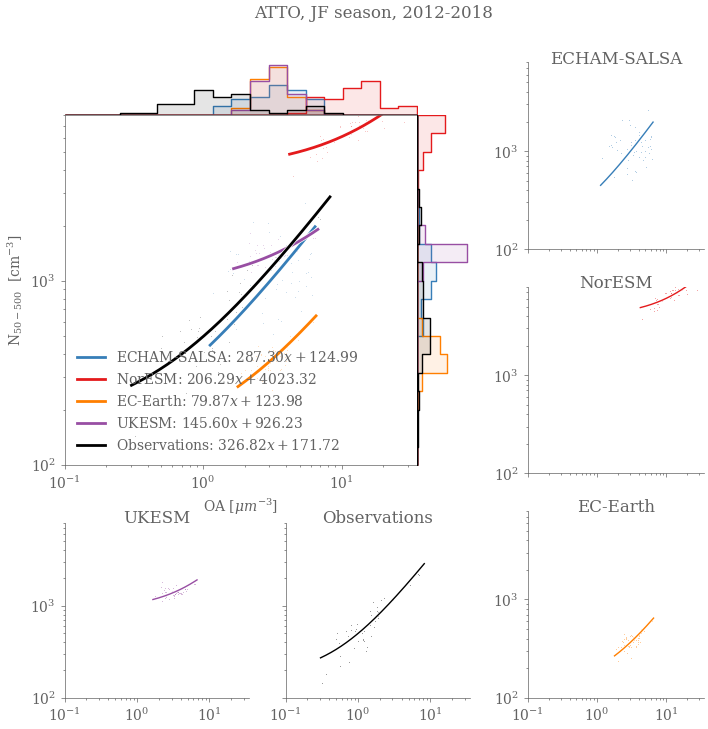

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [219]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'JF'
xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### JFM

(0.0, 24.15)
(0.0, 28.35)
(0.0, 28.35)
(0.0, 39.9)
(0.0, 39.9)
ECHAM-SALSA
293
[ 85.73799534 747.41175731]
Beta: [271.26801638 185.88611552]
Beta Std Error: [ 39.11375232 126.45366187]
Beta Covariance: [[ 2192.81283987 -6636.77332898]
 [-6636.77332898 22919.51499803]]
Residual Variance: 0.6976818052466206
Inverse Condition #: 0.09078792955489204
Reason(s) for Halting:
  Sum of squares convergence
[271.26801638 185.88611552]
reason for haltng
NorESM
293
[ 216.24519078 3661.48795686]
Beta: [ 255.5440747  3264.45303081]
Beta Std Error: [ 14.75102313 169.79457937]
Beta Covariance: [[  1387.10943827 -14013.90561533]
 [-14013.90561533 183786.70080147]]
Residual Variance: 0.15686771164251417
Inverse Condition #: 0.23584309680806947
Reason(s) for Halting:
  Sum of squares convergence
[ 255.5440747  3264.45303081]
reason for haltng
EC-Earth
293
[ 53.77066771 223.30121119]
Beta: [ 70.39013131 180.63216586]
Beta Std Error: [ 5.15077179 14.19274621]
Beta Covariance: [[ 110.15750244 -282.81994718]


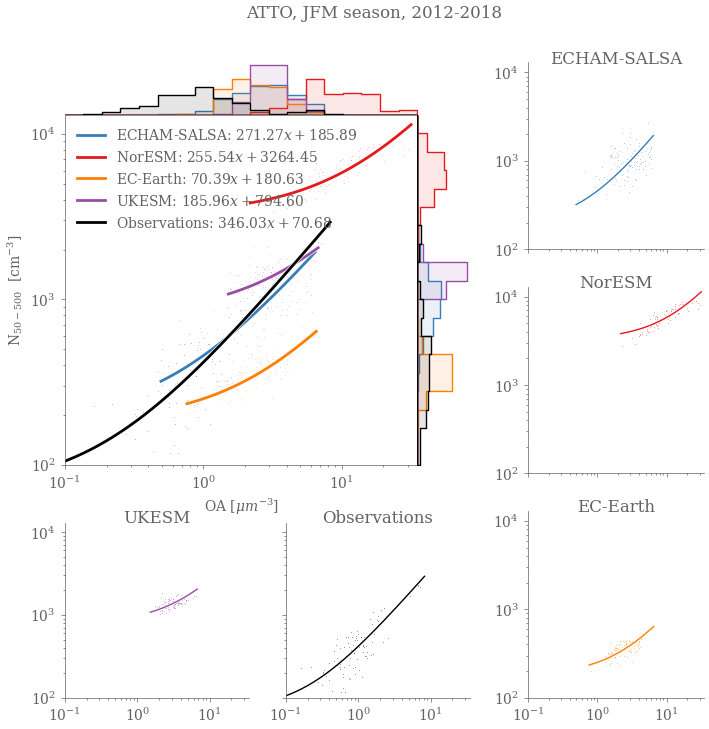

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [220]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'JFM'
xlims = [.1,35]

ylims = [100,13000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### WET_old

(0.0, 49.35)
(0.0, 64.05)
(0.0, 66.15)
(0.0, 98.7)
(0.0, 98.7)
ECHAM-SALSA
537
[ 80.13187195 889.30986558]
Beta: [285.42325679 367.9591658 ]
Beta Std Error: [29.66375421 82.08027382]
Beta Covariance: [[ 1211.64998728 -3077.06309127]
 [-3077.06309127  9276.89299743]]
Residual Variance: 0.7262314389052141
Inverse Condition #: 0.08648851719618954
Reason(s) for Halting:
  Sum of squares convergence
[285.42325679 367.9591658 ]
reason for haltng
NorESM
537
[ 210.55569816 3650.41125239]
Beta: [ 259.69213747 3219.48069857]
Beta Std Error: [ 11.64182533 115.64911691]
Beta Covariance: [[  709.40643433 -6221.55186197]
 [-6221.55186197 70006.37775438]]
Residual Variance: 0.19104999673430745
Inverse Condition #: 0.2041323964949423
Reason(s) for Halting:
  Sum of squares convergence
[ 259.69213747 3219.48069857]
reason for haltng
EC-Earth
537
[ 66.68946708 247.65803584]
Beta: [110.29741808 141.89189556]
Beta Std Error: [ 7.61093226 19.49294256]
Beta Covariance: [[ 145.10246097 -351.92957475]
 [-351.

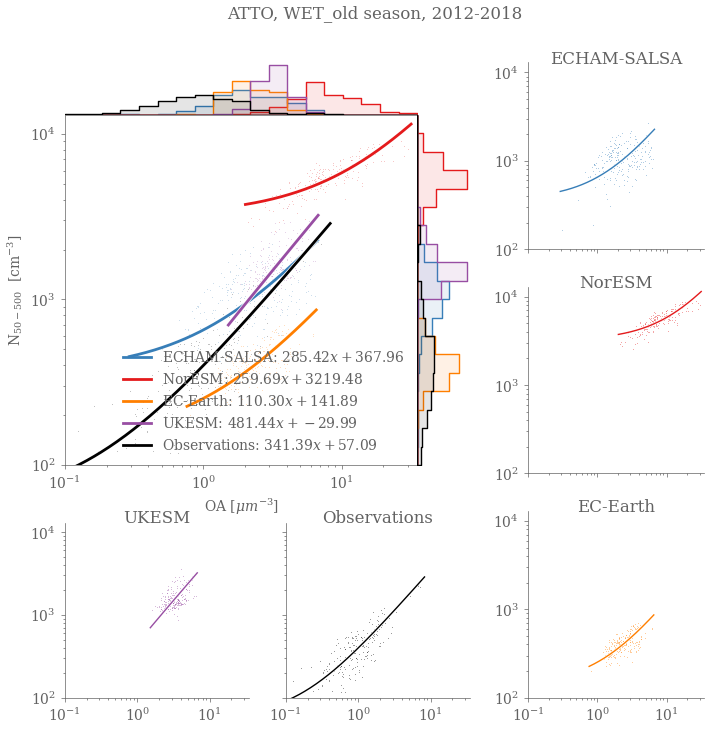

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [221]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET_old'
xlims = [.1,35]

ylims = [100,13000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### SON

(0.0, 57.75)
(0.0, 57.75)
(0.0, 78.75)
(0.0, 78.75)
(0.0, 78.75)
ECHAM-SALSA
364
[167.84816606 414.27174423]
Beta: [ 230.57651384 -176.07550084]
Beta Std Error: [ 14.03459456 141.25832381]
Beta Covariance: [[  715.54346067 -6734.10500616]
 [-6734.10500616 72487.70870924]]
Residual Variance: 0.27527306906017557
Inverse Condition #: 0.03323555508242982
Reason(s) for Halting:
  Sum of squares convergence
[ 230.57651384 -176.07550084]
reason for haltng
NorESM
364
[ 101.7608429  4796.41613365]
Beta: [ 149.0722368  3946.20442576]
Beta Std Error: [  9.93130847 192.55490806]
Beta Covariance: [[   307.14358082  -5519.53875792]
 [ -5519.53875792 115461.63043796]]
Residual Variance: 0.32112306465965057
Inverse Condition #: 0.12276531641025432
Reason(s) for Halting:
  Sum of squares convergence
[ 149.0722368  3946.20442576]
reason for haltng
EC-Earth
364
[101.51060638 122.02962629]
Beta: [112.28215389  65.23139309]
Beta Std Error: [ 3.90056359 21.14348694]
Beta Covariance: [[ 156.71566164 -826.360

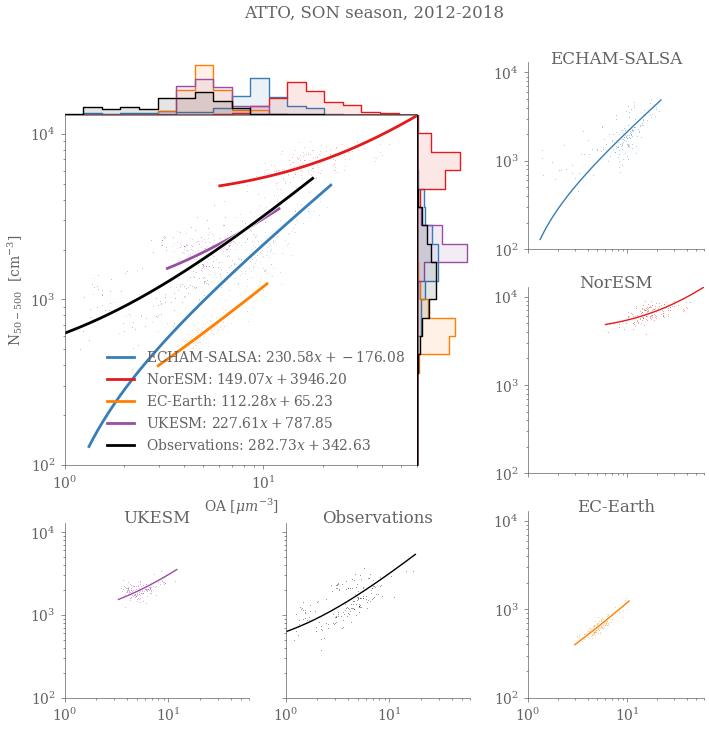

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [222]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'SON'
xlims = [1,60]

ylims = [100,13000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### DRY

(0.0, 55.65)
(0.0, 55.65)
(0.0, 129.15)
(0.0, 129.15)
(0.0, 129.15)
ECHAM-SALSA
[174.39112514 478.15635051]
Beta: [ 247.52647486 -209.21965398]
Beta Std Error: [ 13.16822814 131.26557079]
Beta Covariance: [[  582.10817296 -5471.05159994]
 [-5471.05159994 57842.98218019]]
Residual Variance: 0.2978866134886082
Inverse Condition #: 0.031441710006487295
Reason(s) for Halting:
  Sum of squares convergence
[ 247.52647486 -209.21965398]
reason for haltng
NorESM
[ 113.49966312 4721.60728523]
Beta: [ 167.00023793 3770.90222328]
Beta Std Error: [  9.31947601 177.42402746]
Beta Covariance: [[  268.89721856 -4778.30269275]
 [-4778.30269275 97460.39954852]]
Residual Variance: 0.32299565430788085
Inverse Condition #: 0.12663363181987394
Reason(s) for Halting:
  Sum of squares convergence
[ 167.00023793 3770.90222328]
reason for haltng
EC-Earth
[116.21187831  60.15462917]
Beta: [125.9132689    7.49618803]
Beta Std Error: [ 3.36059759 18.89287193]
Beta Covariance: [[ 145.27825762 -788.55161893]
 [-788

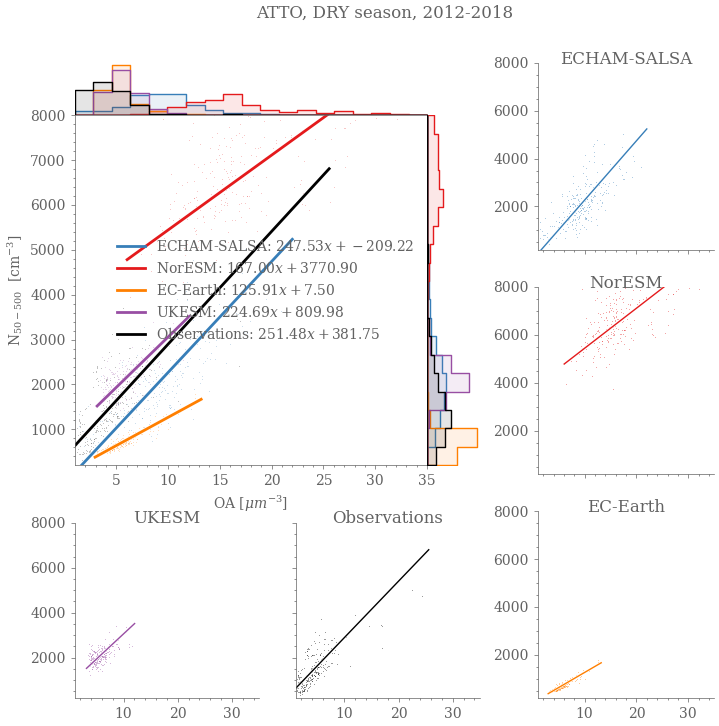

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [223]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
# ax = axsaxs_extra


## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'DRY'
xlims = [1,35]

ylims = [200,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='linear'
yscale='linear'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6




make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### WET

(0.0, 84.0)
(0.0, 118.65)
(0.0, 157.5)
(0.0, 157.5)
(0.0, 157.5)
ECHAM-SALSA
[215.10547552 639.69165135]
Beta: [322.36429766 264.82608415]
Beta Std Error: [13.98789979 54.65131155]
Beta Covariance: [[  585.25253429 -2045.43581081]
 [-2045.43581081  8933.8664521 ]]
Residual Variance: 0.3343195099113594
Inverse Condition #: 0.10088911680741286
Reason(s) for Halting:
  Sum of squares convergence
[322.36429766 264.82608415]
reason for haltng
NorESM
[ 193.60503192 3803.68365089]
Beta: [ 249.18416013 3192.74894796]
Beta Std Error: [  8.57502347 102.67419528]
Beta Covariance: [[  328.10813309 -3606.61733827]
 [-3606.61733827 47040.1802005 ]]
Residual Variance: 0.22410607976759617
Inverse Condition #: 0.17477097837708902
Reason(s) for Halting:
  Sum of squares convergence
[ 249.18416013 3192.74894796]
reason for haltng
EC-Earth
[ 84.67913793 221.84517763]
Beta: [109.38189163 144.30160797]
Beta Std Error: [ 3.81770192 12.66254151]
Beta Covariance: [[  64.22605014 -201.60979783]
 [-201.60979783 

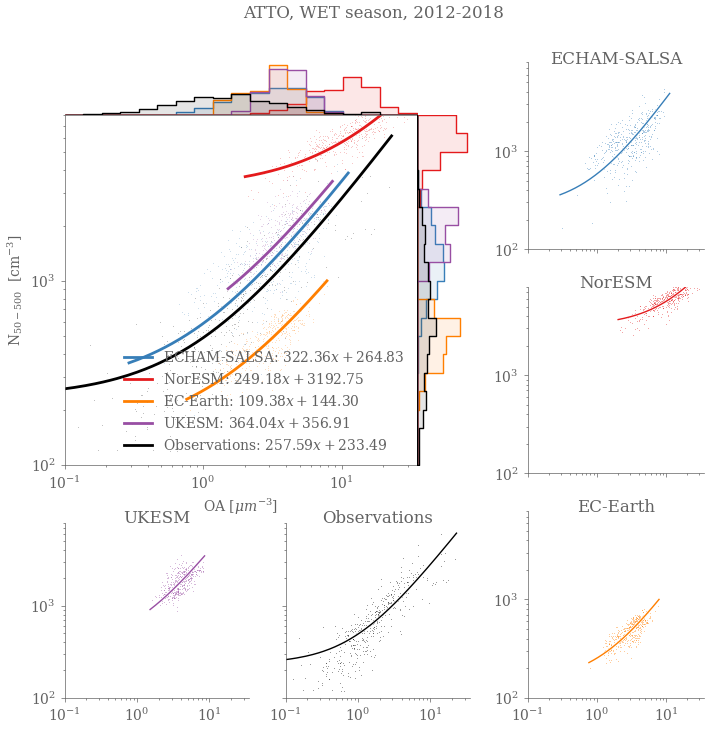

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [224]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
# ax = axsaxs_extra


## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET'
xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6




make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### Wet mid

(0.0, 44.1)
(0.0, 58.8)
(0.0, 64.05)
(0.0, 81.9)
(0.0, 81.9)
ECHAM-SALSA
[121.24663419 814.35380053]
Beta: [329.52831566 341.28303782]
Beta Std Error: [34.16164872 84.40394676]
Beta Covariance: [[ 1824.95089659 -4145.01602294]
 [-4145.01602294 11140.35545747]]
Residual Variance: 0.6394792568032459
Inverse Condition #: 0.1278585797364234
Reason(s) for Halting:
  Sum of squares convergence
[329.52831566 341.28303782]
reason for haltng
NorESM
[ 229.6440596  3457.97429016]
Beta: [ 304.49811843 2896.32876671]
Beta Std Error: [ 17.38365475 142.13271872]
Beta Covariance: [[ 1215.09580336 -9117.11599868]
 [-9117.11599868 81230.00343715]]
Residual Variance: 0.24869763480723114
Inverse Condition #: 0.16137123963316896
Reason(s) for Halting:
  Sum of squares convergence
[ 304.49811843 2896.32876671]
reason for haltng
EC-Earth
[ 91.2015106  210.49132839]
Beta: [120.99760325 142.89137706]
Beta Std Error: [ 6.93470663 16.73719917]
Beta Covariance: [[ 193.02050275 -437.91568894]
 [-437.91568894 1124.

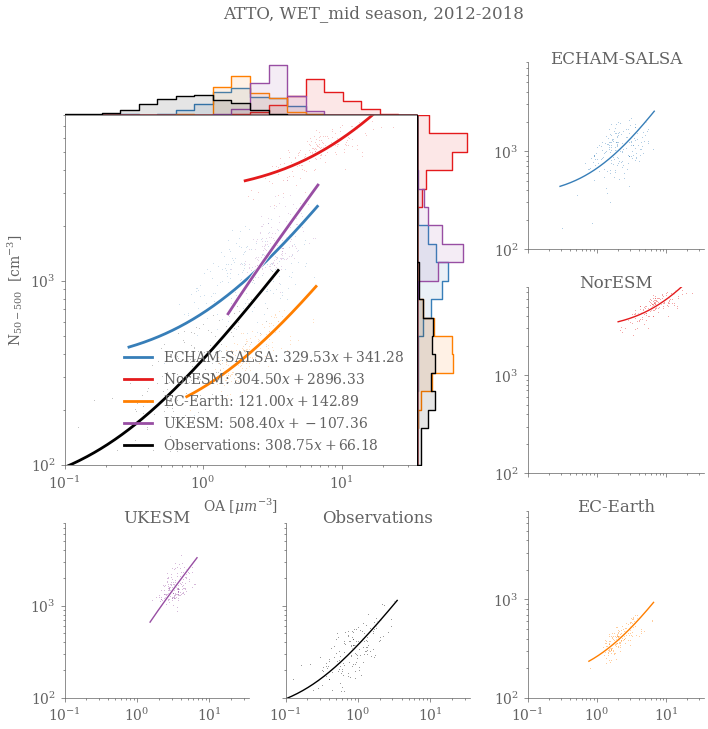

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [225]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
# ax = axsaxs_extra


## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET_mid'
xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6




make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### Wet_early

(0.0, 35.7)
(0.0, 42.0)
(0.0, 55.65)
(0.0, 66.15)
(0.0, 66.15)
ECHAM-SALSA
[167.67161168 667.90767092]
Beta: [331.39004919 133.74638225]
Beta Std Error: [ 29.28952074 103.48164146]
Beta Covariance: [[ 1715.88485104 -5598.38797184]
 [-5598.38797184 21418.55792416]]
Residual Variance: 0.4999613025803334
Inverse Condition #: 0.09281426002498519
Reason(s) for Halting:
  Sum of squares convergence
[331.39004919 133.74638225]
reason for haltng
NorESM
[ 206.75429546 3671.25462062]
Beta: [ 256.42604772 3093.9745444 ]
Beta Std Error: [ 12.95822255 165.65759813]
Beta Covariance: [[   856.55028312  -9954.74036765]
 [ -9954.74036765 139986.03566317]]
Residual Variance: 0.19603698104482128
Inverse Condition #: 0.20732132118516713
Reason(s) for Halting:
  Sum of squares convergence
[ 256.42604772 3093.9745444 ]
reason for haltng
EC-Earth
[ 72.7205888  193.77723861]
Beta: [ 88.63477828 146.14058689]
Beta Std Error: [ 4.30820863 13.69352609]
Beta Covariance: [[ 102.14237758 -305.74732085]
 [-305.74732

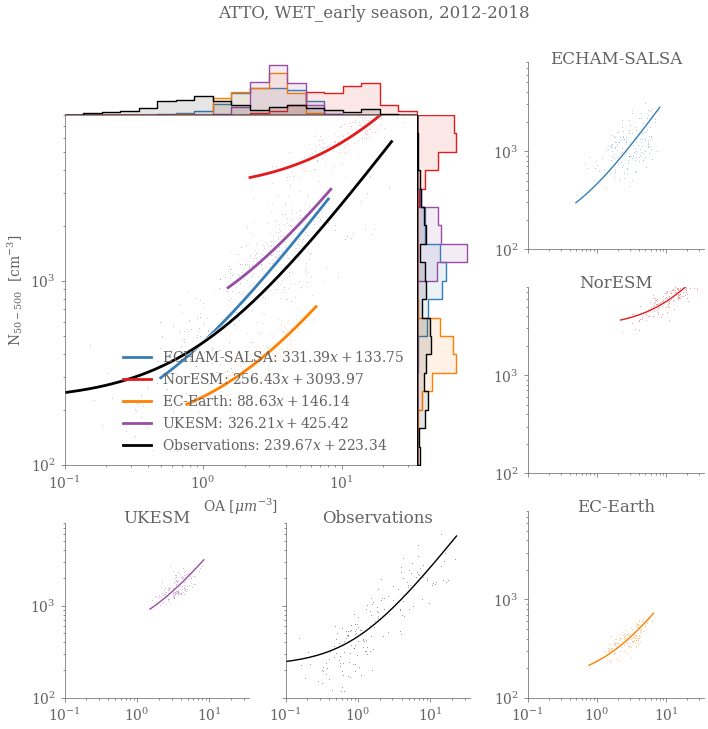

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [226]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
# ax = axsaxs_extra


## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET_early'
xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6




make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### Wet_late

(0.0, 50.4)
(0.0, 79.8)
(0.0, 101.85)
(0.0, 101.85)
(0.0, 101.85)
ECHAM-SALSA
[225.17164601 686.99226547]
Beta: [308.77801165 381.89493851]
Beta Std Error: [15.33376438 63.46129077]
Beta Covariance: [[  861.51757542 -3143.85979984]
 [-3143.85979984 14756.5343515 ]]
Residual Variance: 0.2729187850057484
Inverse Condition #: 0.10189474591298373
Reason(s) for Halting:
  Sum of squares convergence
[308.77801165 381.89493851]
reason for haltng
NorESM
[ 179.82264721 3935.87776395]
Beta: [ 242.2220514  3276.06799344]
Beta Std Error: [ 11.68833664 133.287408  ]
Beta Covariance: [[  526.14623666 -5563.45746726]
 [-5563.45746726 68419.40464365]]
Residual Variance: 0.2596563536830144
Inverse Condition #: 0.14629811442504256
Reason(s) for Halting:
  Sum of squares convergence
[ 242.2220514  3276.06799344]
reason for haltng
EC-Earth
[ 84.38735978 265.78977757]
Beta: [ 99.07184986 218.25342471]
Beta Std Error: [ 3.55262249 12.14072145]
Beta Covariance: [[  84.46929483 -273.44239823]
 [-273.44239823 

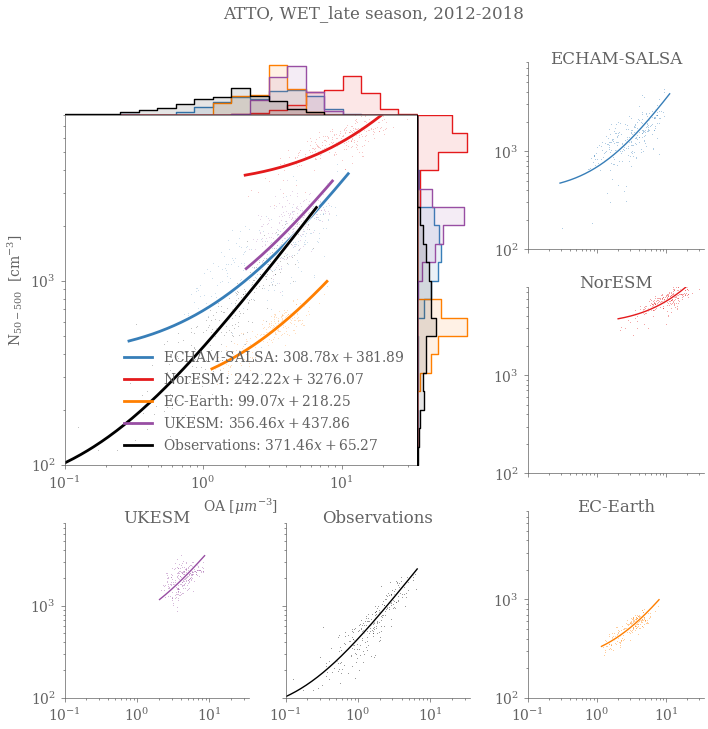

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [227]:
#fig, axs = plt.subplots(1,1,dpi=150, figsize=[5,5])
# fig, ax, daxs, axs_extra = make_cool_grid3()
# ax = axsaxs_extra


## Settings
alpha_scatt = 0.5

ylab = r'N$_{50-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET_late'
xlims = [.1,35]

ylims = [100,8000]

# OBS: 
v_x = 'OA'
v_y = 'N50-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6




make_plot(v_x, v_y, xlims, ylims, season, 
              xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

## N100

#### WET_old

(0.0, 49.35)
(0.0, 64.05)
(0.0, 66.15)
(0.0, 98.7)
(0.0, 98.7)
ECHAM-SALSA
537
[ 66.49298593 139.74753509]
Beta: [122.03286009  -1.29932964]
Beta Std Error: [ 9.1856048  25.82635287]
Beta Covariance: [[ 183.61462571 -466.30196606]
 [-466.30196606 1451.50294133]]
Residual Variance: 0.45952404462962854
Inverse Condition #: 0.1271643952759215
Reason(s) for Halting:
  Sum of squares convergence
[122.03286009  -1.29932964]
reason for haltng
NorESM
537
[254.57586622 742.40515996]
Beta: [261.89631372 678.20425732]
Beta Std Error: [ 4.32388905 43.37300353]
Beta Covariance: [[  662.49434527 -5810.12922327]
 [-5810.12922327 66661.04056325]]
Residual Variance: 0.028220643112230142
Inverse Condition #: 0.04639892369181325
Reason(s) for Halting:
  Sum of squares convergence
[261.89631372 678.20425732]
reason for haltng
EC-Earth
537
[58.92163807 84.42364937]
Beta: [71.95786038 52.80576918]
Beta Std Error: [3.15706827 8.14132329]
Beta Covariance: [[  54.48541228 -132.14818647]
 [-132.14818647  362.32

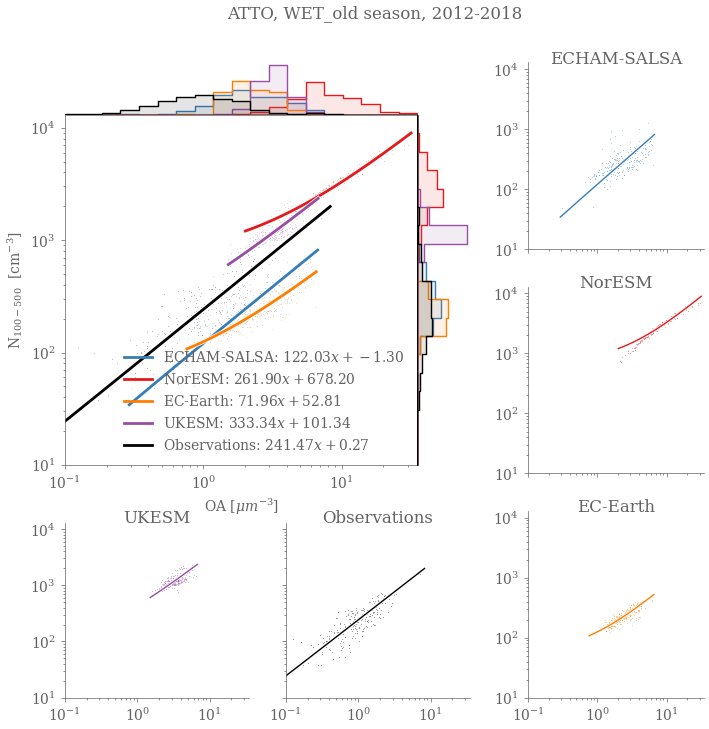

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [228]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{100-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'WET_old'
xlims = [.1,35]

ylims = [10,13000]

# OBS: 
v_x = 'OA'
v_y = 'N100-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### JFM

(0.0, 24.15)
(0.0, 28.35)
(0.0, 28.35)
(0.0, 39.9)
(0.0, 39.9)
ECHAM-SALSA
293
[ 70.45431215 151.58160211]
Beta: [149.82031305 -88.62774781]
Beta Std Error: [17.98705435 58.57078383]
Beta Covariance: [[  598.71546911 -1812.07413435]
 [-1812.07413435  6348.37331348]]
Residual Variance: 0.5403804327371197
Inverse Condition #: 0.09516138681811362
Reason(s) for Halting:
  Sum of squares convergence
[149.82031305 -88.62774781]
reason for haltng
NorESM
293
[248.9364155  794.33826862]
Beta: [256.0493233  722.47687464]
Beta Std Error: [ 6.07769639 70.50460299]
Beta Covariance: [[  1303.62249821 -13170.44299522]
 [-13170.44299522 175431.9890896 ]]
Residual Variance: 0.02833519171212119
Inverse Condition #: 0.04089567122731494
Reason(s) for Halting:
  Sum of squares convergence
[256.0493233  722.47687464]
reason for haltng
EC-Earth
293
[53.34086325 72.82485839]
Beta: [58.75324262 58.92903991]
Beta Std Error: [2.58219521 7.15331549]
Beta Covariance: [[  70.95366333 -182.16745401]
 [-182.16745401 

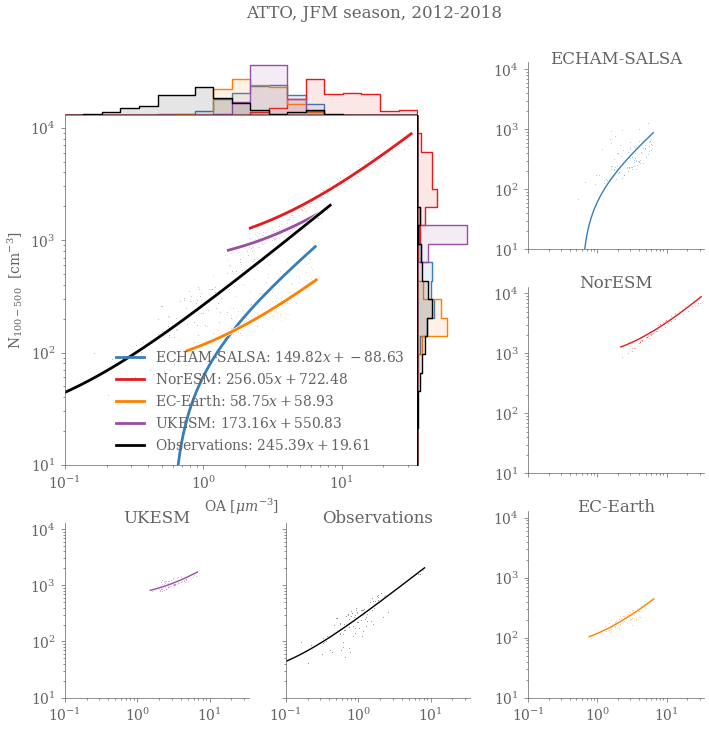

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [229]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{100-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'JFM'
xlims = [.1,35]

ylims = [10,13000]

# OBS: 
v_x = 'OA'
v_y = 'N100-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### SON

(0.0, 57.75)
(0.0, 57.75)
(0.0, 78.75)
(0.0, 78.75)
(0.0, 78.75)
ECHAM-SALSA
364
[84.55048711 60.4948476 ]
Beta: [ 97.28224013 -59.32587935]
Beta Std Error: [ 3.94871772 39.94738844]
Beta Covariance: [[  117.75011672 -1108.16655148]
 [-1108.16655148 12051.07959753]]
Residual Variance: 0.1324191605082893
Inverse Condition #: 0.03427488916252912
Reason(s) for Halting:
  Sum of squares convergence
[ 97.28224013 -59.32587935]
reason for haltng
NorESM
364
[ 148.024835   1681.78898011]
Beta: [ 161.0371555  1447.95044293]
Beta Std Error: [ 5.06876805 99.24548714]
Beta Covariance: [[   314.24298615  -5647.11892143]
 [ -5647.11892143 120470.9382559 ]]
Residual Variance: 0.08175969125411738
Inverse Condition #: 0.16909562150915114
Reason(s) for Halting:
  Sum of squares convergence
[ 161.0371555  1447.95044293]
reason for haltng
EC-Earth
364
[80.46993717 17.0085546 ]
Beta: [ 86.9782549  -17.30972391]
Beta Std Error: [ 2.65392782 14.39021522]
Beta Covariance: [[  93.00918132 -490.43603298]
 [-490

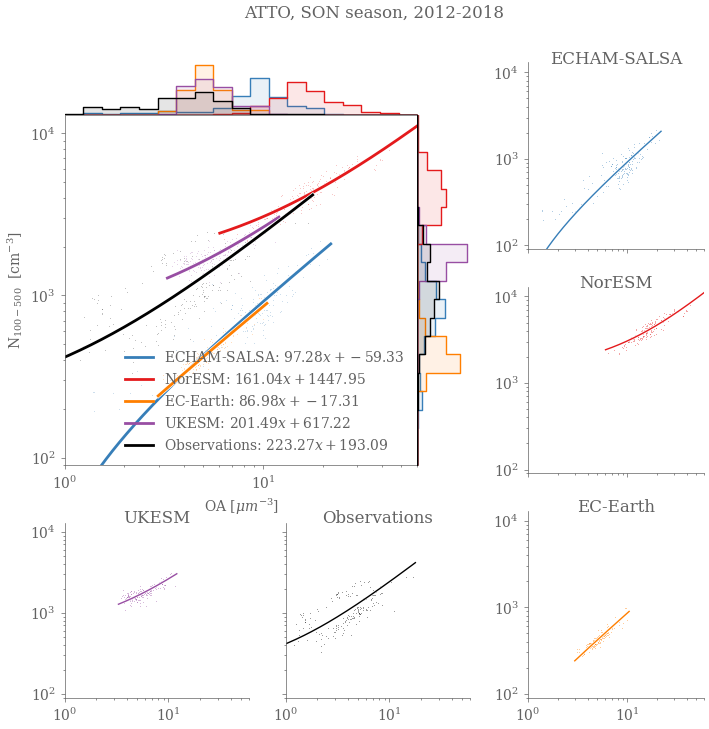

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [230]:

## Settings
alpha_scatt = 0.5

ylab = r'N$_{100-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'SON'
xlims = [1,60]

ylims = [90,13000]

# OBS: 
v_x = 'OA'
v_y = 'N100-500'


xscale='log'
yscale='log'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

## N200

#### JFM

(0.0, 30.45)
(0.0, 30.45)
(0.0, 46.2)
(0.0, 54.6)
(0.0, 63.0)
ECHAM-SALSA
293
[ 31.53007951 -25.99528672]
Beta: [ 35.97798839 -39.4573397 ]
Beta Std Error: [1.84703045 6.12640518]
Beta Covariance: [[ 27.0530203  -81.87874144]
 [-81.87874144 297.63163022]]
Residual Variance: 0.12610501258157078
Inverse Condition #: 0.10510658268016017
Reason(s) for Halting:
  Sum of squares convergence
[ 35.97798839 -39.4573397 ]
reason for haltng
NorESM
293
[  34.94791303 -140.85235872]
Beta: [  36.16963983 -153.19540958]
Beta Std Error: [ 0.9481456  10.99496713]
Beta Covariance: [[  26.09249757 -263.61137908]
 [-263.61137908 3508.75830448]]
Residual Variance: 0.034453584907591615
Inverse Condition #: 0.04086017110466698
Reason(s) for Halting:
  Sum of squares convergence
[  36.16963983 -153.19540958]
reason for haltng
EC-Earth
293
[41.47366082 -8.40664779]
Beta: [ 44.563734   -16.34014628]
Beta Std Error: [1.68912635 4.68323344]
Beta Covariance: [[  40.33831524 -103.56517114]
 [-103.56517114  310.0880

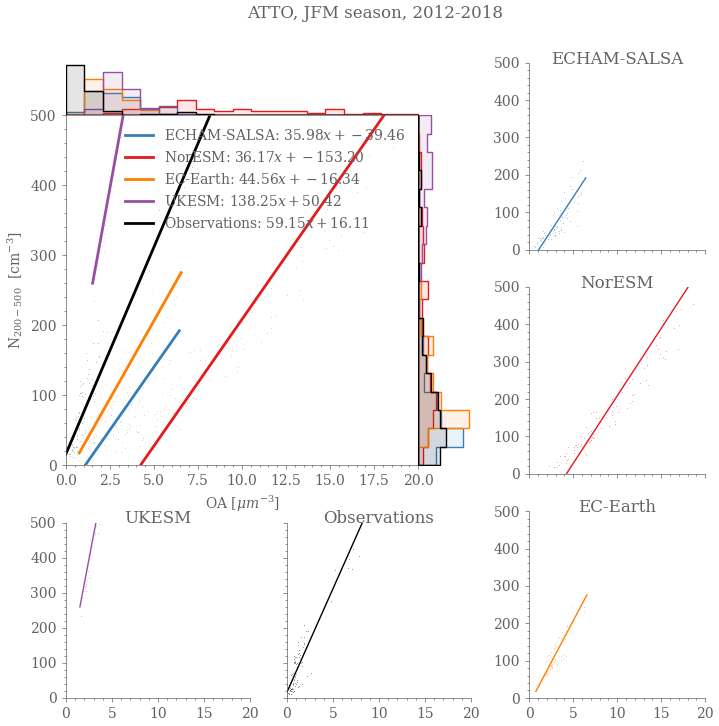

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [231]:

## Settings
alpha_scatt = 0.5

## Settings
alpha_scatt = 0.5

ylab = r'N$_{200-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'JFM'
xlims = [0,20]

ylims = [0,500]

# OBS: 
v_x = 'OA'
v_y = 'N200-500'


xscale='linear'
yscale='linear'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

#### SON

(0.0, 39.9)
(0.0, 39.9)
(0.0, 81.9)
(0.0, 81.9)
(0.0, 81.9)
ECHAM-SALSA
364
[ 25.55743185 -46.35461385]
Beta: [ 28.25685345 -71.75933737]
Beta Std Error: [0.97082968 9.83393892]
Beta Covariance: [[   9.75006948  -91.75960165]
 [ -91.75960165 1000.40679948]]
Residual Variance: 0.09666703057915968
Inverse Condition #: 0.03452431868306115
Reason(s) for Halting:
  Sum of squares convergence
[ 28.25685345 -71.75933737]
reason for haltng
NorESM
364
[  43.12627382 -210.54384714]
Beta: [  43.7066546  -220.97360942]
Beta Std Error: [ 0.54812155 10.76182615]
Beta Covariance: [[  22.36092477 -401.83800202]
 [-401.83800202 8620.01355445]]
Residual Variance: 0.01343581438751784
Inverse Condition #: 0.019979560129197008
Reason(s) for Halting:
  Sum of squares convergence
[  43.7066546  -220.97360942]
reason for haltng
EC-Earth
364
[38.2119269   0.51155356]
Beta: [39.59801468 -6.79726817]
Beta Std Error: [0.81794667 4.43758182]
Beta Covariance: [[ 18.88680587 -99.58973198]
 [-99.58973198 555.9059097 

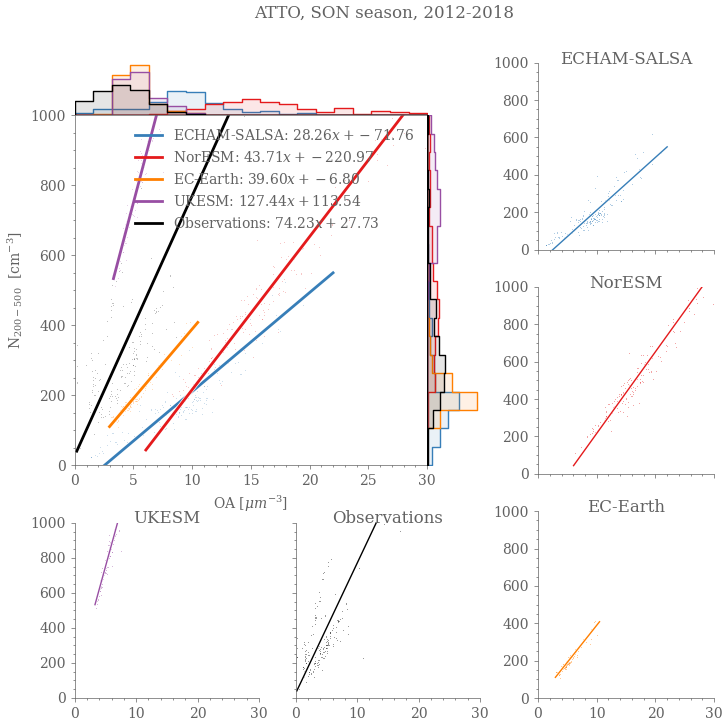

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

<Figure size 700x525 with 0 Axes>

In [232]:

## Settings
alpha_scatt = 0.5

## Settings
alpha_scatt = 0.5

ylab = r'N$_{200-500}$  [cm$^{-3}$]'
xlab = r'OA [$\mu m^{-3}$]'

season = 'SON'
xlims = [0,20]

ylims = [0,500]
xlims = [0,30]

ylims = [0,1000]
# OBS: 
v_x = 'OA'
v_y = 'N200-500'


xscale='linear'
yscale='linear'

fig, ax, daxs, axs_extra = make_cool_grid5()##ncols_extra=2, nrows_extra=2,)# w_ratio_sideplot=.5)
axs_extra = axs_extra.flatten()

## Settings
alpha_scatt = 0.6



# Make plot
make_plot(v_x, v_y, xlims, ylims, season, 
          xlab, ylab, .3, models_and_obs, fig, ax, daxs, axs_extra,
          yscale=yscale,
          xscale=xscale,
         )


for mo, ax_ex in zip(models_and_obs, axs_extra[:]):
    df_s =  dic_df_med[mo]
    print(mo)
    mask_months = select_months(df_s, season=season)
    df_s = df_s[mask_months].copy()
    print(len(df_s))
    popt, pov, label, func = get_odr_fit_and_labs(df_s,v_x,v_y, fit_func='linear', return_func=True)
    
    _mi = df_s[v_x].min()
    _ma = df_s[v_x].max() 
    _xlim = [_mi*.95, _ma*1.05]
    x = np.linspace(*_xlim,1000)
    ax.plot(x, func(x, *popt), c='w', linewidth=3,label='__nolegend__')
    ax.plot(x, func(x, *popt), linewidth=2, c=cdic_model[mo],label=f'{mo}: {label}')

    ax_ex.plot(x, func(x, *popt), c='w', linewidth=2,label=f'{mo}: {label}',
             )
    ax_ex.plot(x, func(x, *popt), c=cdic_model[mo],label=f'{mo}: {label}',
              )    
    ax_ex.set_yscale(yscale)
    ax_ex.set_xscale(xscale)


ax.set_yscale(yscale)
ax.set_xscale(xscale)


    
fn = make_fn_scat(f'lin1_{season}', v_x, v_y)
ax.legend(frameon=False)
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

## Extra stuff

In [233]:
mo= 'NorESM'
ca = case_mod
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

(df_s['SOA']/df_s['OA']).plot()

NameError: name 'case_mod' is not defined

In [ ]:
df_s['POA'] = df_s['OA']-df_s['SOA']

df_s[['POA','SOA']].resample('M').mean().plot.area(stacked=True, alpha=0.5, linewidth=0)

In [ ]:
mo= 'NorESM'
ca = case_mod
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

(df_s['SOA']/df_s['OA']).plot()

In [ ]:
mo= 'NorESM'
ca = case_mod
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

(df_s['OA']).plot()

In [ ]:
mo= 'ECHAM-SALSA'
ca = case_name_echam
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

#(df_s['SOA']/df_s['OA']).plot()

df_s['OA'].plot()
df_s['OAG'].plot(alpha=.5)

In [ ]:
df_s.columns

In [ ]:
mo= 'ECHAM-SALSA'
ca = case_name_echam
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]

#(df_s['SOA']/df_s['OA']).plot()

df_s['OA'].plot()
df_s['OAG'].plot(alpha=.5)

In [ ]:
mo= 'NorESM'
ca = case_mod
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]




seas = 'WET_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)


seas = 'WET_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot(label=seas, alpha=.4)

plt.title('SOA/total OA')
plt.legend()

In [ ]:
mo= 'NorESM'
ca = case_mod
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]




seas = 'WET_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)


seas = 'WET_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)


seas = 'DRY_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['OA']).plot(label=seas, alpha=.4)
plt.title('OA')

plt.legend()

In [ ]:
mo= 'NorESM'
ca = case_mod
df_s = dic_df_mod_case[mo][ca]#.loc[mask_obs_ind_su]




seas = 'WET_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


seas = 'WET_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


seas = 'DRY_early'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


seas = 'DRY_late'
month_ma = select_months(df_s, season=seas)
_df = df_s[month_ma]
(_df['SOA']).plot(label=seas, alpha=.4)


plt.legend()
plt.title('SOA')

In [ ]:
month_ma = select_months(df_s, season='WET_early')

_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot()

In [ ]:
month_ma = select_months(df_s, season='WET')

_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot()

In [ ]:
month_ma = select_months(df_s, season='DRY')

_df = df_s[month_ma]
(_df['SOA']/_df['OA']).plot()